## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

from TCGame_Env1 import TicTacToe

In [2]:
env = TicTacToe()

In [3]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [4]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

In [5]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [6]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time_step):
    q_state = Q_state(state)
    max_epsilon = 1.0
    min_epsilon = 0.001
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-time_step*decay_factor)
    z = np.random.random()
   
    if z > epsilon:
        action = max(Q_dict[q_state],key=Q_dict[q_state].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        listify_agent_moves = valid_actions(state)
        random_selector = random.randint(0, (len(listify_agent_moves)-1))
        action = listify_agent_moves[random_selector]    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [7]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

In [8]:
# Initialise states to be tracked
def initialise_tracking_states():
    States_track['x-x-x-x-x-x-x-x-x'][(0,1)] = [] 
    States_track['1-5-6-7-3-2-8-x-4'][(7,9)] = []
    States_track['1-8-4-3-x-x-2-9-x'][(4,5)] = []
    States_track['1-3-5-6-x-4-2-7-8'][(4,9)] = []

In [9]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [10]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [11]:
# initializing tracking state

initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [12]:
EPISODES = 500000
gamma = 0.90
LR = 0.01
decay_factor = 0.001 
threshold = 5000
policy_threshold = 5000

### Q-update loop ---write your code here

#### PSEUDO CODE
```
while not terminal:
        - add_to_dict
        - E-greedy
        env.step()
        next_state,reward,terminal_flag
        q[s][a] += LR((r +gamma*(max(q[s1]))-q[s][a])
        if terminal:
          q[s][a] += LR(r -q[s][a])  ``` 

In [13]:
start_time = time.time()
time_step = 0

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    print("EPISODE:", episode)
    state = env.reset()
    biggest_change = 0
    r = 0
    add_to_dict(state)
    while True:
        q_state = Q_state(state)
#         print("STATE: ",state)
        action = epsilon_greedy(state, time_step)
        next_state, reward, terminal_flag = env.step(state, action)
#         print("Action = {}, Next State = {}, Reward = {}".format(action, next_state, reward))
        add_to_dict(next_state)
        time_step +=1
        
        if terminal_flag:
#             print("Terminal state reached")
            curr_q = Q_dict[q_state][action]
            Q_dict[q_state][action] += LR*(reward -curr_q)
        
            # stop the episode loop
            break
        else:
            q_next_state = Q_state(next_state)
            max_next = max(Q_dict[q_next_state],key=Q_dict[q_next_state].get)
            curr_q = Q_dict[q_state][action]
            Q_dict[q_state][action] += LR*(reward + gamma*Q_dict[q_next_state][max_next] - curr_q)
            
        state = next_state
        if (episode == threshold-1):        
            initialise_tracking_states()
      
        if ((episode+1) % threshold) == 0:  
            save_tracking_states()
            
        #SAVING POLICY
        if ((episode+1)% policy_threshold ) == 0:  #every thresholdth episodes, the Q-dict will be saved
            save_obj(Q_dict,'Policy')

    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')


EPISODE: 362154
EPISODE: 362155
EPISODE: 362156
EPISODE: 362157
EPISODE: 362158
EPISODE: 362159
EPISODE: 362160
EPISODE: 362161
EPISODE: 362162
EPISODE: 362163
EPISODE: 362164
EPISODE: 362165
EPISODE: 362166
EPISODE: 362167
EPISODE: 362168
EPISODE: 362169
EPISODE: 362170
EPISODE: 362171
EPISODE: 362172
EPISODE: 362173
EPISODE: 362174
EPISODE: 362175
EPISODE: 362176
EPISODE: 362177
EPISODE: 362178
EPISODE: 362179
EPISODE: 362180
EPISODE: 362181
EPISODE: 362182
EPISODE: 362183
EPISODE: 362184
EPISODE: 362185
EPISODE: 362186
EPISODE: 362187
EPISODE: 362188
EPISODE: 362189
EPISODE: 362190
EPISODE: 362191
EPISODE: 362192
EPISODE: 362193
EPISODE: 362194
EPISODE: 362195
EPISODE: 362196
EPISODE: 362197
EPISODE: 362198
EPISODE: 362199
EPISODE: 362200
EPISODE: 362201
EPISODE: 362202
EPISODE: 362203
EPISODE: 362204
EPISODE: 362205
EPISODE: 362206
EPISODE: 362207
EPISODE: 362208
EPISODE: 362209
EPISODE: 362210
EPISODE: 362211
EPISODE: 362212
EPISODE: 362213
EPISODE: 362214
EPISODE: 362215
EPISODE

EPISODE: 362673
EPISODE: 362674
EPISODE: 362675
EPISODE: 362676
EPISODE: 362677
EPISODE: 362678
EPISODE: 362679
EPISODE: 362680
EPISODE: 362681
EPISODE: 362682
EPISODE: 362683
EPISODE: 362684
EPISODE: 362685
EPISODE: 362686
EPISODE: 362687
EPISODE: 362688
EPISODE: 362689
EPISODE: 362690
EPISODE: 362691
EPISODE: 362692
EPISODE: 362693
EPISODE: 362694
EPISODE: 362695
EPISODE: 362696
EPISODE: 362697
EPISODE: 362698
EPISODE: 362699
EPISODE: 362700
EPISODE: 362701
EPISODE: 362702
EPISODE: 362703
EPISODE: 362704
EPISODE: 362705
EPISODE: 362706
EPISODE: 362707
EPISODE: 362708
EPISODE: 362709
EPISODE: 362710
EPISODE: 362711
EPISODE: 362712
EPISODE: 362713
EPISODE: 362714
EPISODE: 362715
EPISODE: 362716
EPISODE: 362717
EPISODE: 362718
EPISODE: 362719
EPISODE: 362720
EPISODE: 362721
EPISODE: 362722
EPISODE: 362723
EPISODE: 362724
EPISODE: 362725
EPISODE: 362726
EPISODE: 362727
EPISODE: 362728
EPISODE: 362729
EPISODE: 362730
EPISODE: 362731
EPISODE: 362732
EPISODE: 362733
EPISODE: 362734
EPISODE:

EPISODE: 363402
EPISODE: 363403
EPISODE: 363404
EPISODE: 363405
EPISODE: 363406
EPISODE: 363407
EPISODE: 363408
EPISODE: 363409
EPISODE: 363410
EPISODE: 363411
EPISODE: 363412
EPISODE: 363413
EPISODE: 363414
EPISODE: 363415
EPISODE: 363416
EPISODE: 363417
EPISODE: 363418
EPISODE: 363419
EPISODE: 363420
EPISODE: 363421
EPISODE: 363422
EPISODE: 363423
EPISODE: 363424
EPISODE: 363425
EPISODE: 363426
EPISODE: 363427
EPISODE: 363428
EPISODE: 363429
EPISODE: 363430
EPISODE: 363431
EPISODE: 363432
EPISODE: 363433
EPISODE: 363434
EPISODE: 363435
EPISODE: 363436
EPISODE: 363437
EPISODE: 363438
EPISODE: 363439
EPISODE: 363440
EPISODE: 363441
EPISODE: 363442
EPISODE: 363443
EPISODE: 363444
EPISODE: 363445
EPISODE: 363446
EPISODE: 363447
EPISODE: 363448
EPISODE: 363449
EPISODE: 363450
EPISODE: 363451
EPISODE: 363452
EPISODE: 363453
EPISODE: 363454
EPISODE: 363455
EPISODE: 363456
EPISODE: 363457
EPISODE: 363458
EPISODE: 363459
EPISODE: 363460
EPISODE: 363461
EPISODE: 363462
EPISODE: 363463
EPISODE:

EPISODE: 364151
EPISODE: 364152
EPISODE: 364153
EPISODE: 364154
EPISODE: 364155
EPISODE: 364156
EPISODE: 364157
EPISODE: 364158
EPISODE: 364159
EPISODE: 364160
EPISODE: 364161
EPISODE: 364162
EPISODE: 364163
EPISODE: 364164
EPISODE: 364165
EPISODE: 364166
EPISODE: 364167
EPISODE: 364168
EPISODE: 364169
EPISODE: 364170
EPISODE: 364171
EPISODE: 364172
EPISODE: 364173
EPISODE: 364174
EPISODE: 364175
EPISODE: 364176
EPISODE: 364177
EPISODE: 364178
EPISODE: 364179
EPISODE: 364180
EPISODE: 364181
EPISODE: 364182
EPISODE: 364183
EPISODE: 364184
EPISODE: 364185
EPISODE: 364186
EPISODE: 364187
EPISODE: 364188
EPISODE: 364189
EPISODE: 364190
EPISODE: 364191
EPISODE: 364192
EPISODE: 364193
EPISODE: 364194
EPISODE: 364195
EPISODE: 364196
EPISODE: 364197
EPISODE: 364198
EPISODE: 364199
EPISODE: 364200
EPISODE: 364201
EPISODE: 364202
EPISODE: 364203
EPISODE: 364204
EPISODE: 364205
EPISODE: 364206
EPISODE: 364207
EPISODE: 364208
EPISODE: 364209
EPISODE: 364210
EPISODE: 364211
EPISODE: 364212
EPISODE:

EPISODE: 364871
EPISODE: 364872
EPISODE: 364873
EPISODE: 364874
EPISODE: 364875
EPISODE: 364876
EPISODE: 364877
EPISODE: 364878
EPISODE: 364879
EPISODE: 364880
EPISODE: 364881
EPISODE: 364882
EPISODE: 364883
EPISODE: 364884
EPISODE: 364885
EPISODE: 364886
EPISODE: 364887
EPISODE: 364888
EPISODE: 364889
EPISODE: 364890
EPISODE: 364891
EPISODE: 364892
EPISODE: 364893
EPISODE: 364894
EPISODE: 364895
EPISODE: 364896
EPISODE: 364897
EPISODE: 364898
EPISODE: 364899
EPISODE: 364900
EPISODE: 364901
EPISODE: 364902
EPISODE: 364903
EPISODE: 364904
EPISODE: 364905
EPISODE: 364906
EPISODE: 364907
EPISODE: 364908
EPISODE: 364909
EPISODE: 364910
EPISODE: 364911
EPISODE: 364912
EPISODE: 364913
EPISODE: 364914
EPISODE: 364915
EPISODE: 364916
EPISODE: 364917
EPISODE: 364918
EPISODE: 364919
EPISODE: 364920
EPISODE: 364921
EPISODE: 364922
EPISODE: 364923
EPISODE: 364924
EPISODE: 364925
EPISODE: 364926
EPISODE: 364927
EPISODE: 364928
EPISODE: 364929
EPISODE: 364930
EPISODE: 364931
EPISODE: 364932
EPISODE:

EPISODE: 365510
EPISODE: 365511
EPISODE: 365512
EPISODE: 365513
EPISODE: 365514
EPISODE: 365515
EPISODE: 365516
EPISODE: 365517
EPISODE: 365518
EPISODE: 365519
EPISODE: 365520
EPISODE: 365521
EPISODE: 365522
EPISODE: 365523
EPISODE: 365524
EPISODE: 365525
EPISODE: 365526
EPISODE: 365527
EPISODE: 365528
EPISODE: 365529
EPISODE: 365530
EPISODE: 365531
EPISODE: 365532
EPISODE: 365533
EPISODE: 365534
EPISODE: 365535
EPISODE: 365536
EPISODE: 365537
EPISODE: 365538
EPISODE: 365539
EPISODE: 365540
EPISODE: 365541
EPISODE: 365542
EPISODE: 365543
EPISODE: 365544
EPISODE: 365545
EPISODE: 365546
EPISODE: 365547
EPISODE: 365548
EPISODE: 365549
EPISODE: 365550
EPISODE: 365551
EPISODE: 365552
EPISODE: 365553
EPISODE: 365554
EPISODE: 365555
EPISODE: 365556
EPISODE: 365557
EPISODE: 365558
EPISODE: 365559
EPISODE: 365560
EPISODE: 365561
EPISODE: 365562
EPISODE: 365563
EPISODE: 365564
EPISODE: 365565
EPISODE: 365566
EPISODE: 365567
EPISODE: 365568
EPISODE: 365569
EPISODE: 365570
EPISODE: 365571
EPISODE:

EPISODE: 366149
EPISODE: 366150
EPISODE: 366151
EPISODE: 366152
EPISODE: 366153
EPISODE: 366154
EPISODE: 366155
EPISODE: 366156
EPISODE: 366157
EPISODE: 366158
EPISODE: 366159
EPISODE: 366160
EPISODE: 366161
EPISODE: 366162
EPISODE: 366163
EPISODE: 366164
EPISODE: 366165
EPISODE: 366166
EPISODE: 366167
EPISODE: 366168
EPISODE: 366169
EPISODE: 366170
EPISODE: 366171
EPISODE: 366172
EPISODE: 366173
EPISODE: 366174
EPISODE: 366175
EPISODE: 366176
EPISODE: 366177
EPISODE: 366178
EPISODE: 366179
EPISODE: 366180
EPISODE: 366181
EPISODE: 366182
EPISODE: 366183
EPISODE: 366184
EPISODE: 366185
EPISODE: 366186
EPISODE: 366187
EPISODE: 366188
EPISODE: 366189
EPISODE: 366190
EPISODE: 366191
EPISODE: 366192
EPISODE: 366193
EPISODE: 366194
EPISODE: 366195
EPISODE: 366196
EPISODE: 366197
EPISODE: 366198
EPISODE: 366199
EPISODE: 366200
EPISODE: 366201
EPISODE: 366202
EPISODE: 366203
EPISODE: 366204
EPISODE: 366205
EPISODE: 366206
EPISODE: 366207
EPISODE: 366208
EPISODE: 366209
EPISODE: 366210
EPISODE:

EPISODE: 366899
EPISODE: 366900
EPISODE: 366901
EPISODE: 366902
EPISODE: 366903
EPISODE: 366904
EPISODE: 366905
EPISODE: 366906
EPISODE: 366907
EPISODE: 366908
EPISODE: 366909
EPISODE: 366910
EPISODE: 366911
EPISODE: 366912
EPISODE: 366913
EPISODE: 366914
EPISODE: 366915
EPISODE: 366916
EPISODE: 366917
EPISODE: 366918
EPISODE: 366919
EPISODE: 366920
EPISODE: 366921
EPISODE: 366922
EPISODE: 366923
EPISODE: 366924
EPISODE: 366925
EPISODE: 366926
EPISODE: 366927
EPISODE: 366928
EPISODE: 366929
EPISODE: 366930
EPISODE: 366931
EPISODE: 366932
EPISODE: 366933
EPISODE: 366934
EPISODE: 366935
EPISODE: 366936
EPISODE: 366937
EPISODE: 366938
EPISODE: 366939
EPISODE: 366940
EPISODE: 366941
EPISODE: 366942
EPISODE: 366943
EPISODE: 366944
EPISODE: 366945
EPISODE: 366946
EPISODE: 366947
EPISODE: 366948
EPISODE: 366949
EPISODE: 366950
EPISODE: 366951
EPISODE: 366952
EPISODE: 366953
EPISODE: 366954
EPISODE: 366955
EPISODE: 366956
EPISODE: 366957
EPISODE: 366958
EPISODE: 366959
EPISODE: 366960
EPISODE:

EPISODE: 367510
EPISODE: 367511
EPISODE: 367512
EPISODE: 367513
EPISODE: 367514
EPISODE: 367515
EPISODE: 367516
EPISODE: 367517
EPISODE: 367518
EPISODE: 367519
EPISODE: 367520
EPISODE: 367521
EPISODE: 367522
EPISODE: 367523
EPISODE: 367524
EPISODE: 367525
EPISODE: 367526
EPISODE: 367527
EPISODE: 367528
EPISODE: 367529
EPISODE: 367530
EPISODE: 367531
EPISODE: 367532
EPISODE: 367533
EPISODE: 367534
EPISODE: 367535
EPISODE: 367536
EPISODE: 367537
EPISODE: 367538
EPISODE: 367539
EPISODE: 367540
EPISODE: 367541
EPISODE: 367542
EPISODE: 367543
EPISODE: 367544
EPISODE: 367545
EPISODE: 367546
EPISODE: 367547
EPISODE: 367548
EPISODE: 367549
EPISODE: 367550
EPISODE: 367551
EPISODE: 367552
EPISODE: 367553
EPISODE: 367554
EPISODE: 367555
EPISODE: 367556
EPISODE: 367557
EPISODE: 367558
EPISODE: 367559
EPISODE: 367560
EPISODE: 367561
EPISODE: 367562
EPISODE: 367563
EPISODE: 367564
EPISODE: 367565
EPISODE: 367566
EPISODE: 367567
EPISODE: 367568
EPISODE: 367569
EPISODE: 367570
EPISODE: 367571
EPISODE:

EPISODE: 368406
EPISODE: 368407
EPISODE: 368408
EPISODE: 368409
EPISODE: 368410
EPISODE: 368411
EPISODE: 368412
EPISODE: 368413
EPISODE: 368414
EPISODE: 368415
EPISODE: 368416
EPISODE: 368417
EPISODE: 368418
EPISODE: 368419
EPISODE: 368420
EPISODE: 368421
EPISODE: 368422
EPISODE: 368423
EPISODE: 368424
EPISODE: 368425
EPISODE: 368426
EPISODE: 368427
EPISODE: 368428
EPISODE: 368429
EPISODE: 368430
EPISODE: 368431
EPISODE: 368432
EPISODE: 368433
EPISODE: 368434
EPISODE: 368435
EPISODE: 368436
EPISODE: 368437
EPISODE: 368438
EPISODE: 368439
EPISODE: 368440
EPISODE: 368441
EPISODE: 368442
EPISODE: 368443
EPISODE: 368444
EPISODE: 368445
EPISODE: 368446
EPISODE: 368447
EPISODE: 368448
EPISODE: 368449
EPISODE: 368450
EPISODE: 368451
EPISODE: 368452
EPISODE: 368453
EPISODE: 368454
EPISODE: 368455
EPISODE: 368456
EPISODE: 368457
EPISODE: 368458
EPISODE: 368459
EPISODE: 368460
EPISODE: 368461
EPISODE: 368462
EPISODE: 368463
EPISODE: 368464
EPISODE: 368465
EPISODE: 368466
EPISODE: 368467
EPISODE:

EPISODE: 369305
EPISODE: 369306
EPISODE: 369307
EPISODE: 369308
EPISODE: 369309
EPISODE: 369310
EPISODE: 369311
EPISODE: 369312
EPISODE: 369313
EPISODE: 369314
EPISODE: 369315
EPISODE: 369316
EPISODE: 369317
EPISODE: 369318
EPISODE: 369319
EPISODE: 369320
EPISODE: 369321
EPISODE: 369322
EPISODE: 369323
EPISODE: 369324
EPISODE: 369325
EPISODE: 369326
EPISODE: 369327
EPISODE: 369328
EPISODE: 369329
EPISODE: 369330
EPISODE: 369331
EPISODE: 369332
EPISODE: 369333
EPISODE: 369334
EPISODE: 369335
EPISODE: 369336
EPISODE: 369337
EPISODE: 369338
EPISODE: 369339
EPISODE: 369340
EPISODE: 369341
EPISODE: 369342
EPISODE: 369343
EPISODE: 369344
EPISODE: 369345
EPISODE: 369346
EPISODE: 369347
EPISODE: 369348
EPISODE: 369349
EPISODE: 369350
EPISODE: 369351
EPISODE: 369352
EPISODE: 369353
EPISODE: 369354
EPISODE: 369355
EPISODE: 369356
EPISODE: 369357
EPISODE: 369358
EPISODE: 369359
EPISODE: 369360
EPISODE: 369361
EPISODE: 369362
EPISODE: 369363
EPISODE: 369364
EPISODE: 369365
EPISODE: 369366
EPISODE:

EPISODE: 369897
EPISODE: 369898
EPISODE: 369899
EPISODE: 369900
EPISODE: 369901
EPISODE: 369902
EPISODE: 369903
EPISODE: 369904
EPISODE: 369905
EPISODE: 369906
EPISODE: 369907
EPISODE: 369908
EPISODE: 369909
EPISODE: 369910
EPISODE: 369911
EPISODE: 369912
EPISODE: 369913
EPISODE: 369914
EPISODE: 369915
EPISODE: 369916
EPISODE: 369917
EPISODE: 369918
EPISODE: 369919
EPISODE: 369920
EPISODE: 369921
EPISODE: 369922
EPISODE: 369923
EPISODE: 369924
EPISODE: 369925
EPISODE: 369926
EPISODE: 369927
EPISODE: 369928
EPISODE: 369929
EPISODE: 369930
EPISODE: 369931
EPISODE: 369932
EPISODE: 369933
EPISODE: 369934
EPISODE: 369935
EPISODE: 369936
EPISODE: 369937
EPISODE: 369938
EPISODE: 369939
EPISODE: 369940
EPISODE: 369941
EPISODE: 369942
EPISODE: 369943
EPISODE: 369944
EPISODE: 369945
EPISODE: 369946
EPISODE: 369947
EPISODE: 369948
EPISODE: 369949
EPISODE: 369950
EPISODE: 369951
EPISODE: 369952
EPISODE: 369953
EPISODE: 369954
EPISODE: 369955
EPISODE: 369956
EPISODE: 369957
EPISODE: 369958
EPISODE:

EPISODE: 370590
EPISODE: 370591
EPISODE: 370592
EPISODE: 370593
EPISODE: 370594
EPISODE: 370595
EPISODE: 370596
EPISODE: 370597
EPISODE: 370598
EPISODE: 370599
EPISODE: 370600
EPISODE: 370601
EPISODE: 370602
EPISODE: 370603
EPISODE: 370604
EPISODE: 370605
EPISODE: 370606
EPISODE: 370607
EPISODE: 370608
EPISODE: 370609
EPISODE: 370610
EPISODE: 370611
EPISODE: 370612
EPISODE: 370613
EPISODE: 370614
EPISODE: 370615
EPISODE: 370616
EPISODE: 370617
EPISODE: 370618
EPISODE: 370619
EPISODE: 370620
EPISODE: 370621
EPISODE: 370622
EPISODE: 370623
EPISODE: 370624
EPISODE: 370625
EPISODE: 370626
EPISODE: 370627
EPISODE: 370628
EPISODE: 370629
EPISODE: 370630
EPISODE: 370631
EPISODE: 370632
EPISODE: 370633
EPISODE: 370634
EPISODE: 370635
EPISODE: 370636
EPISODE: 370637
EPISODE: 370638
EPISODE: 370639
EPISODE: 370640
EPISODE: 370641
EPISODE: 370642
EPISODE: 370643
EPISODE: 370644
EPISODE: 370645
EPISODE: 370646
EPISODE: 370647
EPISODE: 370648
EPISODE: 370649
EPISODE: 370650
EPISODE: 370651
EPISODE:

EPISODE: 371396
EPISODE: 371397
EPISODE: 371398
EPISODE: 371399
EPISODE: 371400
EPISODE: 371401
EPISODE: 371402
EPISODE: 371403
EPISODE: 371404
EPISODE: 371405
EPISODE: 371406
EPISODE: 371407
EPISODE: 371408
EPISODE: 371409
EPISODE: 371410
EPISODE: 371411
EPISODE: 371412
EPISODE: 371413
EPISODE: 371414
EPISODE: 371415
EPISODE: 371416
EPISODE: 371417
EPISODE: 371418
EPISODE: 371419
EPISODE: 371420
EPISODE: 371421
EPISODE: 371422
EPISODE: 371423
EPISODE: 371424
EPISODE: 371425
EPISODE: 371426
EPISODE: 371427
EPISODE: 371428
EPISODE: 371429
EPISODE: 371430
EPISODE: 371431
EPISODE: 371432
EPISODE: 371433
EPISODE: 371434
EPISODE: 371435
EPISODE: 371436
EPISODE: 371437
EPISODE: 371438
EPISODE: 371439
EPISODE: 371440
EPISODE: 371441
EPISODE: 371442
EPISODE: 371443
EPISODE: 371444
EPISODE: 371445
EPISODE: 371446
EPISODE: 371447
EPISODE: 371448
EPISODE: 371449
EPISODE: 371450
EPISODE: 371451
EPISODE: 371452
EPISODE: 371453
EPISODE: 371454
EPISODE: 371455
EPISODE: 371456
EPISODE: 371457
EPISODE:

EPISODE: 372395
EPISODE: 372396
EPISODE: 372397
EPISODE: 372398
EPISODE: 372399
EPISODE: 372400
EPISODE: 372401
EPISODE: 372402
EPISODE: 372403
EPISODE: 372404
EPISODE: 372405
EPISODE: 372406
EPISODE: 372407
EPISODE: 372408
EPISODE: 372409
EPISODE: 372410
EPISODE: 372411
EPISODE: 372412
EPISODE: 372413
EPISODE: 372414
EPISODE: 372415
EPISODE: 372416
EPISODE: 372417
EPISODE: 372418
EPISODE: 372419
EPISODE: 372420
EPISODE: 372421
EPISODE: 372422
EPISODE: 372423
EPISODE: 372424
EPISODE: 372425
EPISODE: 372426
EPISODE: 372427
EPISODE: 372428
EPISODE: 372429
EPISODE: 372430
EPISODE: 372431
EPISODE: 372432
EPISODE: 372433
EPISODE: 372434
EPISODE: 372435
EPISODE: 372436
EPISODE: 372437
EPISODE: 372438
EPISODE: 372439
EPISODE: 372440
EPISODE: 372441
EPISODE: 372442
EPISODE: 372443
EPISODE: 372444
EPISODE: 372445
EPISODE: 372446
EPISODE: 372447
EPISODE: 372448
EPISODE: 372449
EPISODE: 372450
EPISODE: 372451
EPISODE: 372452
EPISODE: 372453
EPISODE: 372454
EPISODE: 372455
EPISODE: 372456
EPISODE:

EPISODE: 373134
EPISODE: 373135
EPISODE: 373136
EPISODE: 373137
EPISODE: 373138
EPISODE: 373139
EPISODE: 373140
EPISODE: 373141
EPISODE: 373142
EPISODE: 373143
EPISODE: 373144
EPISODE: 373145
EPISODE: 373146
EPISODE: 373147
EPISODE: 373148
EPISODE: 373149
EPISODE: 373150
EPISODE: 373151
EPISODE: 373152
EPISODE: 373153
EPISODE: 373154
EPISODE: 373155
EPISODE: 373156
EPISODE: 373157
EPISODE: 373158
EPISODE: 373159
EPISODE: 373160
EPISODE: 373161
EPISODE: 373162
EPISODE: 373163
EPISODE: 373164
EPISODE: 373165
EPISODE: 373166
EPISODE: 373167
EPISODE: 373168
EPISODE: 373169
EPISODE: 373170
EPISODE: 373171
EPISODE: 373172
EPISODE: 373173
EPISODE: 373174
EPISODE: 373175
EPISODE: 373176
EPISODE: 373177
EPISODE: 373178
EPISODE: 373179
EPISODE: 373180
EPISODE: 373181
EPISODE: 373182
EPISODE: 373183
EPISODE: 373184
EPISODE: 373185
EPISODE: 373186
EPISODE: 373187
EPISODE: 373188
EPISODE: 373189
EPISODE: 373190
EPISODE: 373191
EPISODE: 373192
EPISODE: 373193
EPISODE: 373194
EPISODE: 373195
EPISODE:

EPISODE: 373894
EPISODE: 373895
EPISODE: 373896
EPISODE: 373897
EPISODE: 373898
EPISODE: 373899
EPISODE: 373900
EPISODE: 373901
EPISODE: 373902
EPISODE: 373903
EPISODE: 373904
EPISODE: 373905
EPISODE: 373906
EPISODE: 373907
EPISODE: 373908
EPISODE: 373909
EPISODE: 373910
EPISODE: 373911
EPISODE: 373912
EPISODE: 373913
EPISODE: 373914
EPISODE: 373915
EPISODE: 373916
EPISODE: 373917
EPISODE: 373918
EPISODE: 373919
EPISODE: 373920
EPISODE: 373921
EPISODE: 373922
EPISODE: 373923
EPISODE: 373924
EPISODE: 373925
EPISODE: 373926
EPISODE: 373927
EPISODE: 373928
EPISODE: 373929
EPISODE: 373930
EPISODE: 373931
EPISODE: 373932
EPISODE: 373933
EPISODE: 373934
EPISODE: 373935
EPISODE: 373936
EPISODE: 373937
EPISODE: 373938
EPISODE: 373939
EPISODE: 373940
EPISODE: 373941
EPISODE: 373942
EPISODE: 373943
EPISODE: 373944
EPISODE: 373945
EPISODE: 373946
EPISODE: 373947
EPISODE: 373948
EPISODE: 373949
EPISODE: 373950
EPISODE: 373951
EPISODE: 373952
EPISODE: 373953
EPISODE: 373954
EPISODE: 373955
EPISODE:

EPISODE: 374643
EPISODE: 374644
EPISODE: 374645
EPISODE: 374646
EPISODE: 374647
EPISODE: 374648
EPISODE: 374649
EPISODE: 374650
EPISODE: 374651
EPISODE: 374652
EPISODE: 374653
EPISODE: 374654
EPISODE: 374655
EPISODE: 374656
EPISODE: 374657
EPISODE: 374658
EPISODE: 374659
EPISODE: 374660
EPISODE: 374661
EPISODE: 374662
EPISODE: 374663
EPISODE: 374664
EPISODE: 374665
EPISODE: 374666
EPISODE: 374667
EPISODE: 374668
EPISODE: 374669
EPISODE: 374670
EPISODE: 374671
EPISODE: 374672
EPISODE: 374673
EPISODE: 374674
EPISODE: 374675
EPISODE: 374676
EPISODE: 374677
EPISODE: 374678
EPISODE: 374679
EPISODE: 374680
EPISODE: 374681
EPISODE: 374682
EPISODE: 374683
EPISODE: 374684
EPISODE: 374685
EPISODE: 374686
EPISODE: 374687
EPISODE: 374688
EPISODE: 374689
EPISODE: 374690
EPISODE: 374691
EPISODE: 374692
EPISODE: 374693
EPISODE: 374694
EPISODE: 374695
EPISODE: 374696
EPISODE: 374697
EPISODE: 374698
EPISODE: 374699
EPISODE: 374700
EPISODE: 374701
EPISODE: 374702
EPISODE: 374703
EPISODE: 374704
EPISODE:

EPISODE: 375393
EPISODE: 375394
EPISODE: 375395
EPISODE: 375396
EPISODE: 375397
EPISODE: 375398
EPISODE: 375399
EPISODE: 375400
EPISODE: 375401
EPISODE: 375402
EPISODE: 375403
EPISODE: 375404
EPISODE: 375405
EPISODE: 375406
EPISODE: 375407
EPISODE: 375408
EPISODE: 375409
EPISODE: 375410
EPISODE: 375411
EPISODE: 375412
EPISODE: 375413
EPISODE: 375414
EPISODE: 375415
EPISODE: 375416
EPISODE: 375417
EPISODE: 375418
EPISODE: 375419
EPISODE: 375420
EPISODE: 375421
EPISODE: 375422
EPISODE: 375423
EPISODE: 375424
EPISODE: 375425
EPISODE: 375426
EPISODE: 375427
EPISODE: 375428
EPISODE: 375429
EPISODE: 375430
EPISODE: 375431
EPISODE: 375432
EPISODE: 375433
EPISODE: 375434
EPISODE: 375435
EPISODE: 375436
EPISODE: 375437
EPISODE: 375438
EPISODE: 375439
EPISODE: 375440
EPISODE: 375441
EPISODE: 375442
EPISODE: 375443
EPISODE: 375444
EPISODE: 375445
EPISODE: 375446
EPISODE: 375447
EPISODE: 375448
EPISODE: 375449
EPISODE: 375450
EPISODE: 375451
EPISODE: 375452
EPISODE: 375453
EPISODE: 375454
EPISODE:

EPISODE: 376302
EPISODE: 376303
EPISODE: 376304
EPISODE: 376305
EPISODE: 376306
EPISODE: 376307
EPISODE: 376308
EPISODE: 376309
EPISODE: 376310
EPISODE: 376311
EPISODE: 376312
EPISODE: 376313
EPISODE: 376314
EPISODE: 376315
EPISODE: 376316
EPISODE: 376317
EPISODE: 376318
EPISODE: 376319
EPISODE: 376320
EPISODE: 376321
EPISODE: 376322
EPISODE: 376323
EPISODE: 376324
EPISODE: 376325
EPISODE: 376326
EPISODE: 376327
EPISODE: 376328
EPISODE: 376329
EPISODE: 376330
EPISODE: 376331
EPISODE: 376332
EPISODE: 376333
EPISODE: 376334
EPISODE: 376335
EPISODE: 376336
EPISODE: 376337
EPISODE: 376338
EPISODE: 376339
EPISODE: 376340
EPISODE: 376341
EPISODE: 376342
EPISODE: 376343
EPISODE: 376344
EPISODE: 376345
EPISODE: 376346
EPISODE: 376347
EPISODE: 376348
EPISODE: 376349
EPISODE: 376350
EPISODE: 376351
EPISODE: 376352
EPISODE: 376353
EPISODE: 376354
EPISODE: 376355
EPISODE: 376356
EPISODE: 376357
EPISODE: 376358
EPISODE: 376359
EPISODE: 376360
EPISODE: 376361
EPISODE: 376362
EPISODE: 376363
EPISODE:

EPISODE: 376891
EPISODE: 376892
EPISODE: 376893
EPISODE: 376894
EPISODE: 376895
EPISODE: 376896
EPISODE: 376897
EPISODE: 376898
EPISODE: 376899
EPISODE: 376900
EPISODE: 376901
EPISODE: 376902
EPISODE: 376903
EPISODE: 376904
EPISODE: 376905
EPISODE: 376906
EPISODE: 376907
EPISODE: 376908
EPISODE: 376909
EPISODE: 376910
EPISODE: 376911
EPISODE: 376912
EPISODE: 376913
EPISODE: 376914
EPISODE: 376915
EPISODE: 376916
EPISODE: 376917
EPISODE: 376918
EPISODE: 376919
EPISODE: 376920
EPISODE: 376921
EPISODE: 376922
EPISODE: 376923
EPISODE: 376924
EPISODE: 376925
EPISODE: 376926
EPISODE: 376927
EPISODE: 376928
EPISODE: 376929
EPISODE: 376930
EPISODE: 376931
EPISODE: 376932
EPISODE: 376933
EPISODE: 376934
EPISODE: 376935
EPISODE: 376936
EPISODE: 376937
EPISODE: 376938
EPISODE: 376939
EPISODE: 376940
EPISODE: 376941
EPISODE: 376942
EPISODE: 376943
EPISODE: 376944
EPISODE: 376945
EPISODE: 376946
EPISODE: 376947
EPISODE: 376948
EPISODE: 376949
EPISODE: 376950
EPISODE: 376951
EPISODE: 376952
EPISODE:

EPISODE: 377891
EPISODE: 377892
EPISODE: 377893
EPISODE: 377894
EPISODE: 377895
EPISODE: 377896
EPISODE: 377897
EPISODE: 377898
EPISODE: 377899
EPISODE: 377900
EPISODE: 377901
EPISODE: 377902
EPISODE: 377903
EPISODE: 377904
EPISODE: 377905
EPISODE: 377906
EPISODE: 377907
EPISODE: 377908
EPISODE: 377909
EPISODE: 377910
EPISODE: 377911
EPISODE: 377912
EPISODE: 377913
EPISODE: 377914
EPISODE: 377915
EPISODE: 377916
EPISODE: 377917
EPISODE: 377918
EPISODE: 377919
EPISODE: 377920
EPISODE: 377921
EPISODE: 377922
EPISODE: 377923
EPISODE: 377924
EPISODE: 377925
EPISODE: 377926
EPISODE: 377927
EPISODE: 377928
EPISODE: 377929
EPISODE: 377930
EPISODE: 377931
EPISODE: 377932
EPISODE: 377933
EPISODE: 377934
EPISODE: 377935
EPISODE: 377936
EPISODE: 377937
EPISODE: 377938
EPISODE: 377939
EPISODE: 377940
EPISODE: 377941
EPISODE: 377942
EPISODE: 377943
EPISODE: 377944
EPISODE: 377945
EPISODE: 377946
EPISODE: 377947
EPISODE: 377948
EPISODE: 377949
EPISODE: 377950
EPISODE: 377951
EPISODE: 377952
EPISODE:

EPISODE: 378580
EPISODE: 378581
EPISODE: 378582
EPISODE: 378583
EPISODE: 378584
EPISODE: 378585
EPISODE: 378586
EPISODE: 378587
EPISODE: 378588
EPISODE: 378589
EPISODE: 378590
EPISODE: 378591
EPISODE: 378592
EPISODE: 378593
EPISODE: 378594
EPISODE: 378595
EPISODE: 378596
EPISODE: 378597
EPISODE: 378598
EPISODE: 378599
EPISODE: 378600
EPISODE: 378601
EPISODE: 378602
EPISODE: 378603
EPISODE: 378604
EPISODE: 378605
EPISODE: 378606
EPISODE: 378607
EPISODE: 378608
EPISODE: 378609
EPISODE: 378610
EPISODE: 378611
EPISODE: 378612
EPISODE: 378613
EPISODE: 378614
EPISODE: 378615
EPISODE: 378616
EPISODE: 378617
EPISODE: 378618
EPISODE: 378619
EPISODE: 378620
EPISODE: 378621
EPISODE: 378622
EPISODE: 378623
EPISODE: 378624
EPISODE: 378625
EPISODE: 378626
EPISODE: 378627
EPISODE: 378628
EPISODE: 378629
EPISODE: 378630
EPISODE: 378631
EPISODE: 378632
EPISODE: 378633
EPISODE: 378634
EPISODE: 378635
EPISODE: 378636
EPISODE: 378637
EPISODE: 378638
EPISODE: 378639
EPISODE: 378640
EPISODE: 378641
EPISODE:

EPISODE: 379140
EPISODE: 379141
EPISODE: 379142
EPISODE: 379143
EPISODE: 379144
EPISODE: 379145
EPISODE: 379146
EPISODE: 379147
EPISODE: 379148
EPISODE: 379149
EPISODE: 379150
EPISODE: 379151
EPISODE: 379152
EPISODE: 379153
EPISODE: 379154
EPISODE: 379155
EPISODE: 379156
EPISODE: 379157
EPISODE: 379158
EPISODE: 379159
EPISODE: 379160
EPISODE: 379161
EPISODE: 379162
EPISODE: 379163
EPISODE: 379164
EPISODE: 379165
EPISODE: 379166
EPISODE: 379167
EPISODE: 379168
EPISODE: 379169
EPISODE: 379170
EPISODE: 379171
EPISODE: 379172
EPISODE: 379173
EPISODE: 379174
EPISODE: 379175
EPISODE: 379176
EPISODE: 379177
EPISODE: 379178
EPISODE: 379179
EPISODE: 379180
EPISODE: 379181
EPISODE: 379182
EPISODE: 379183
EPISODE: 379184
EPISODE: 379185
EPISODE: 379186
EPISODE: 379187
EPISODE: 379188
EPISODE: 379189
EPISODE: 379190
EPISODE: 379191
EPISODE: 379192
EPISODE: 379193
EPISODE: 379194
EPISODE: 379195
EPISODE: 379196
EPISODE: 379197
EPISODE: 379198
EPISODE: 379199
EPISODE: 379200
EPISODE: 379201
EPISODE:

EPISODE: 379889
EPISODE: 379890
EPISODE: 379891
EPISODE: 379892
EPISODE: 379893
EPISODE: 379894
EPISODE: 379895
EPISODE: 379896
EPISODE: 379897
EPISODE: 379898
EPISODE: 379899
EPISODE: 379900
EPISODE: 379901
EPISODE: 379902
EPISODE: 379903
EPISODE: 379904
EPISODE: 379905
EPISODE: 379906
EPISODE: 379907
EPISODE: 379908
EPISODE: 379909
EPISODE: 379910
EPISODE: 379911
EPISODE: 379912
EPISODE: 379913
EPISODE: 379914
EPISODE: 379915
EPISODE: 379916
EPISODE: 379917
EPISODE: 379918
EPISODE: 379919
EPISODE: 379920
EPISODE: 379921
EPISODE: 379922
EPISODE: 379923
EPISODE: 379924
EPISODE: 379925
EPISODE: 379926
EPISODE: 379927
EPISODE: 379928
EPISODE: 379929
EPISODE: 379930
EPISODE: 379931
EPISODE: 379932
EPISODE: 379933
EPISODE: 379934
EPISODE: 379935
EPISODE: 379936
EPISODE: 379937
EPISODE: 379938
EPISODE: 379939
EPISODE: 379940
EPISODE: 379941
EPISODE: 379942
EPISODE: 379943
EPISODE: 379944
EPISODE: 379945
EPISODE: 379946
EPISODE: 379947
EPISODE: 379948
EPISODE: 379949
EPISODE: 379950
EPISODE:

EPISODE: 380598
EPISODE: 380599
EPISODE: 380600
EPISODE: 380601
EPISODE: 380602
EPISODE: 380603
EPISODE: 380604
EPISODE: 380605
EPISODE: 380606
EPISODE: 380607
EPISODE: 380608
EPISODE: 380609
EPISODE: 380610
EPISODE: 380611
EPISODE: 380612
EPISODE: 380613
EPISODE: 380614
EPISODE: 380615
EPISODE: 380616
EPISODE: 380617
EPISODE: 380618
EPISODE: 380619
EPISODE: 380620
EPISODE: 380621
EPISODE: 380622
EPISODE: 380623
EPISODE: 380624
EPISODE: 380625
EPISODE: 380626
EPISODE: 380627
EPISODE: 380628
EPISODE: 380629
EPISODE: 380630
EPISODE: 380631
EPISODE: 380632
EPISODE: 380633
EPISODE: 380634
EPISODE: 380635
EPISODE: 380636
EPISODE: 380637
EPISODE: 380638
EPISODE: 380639
EPISODE: 380640
EPISODE: 380641
EPISODE: 380642
EPISODE: 380643
EPISODE: 380644
EPISODE: 380645
EPISODE: 380646
EPISODE: 380647
EPISODE: 380648
EPISODE: 380649
EPISODE: 380650
EPISODE: 380651
EPISODE: 380652
EPISODE: 380653
EPISODE: 380654
EPISODE: 380655
EPISODE: 380656
EPISODE: 380657
EPISODE: 380658
EPISODE: 380659
EPISODE:

EPISODE: 381138
EPISODE: 381139
EPISODE: 381140
EPISODE: 381141
EPISODE: 381142
EPISODE: 381143
EPISODE: 381144
EPISODE: 381145
EPISODE: 381146
EPISODE: 381147
EPISODE: 381148
EPISODE: 381149
EPISODE: 381150
EPISODE: 381151
EPISODE: 381152
EPISODE: 381153
EPISODE: 381154
EPISODE: 381155
EPISODE: 381156
EPISODE: 381157
EPISODE: 381158
EPISODE: 381159
EPISODE: 381160
EPISODE: 381161
EPISODE: 381162
EPISODE: 381163
EPISODE: 381164
EPISODE: 381165
EPISODE: 381166
EPISODE: 381167
EPISODE: 381168
EPISODE: 381169
EPISODE: 381170
EPISODE: 381171
EPISODE: 381172
EPISODE: 381173
EPISODE: 381174
EPISODE: 381175
EPISODE: 381176
EPISODE: 381177
EPISODE: 381178
EPISODE: 381179
EPISODE: 381180
EPISODE: 381181
EPISODE: 381182
EPISODE: 381183
EPISODE: 381184
EPISODE: 381185
EPISODE: 381186
EPISODE: 381187
EPISODE: 381188
EPISODE: 381189
EPISODE: 381190
EPISODE: 381191
EPISODE: 381192
EPISODE: 381193
EPISODE: 381194
EPISODE: 381195
EPISODE: 381196
EPISODE: 381197
EPISODE: 381198
EPISODE: 381199
EPISODE:

EPISODE: 381798
EPISODE: 381799
EPISODE: 381800
EPISODE: 381801
EPISODE: 381802
EPISODE: 381803
EPISODE: 381804
EPISODE: 381805
EPISODE: 381806
EPISODE: 381807
EPISODE: 381808
EPISODE: 381809
EPISODE: 381810
EPISODE: 381811
EPISODE: 381812
EPISODE: 381813
EPISODE: 381814
EPISODE: 381815
EPISODE: 381816
EPISODE: 381817
EPISODE: 381818
EPISODE: 381819
EPISODE: 381820
EPISODE: 381821
EPISODE: 381822
EPISODE: 381823
EPISODE: 381824
EPISODE: 381825
EPISODE: 381826
EPISODE: 381827
EPISODE: 381828
EPISODE: 381829
EPISODE: 381830
EPISODE: 381831
EPISODE: 381832
EPISODE: 381833
EPISODE: 381834
EPISODE: 381835
EPISODE: 381836
EPISODE: 381837
EPISODE: 381838
EPISODE: 381839
EPISODE: 381840
EPISODE: 381841
EPISODE: 381842
EPISODE: 381843
EPISODE: 381844
EPISODE: 381845
EPISODE: 381846
EPISODE: 381847
EPISODE: 381848
EPISODE: 381849
EPISODE: 381850
EPISODE: 381851
EPISODE: 381852
EPISODE: 381853
EPISODE: 381854
EPISODE: 381855
EPISODE: 381856
EPISODE: 381857
EPISODE: 381858
EPISODE: 381859
EPISODE:

EPISODE: 382406
EPISODE: 382407
EPISODE: 382408
EPISODE: 382409
EPISODE: 382410
EPISODE: 382411
EPISODE: 382412
EPISODE: 382413
EPISODE: 382414
EPISODE: 382415
EPISODE: 382416
EPISODE: 382417
EPISODE: 382418
EPISODE: 382419
EPISODE: 382420
EPISODE: 382421
EPISODE: 382422
EPISODE: 382423
EPISODE: 382424
EPISODE: 382425
EPISODE: 382426
EPISODE: 382427
EPISODE: 382428
EPISODE: 382429
EPISODE: 382430
EPISODE: 382431
EPISODE: 382432
EPISODE: 382433
EPISODE: 382434
EPISODE: 382435
EPISODE: 382436
EPISODE: 382437
EPISODE: 382438
EPISODE: 382439
EPISODE: 382440
EPISODE: 382441
EPISODE: 382442
EPISODE: 382443
EPISODE: 382444
EPISODE: 382445
EPISODE: 382446
EPISODE: 382447
EPISODE: 382448
EPISODE: 382449
EPISODE: 382450
EPISODE: 382451
EPISODE: 382452
EPISODE: 382453
EPISODE: 382454
EPISODE: 382455
EPISODE: 382456
EPISODE: 382457
EPISODE: 382458
EPISODE: 382459
EPISODE: 382460
EPISODE: 382461
EPISODE: 382462
EPISODE: 382463
EPISODE: 382464
EPISODE: 382465
EPISODE: 382466
EPISODE: 382467
EPISODE:

EPISODE: 383108
EPISODE: 383109
EPISODE: 383110
EPISODE: 383111
EPISODE: 383112
EPISODE: 383113
EPISODE: 383114
EPISODE: 383115
EPISODE: 383116
EPISODE: 383117
EPISODE: 383118
EPISODE: 383119
EPISODE: 383120
EPISODE: 383121
EPISODE: 383122
EPISODE: 383123
EPISODE: 383124
EPISODE: 383125
EPISODE: 383126
EPISODE: 383127
EPISODE: 383128
EPISODE: 383129
EPISODE: 383130
EPISODE: 383131
EPISODE: 383132
EPISODE: 383133
EPISODE: 383134
EPISODE: 383135
EPISODE: 383136
EPISODE: 383137
EPISODE: 383138
EPISODE: 383139
EPISODE: 383140
EPISODE: 383141
EPISODE: 383142
EPISODE: 383143
EPISODE: 383144
EPISODE: 383145
EPISODE: 383146
EPISODE: 383147
EPISODE: 383148
EPISODE: 383149
EPISODE: 383150
EPISODE: 383151
EPISODE: 383152
EPISODE: 383153
EPISODE: 383154
EPISODE: 383155
EPISODE: 383156
EPISODE: 383157
EPISODE: 383158
EPISODE: 383159
EPISODE: 383160
EPISODE: 383161
EPISODE: 383162
EPISODE: 383163
EPISODE: 383164
EPISODE: 383165
EPISODE: 383166
EPISODE: 383167
EPISODE: 383168
EPISODE: 383169
EPISODE:

EPISODE: 383720
EPISODE: 383721
EPISODE: 383722
EPISODE: 383723
EPISODE: 383724
EPISODE: 383725
EPISODE: 383726
EPISODE: 383727
EPISODE: 383728
EPISODE: 383729
EPISODE: 383730
EPISODE: 383731
EPISODE: 383732
EPISODE: 383733
EPISODE: 383734
EPISODE: 383735
EPISODE: 383736
EPISODE: 383737
EPISODE: 383738
EPISODE: 383739
EPISODE: 383740
EPISODE: 383741
EPISODE: 383742
EPISODE: 383743
EPISODE: 383744
EPISODE: 383745
EPISODE: 383746
EPISODE: 383747
EPISODE: 383748
EPISODE: 383749
EPISODE: 383750
EPISODE: 383751
EPISODE: 383752
EPISODE: 383753
EPISODE: 383754
EPISODE: 383755
EPISODE: 383756
EPISODE: 383757
EPISODE: 383758
EPISODE: 383759
EPISODE: 383760
EPISODE: 383761
EPISODE: 383762
EPISODE: 383763
EPISODE: 383764
EPISODE: 383765
EPISODE: 383766
EPISODE: 383767
EPISODE: 383768
EPISODE: 383769
EPISODE: 383770
EPISODE: 383771
EPISODE: 383772
EPISODE: 383773
EPISODE: 383774
EPISODE: 383775
EPISODE: 383776
EPISODE: 383777
EPISODE: 383778
EPISODE: 383779
EPISODE: 383780
EPISODE: 383781
EPISODE:

EPISODE: 384384
EPISODE: 384385
EPISODE: 384386
EPISODE: 384387
EPISODE: 384388
EPISODE: 384389
EPISODE: 384390
EPISODE: 384391
EPISODE: 384392
EPISODE: 384393
EPISODE: 384394
EPISODE: 384395
EPISODE: 384396
EPISODE: 384397
EPISODE: 384398
EPISODE: 384399
EPISODE: 384400
EPISODE: 384401
EPISODE: 384402
EPISODE: 384403
EPISODE: 384404
EPISODE: 384405
EPISODE: 384406
EPISODE: 384407
EPISODE: 384408
EPISODE: 384409
EPISODE: 384410
EPISODE: 384411
EPISODE: 384412
EPISODE: 384413
EPISODE: 384414
EPISODE: 384415
EPISODE: 384416
EPISODE: 384417
EPISODE: 384418
EPISODE: 384419
EPISODE: 384420
EPISODE: 384421
EPISODE: 384422
EPISODE: 384423
EPISODE: 384424
EPISODE: 384425
EPISODE: 384426
EPISODE: 384427
EPISODE: 384428
EPISODE: 384429
EPISODE: 384430
EPISODE: 384431
EPISODE: 384432
EPISODE: 384433
EPISODE: 384434
EPISODE: 384435
EPISODE: 384436
EPISODE: 384437
EPISODE: 384438
EPISODE: 384439
EPISODE: 384440
EPISODE: 384441
EPISODE: 384442
EPISODE: 384443
EPISODE: 384444
EPISODE: 384445
EPISODE:

EPISODE: 385000
EPISODE: 385001
EPISODE: 385002
EPISODE: 385003
EPISODE: 385004
EPISODE: 385005
EPISODE: 385006
EPISODE: 385007
EPISODE: 385008
EPISODE: 385009
EPISODE: 385010
EPISODE: 385011
EPISODE: 385012
EPISODE: 385013
EPISODE: 385014
EPISODE: 385015
EPISODE: 385016
EPISODE: 385017
EPISODE: 385018
EPISODE: 385019
EPISODE: 385020
EPISODE: 385021
EPISODE: 385022
EPISODE: 385023
EPISODE: 385024
EPISODE: 385025
EPISODE: 385026
EPISODE: 385027
EPISODE: 385028
EPISODE: 385029
EPISODE: 385030
EPISODE: 385031
EPISODE: 385032
EPISODE: 385033
EPISODE: 385034
EPISODE: 385035
EPISODE: 385036
EPISODE: 385037
EPISODE: 385038
EPISODE: 385039
EPISODE: 385040
EPISODE: 385041
EPISODE: 385042
EPISODE: 385043
EPISODE: 385044
EPISODE: 385045
EPISODE: 385046
EPISODE: 385047
EPISODE: 385048
EPISODE: 385049
EPISODE: 385050
EPISODE: 385051
EPISODE: 385052
EPISODE: 385053
EPISODE: 385054
EPISODE: 385055
EPISODE: 385056
EPISODE: 385057
EPISODE: 385058
EPISODE: 385059
EPISODE: 385060
EPISODE: 385061
EPISODE:

EPISODE: 385634
EPISODE: 385635
EPISODE: 385636
EPISODE: 385637
EPISODE: 385638
EPISODE: 385639
EPISODE: 385640
EPISODE: 385641
EPISODE: 385642
EPISODE: 385643
EPISODE: 385644
EPISODE: 385645
EPISODE: 385646
EPISODE: 385647
EPISODE: 385648
EPISODE: 385649
EPISODE: 385650
EPISODE: 385651
EPISODE: 385652
EPISODE: 385653
EPISODE: 385654
EPISODE: 385655
EPISODE: 385656
EPISODE: 385657
EPISODE: 385658
EPISODE: 385659
EPISODE: 385660
EPISODE: 385661
EPISODE: 385662
EPISODE: 385663
EPISODE: 385664
EPISODE: 385665
EPISODE: 385666
EPISODE: 385667
EPISODE: 385668
EPISODE: 385669
EPISODE: 385670
EPISODE: 385671
EPISODE: 385672
EPISODE: 385673
EPISODE: 385674
EPISODE: 385675
EPISODE: 385676
EPISODE: 385677
EPISODE: 385678
EPISODE: 385679
EPISODE: 385680
EPISODE: 385681
EPISODE: 385682
EPISODE: 385683
EPISODE: 385684
EPISODE: 385685
EPISODE: 385686
EPISODE: 385687
EPISODE: 385688
EPISODE: 385689
EPISODE: 385690
EPISODE: 385691
EPISODE: 385692
EPISODE: 385693
EPISODE: 385694
EPISODE: 385695
EPISODE:

EPISODE: 386384
EPISODE: 386385
EPISODE: 386386
EPISODE: 386387
EPISODE: 386388
EPISODE: 386389
EPISODE: 386390
EPISODE: 386391
EPISODE: 386392
EPISODE: 386393
EPISODE: 386394
EPISODE: 386395
EPISODE: 386396
EPISODE: 386397
EPISODE: 386398
EPISODE: 386399
EPISODE: 386400
EPISODE: 386401
EPISODE: 386402
EPISODE: 386403
EPISODE: 386404
EPISODE: 386405
EPISODE: 386406
EPISODE: 386407
EPISODE: 386408
EPISODE: 386409
EPISODE: 386410
EPISODE: 386411
EPISODE: 386412
EPISODE: 386413
EPISODE: 386414
EPISODE: 386415
EPISODE: 386416
EPISODE: 386417
EPISODE: 386418
EPISODE: 386419
EPISODE: 386420
EPISODE: 386421
EPISODE: 386422
EPISODE: 386423
EPISODE: 386424
EPISODE: 386425
EPISODE: 386426
EPISODE: 386427
EPISODE: 386428
EPISODE: 386429
EPISODE: 386430
EPISODE: 386431
EPISODE: 386432
EPISODE: 386433
EPISODE: 386434
EPISODE: 386435
EPISODE: 386436
EPISODE: 386437
EPISODE: 386438
EPISODE: 386439
EPISODE: 386440
EPISODE: 386441
EPISODE: 386442
EPISODE: 386443
EPISODE: 386444
EPISODE: 386445
EPISODE:

EPISODE: 387383
EPISODE: 387384
EPISODE: 387385
EPISODE: 387386
EPISODE: 387387
EPISODE: 387388
EPISODE: 387389
EPISODE: 387390
EPISODE: 387391
EPISODE: 387392
EPISODE: 387393
EPISODE: 387394
EPISODE: 387395
EPISODE: 387396
EPISODE: 387397
EPISODE: 387398
EPISODE: 387399
EPISODE: 387400
EPISODE: 387401
EPISODE: 387402
EPISODE: 387403
EPISODE: 387404
EPISODE: 387405
EPISODE: 387406
EPISODE: 387407
EPISODE: 387408
EPISODE: 387409
EPISODE: 387410
EPISODE: 387411
EPISODE: 387412
EPISODE: 387413
EPISODE: 387414
EPISODE: 387415
EPISODE: 387416
EPISODE: 387417
EPISODE: 387418
EPISODE: 387419
EPISODE: 387420
EPISODE: 387421
EPISODE: 387422
EPISODE: 387423
EPISODE: 387424
EPISODE: 387425
EPISODE: 387426
EPISODE: 387427
EPISODE: 387428
EPISODE: 387429
EPISODE: 387430
EPISODE: 387431
EPISODE: 387432
EPISODE: 387433
EPISODE: 387434
EPISODE: 387435
EPISODE: 387436
EPISODE: 387437
EPISODE: 387438
EPISODE: 387439
EPISODE: 387440
EPISODE: 387441
EPISODE: 387442
EPISODE: 387443
EPISODE: 387444
EPISODE:

EPISODE: 388121
EPISODE: 388122
EPISODE: 388123
EPISODE: 388124
EPISODE: 388125
EPISODE: 388126
EPISODE: 388127
EPISODE: 388128
EPISODE: 388129
EPISODE: 388130
EPISODE: 388131
EPISODE: 388132
EPISODE: 388133
EPISODE: 388134
EPISODE: 388135
EPISODE: 388136
EPISODE: 388137
EPISODE: 388138
EPISODE: 388139
EPISODE: 388140
EPISODE: 388141
EPISODE: 388142
EPISODE: 388143
EPISODE: 388144
EPISODE: 388145
EPISODE: 388146
EPISODE: 388147
EPISODE: 388148
EPISODE: 388149
EPISODE: 388150
EPISODE: 388151
EPISODE: 388152
EPISODE: 388153
EPISODE: 388154
EPISODE: 388155
EPISODE: 388156
EPISODE: 388157
EPISODE: 388158
EPISODE: 388159
EPISODE: 388160
EPISODE: 388161
EPISODE: 388162
EPISODE: 388163
EPISODE: 388164
EPISODE: 388165
EPISODE: 388166
EPISODE: 388167
EPISODE: 388168
EPISODE: 388169
EPISODE: 388170
EPISODE: 388171
EPISODE: 388172
EPISODE: 388173
EPISODE: 388174
EPISODE: 388175
EPISODE: 388176
EPISODE: 388177
EPISODE: 388178
EPISODE: 388179
EPISODE: 388180
EPISODE: 388181
EPISODE: 388182
EPISODE:

EPISODE: 389132
EPISODE: 389133
EPISODE: 389134
EPISODE: 389135
EPISODE: 389136
EPISODE: 389137
EPISODE: 389138
EPISODE: 389139
EPISODE: 389140
EPISODE: 389141
EPISODE: 389142
EPISODE: 389143
EPISODE: 389144
EPISODE: 389145
EPISODE: 389146
EPISODE: 389147
EPISODE: 389148
EPISODE: 389149
EPISODE: 389150
EPISODE: 389151
EPISODE: 389152
EPISODE: 389153
EPISODE: 389154
EPISODE: 389155
EPISODE: 389156
EPISODE: 389157
EPISODE: 389158
EPISODE: 389159
EPISODE: 389160
EPISODE: 389161
EPISODE: 389162
EPISODE: 389163
EPISODE: 389164
EPISODE: 389165
EPISODE: 389166
EPISODE: 389167
EPISODE: 389168
EPISODE: 389169
EPISODE: 389170
EPISODE: 389171
EPISODE: 389172
EPISODE: 389173
EPISODE: 389174
EPISODE: 389175
EPISODE: 389176
EPISODE: 389177
EPISODE: 389178
EPISODE: 389179
EPISODE: 389180
EPISODE: 389181
EPISODE: 389182
EPISODE: 389183
EPISODE: 389184
EPISODE: 389185
EPISODE: 389186
EPISODE: 389187
EPISODE: 389188
EPISODE: 389189
EPISODE: 389190
EPISODE: 389191
EPISODE: 389192
EPISODE: 389193
EPISODE:

EPISODE: 389759
EPISODE: 389760
EPISODE: 389761
EPISODE: 389762
EPISODE: 389763
EPISODE: 389764
EPISODE: 389765
EPISODE: 389766
EPISODE: 389767
EPISODE: 389768
EPISODE: 389769
EPISODE: 389770
EPISODE: 389771
EPISODE: 389772
EPISODE: 389773
EPISODE: 389774
EPISODE: 389775
EPISODE: 389776
EPISODE: 389777
EPISODE: 389778
EPISODE: 389779
EPISODE: 389780
EPISODE: 389781
EPISODE: 389782
EPISODE: 389783
EPISODE: 389784
EPISODE: 389785
EPISODE: 389786
EPISODE: 389787
EPISODE: 389788
EPISODE: 389789
EPISODE: 389790
EPISODE: 389791
EPISODE: 389792
EPISODE: 389793
EPISODE: 389794
EPISODE: 389795
EPISODE: 389796
EPISODE: 389797
EPISODE: 389798
EPISODE: 389799
EPISODE: 389800
EPISODE: 389801
EPISODE: 389802
EPISODE: 389803
EPISODE: 389804
EPISODE: 389805
EPISODE: 389806
EPISODE: 389807
EPISODE: 389808
EPISODE: 389809
EPISODE: 389810
EPISODE: 389811
EPISODE: 389812
EPISODE: 389813
EPISODE: 389814
EPISODE: 389815
EPISODE: 389816
EPISODE: 389817
EPISODE: 389818
EPISODE: 389819
EPISODE: 389820
EPISODE:

EPISODE: 390631
EPISODE: 390632
EPISODE: 390633
EPISODE: 390634
EPISODE: 390635
EPISODE: 390636
EPISODE: 390637
EPISODE: 390638
EPISODE: 390639
EPISODE: 390640
EPISODE: 390641
EPISODE: 390642
EPISODE: 390643
EPISODE: 390644
EPISODE: 390645
EPISODE: 390646
EPISODE: 390647
EPISODE: 390648
EPISODE: 390649
EPISODE: 390650
EPISODE: 390651
EPISODE: 390652
EPISODE: 390653
EPISODE: 390654
EPISODE: 390655
EPISODE: 390656
EPISODE: 390657
EPISODE: 390658
EPISODE: 390659
EPISODE: 390660
EPISODE: 390661
EPISODE: 390662
EPISODE: 390663
EPISODE: 390664
EPISODE: 390665
EPISODE: 390666
EPISODE: 390667
EPISODE: 390668
EPISODE: 390669
EPISODE: 390670
EPISODE: 390671
EPISODE: 390672
EPISODE: 390673
EPISODE: 390674
EPISODE: 390675
EPISODE: 390676
EPISODE: 390677
EPISODE: 390678
EPISODE: 390679
EPISODE: 390680
EPISODE: 390681
EPISODE: 390682
EPISODE: 390683
EPISODE: 390684
EPISODE: 390685
EPISODE: 390686
EPISODE: 390687
EPISODE: 390688
EPISODE: 390689
EPISODE: 390690
EPISODE: 390691
EPISODE: 390692
EPISODE:

EPISODE: 391160
EPISODE: 391161
EPISODE: 391162
EPISODE: 391163
EPISODE: 391164
EPISODE: 391165
EPISODE: 391166
EPISODE: 391167
EPISODE: 391168
EPISODE: 391169
EPISODE: 391170
EPISODE: 391171
EPISODE: 391172
EPISODE: 391173
EPISODE: 391174
EPISODE: 391175
EPISODE: 391176
EPISODE: 391177
EPISODE: 391178
EPISODE: 391179
EPISODE: 391180
EPISODE: 391181
EPISODE: 391182
EPISODE: 391183
EPISODE: 391184
EPISODE: 391185
EPISODE: 391186
EPISODE: 391187
EPISODE: 391188
EPISODE: 391189
EPISODE: 391190
EPISODE: 391191
EPISODE: 391192
EPISODE: 391193
EPISODE: 391194
EPISODE: 391195
EPISODE: 391196
EPISODE: 391197
EPISODE: 391198
EPISODE: 391199
EPISODE: 391200
EPISODE: 391201
EPISODE: 391202
EPISODE: 391203
EPISODE: 391204
EPISODE: 391205
EPISODE: 391206
EPISODE: 391207
EPISODE: 391208
EPISODE: 391209
EPISODE: 391210
EPISODE: 391211
EPISODE: 391212
EPISODE: 391213
EPISODE: 391214
EPISODE: 391215
EPISODE: 391216
EPISODE: 391217
EPISODE: 391218
EPISODE: 391219
EPISODE: 391220
EPISODE: 391221
EPISODE:

EPISODE: 391724
EPISODE: 391725
EPISODE: 391726
EPISODE: 391727
EPISODE: 391728
EPISODE: 391729
EPISODE: 391730
EPISODE: 391731
EPISODE: 391732
EPISODE: 391733
EPISODE: 391734
EPISODE: 391735
EPISODE: 391736
EPISODE: 391737
EPISODE: 391738
EPISODE: 391739
EPISODE: 391740
EPISODE: 391741
EPISODE: 391742
EPISODE: 391743
EPISODE: 391744
EPISODE: 391745
EPISODE: 391746
EPISODE: 391747
EPISODE: 391748
EPISODE: 391749
EPISODE: 391750
EPISODE: 391751
EPISODE: 391752
EPISODE: 391753
EPISODE: 391754
EPISODE: 391755
EPISODE: 391756
EPISODE: 391757
EPISODE: 391758
EPISODE: 391759
EPISODE: 391760
EPISODE: 391761
EPISODE: 391762
EPISODE: 391763
EPISODE: 391764
EPISODE: 391765
EPISODE: 391766
EPISODE: 391767
EPISODE: 391768
EPISODE: 391769
EPISODE: 391770
EPISODE: 391771
EPISODE: 391772
EPISODE: 391773
EPISODE: 391774
EPISODE: 391775
EPISODE: 391776
EPISODE: 391777
EPISODE: 391778
EPISODE: 391779
EPISODE: 391780
EPISODE: 391781
EPISODE: 391782
EPISODE: 391783
EPISODE: 391784
EPISODE: 391785
EPISODE:

EPISODE: 392379
EPISODE: 392380
EPISODE: 392381
EPISODE: 392382
EPISODE: 392383
EPISODE: 392384
EPISODE: 392385
EPISODE: 392386
EPISODE: 392387
EPISODE: 392388
EPISODE: 392389
EPISODE: 392390
EPISODE: 392391
EPISODE: 392392
EPISODE: 392393
EPISODE: 392394
EPISODE: 392395
EPISODE: 392396
EPISODE: 392397
EPISODE: 392398
EPISODE: 392399
EPISODE: 392400
EPISODE: 392401
EPISODE: 392402
EPISODE: 392403
EPISODE: 392404
EPISODE: 392405
EPISODE: 392406
EPISODE: 392407
EPISODE: 392408
EPISODE: 392409
EPISODE: 392410
EPISODE: 392411
EPISODE: 392412
EPISODE: 392413
EPISODE: 392414
EPISODE: 392415
EPISODE: 392416
EPISODE: 392417
EPISODE: 392418
EPISODE: 392419
EPISODE: 392420
EPISODE: 392421
EPISODE: 392422
EPISODE: 392423
EPISODE: 392424
EPISODE: 392425
EPISODE: 392426
EPISODE: 392427
EPISODE: 392428
EPISODE: 392429
EPISODE: 392430
EPISODE: 392431
EPISODE: 392432
EPISODE: 392433
EPISODE: 392434
EPISODE: 392435
EPISODE: 392436
EPISODE: 392437
EPISODE: 392438
EPISODE: 392439
EPISODE: 392440
EPISODE:

EPISODE: 393282
EPISODE: 393283
EPISODE: 393284
EPISODE: 393285
EPISODE: 393286
EPISODE: 393287
EPISODE: 393288
EPISODE: 393289
EPISODE: 393290
EPISODE: 393291
EPISODE: 393292
EPISODE: 393293
EPISODE: 393294
EPISODE: 393295
EPISODE: 393296
EPISODE: 393297
EPISODE: 393298
EPISODE: 393299
EPISODE: 393300
EPISODE: 393301
EPISODE: 393302
EPISODE: 393303
EPISODE: 393304
EPISODE: 393305
EPISODE: 393306
EPISODE: 393307
EPISODE: 393308
EPISODE: 393309
EPISODE: 393310
EPISODE: 393311
EPISODE: 393312
EPISODE: 393313
EPISODE: 393314
EPISODE: 393315
EPISODE: 393316
EPISODE: 393317
EPISODE: 393318
EPISODE: 393319
EPISODE: 393320
EPISODE: 393321
EPISODE: 393322
EPISODE: 393323
EPISODE: 393324
EPISODE: 393325
EPISODE: 393326
EPISODE: 393327
EPISODE: 393328
EPISODE: 393329
EPISODE: 393330
EPISODE: 393331
EPISODE: 393332
EPISODE: 393333
EPISODE: 393334
EPISODE: 393335
EPISODE: 393336
EPISODE: 393337
EPISODE: 393338
EPISODE: 393339
EPISODE: 393340
EPISODE: 393341
EPISODE: 393342
EPISODE: 393343
EPISODE:

EPISODE: 393878
EPISODE: 393879
EPISODE: 393880
EPISODE: 393881
EPISODE: 393882
EPISODE: 393883
EPISODE: 393884
EPISODE: 393885
EPISODE: 393886
EPISODE: 393887
EPISODE: 393888
EPISODE: 393889
EPISODE: 393890
EPISODE: 393891
EPISODE: 393892
EPISODE: 393893
EPISODE: 393894
EPISODE: 393895
EPISODE: 393896
EPISODE: 393897
EPISODE: 393898
EPISODE: 393899
EPISODE: 393900
EPISODE: 393901
EPISODE: 393902
EPISODE: 393903
EPISODE: 393904
EPISODE: 393905
EPISODE: 393906
EPISODE: 393907
EPISODE: 393908
EPISODE: 393909
EPISODE: 393910
EPISODE: 393911
EPISODE: 393912
EPISODE: 393913
EPISODE: 393914
EPISODE: 393915
EPISODE: 393916
EPISODE: 393917
EPISODE: 393918
EPISODE: 393919
EPISODE: 393920
EPISODE: 393921
EPISODE: 393922
EPISODE: 393923
EPISODE: 393924
EPISODE: 393925
EPISODE: 393926
EPISODE: 393927
EPISODE: 393928
EPISODE: 393929
EPISODE: 393930
EPISODE: 393931
EPISODE: 393932
EPISODE: 393933
EPISODE: 393934
EPISODE: 393935
EPISODE: 393936
EPISODE: 393937
EPISODE: 393938
EPISODE: 393939
EPISODE:

EPISODE: 394560
EPISODE: 394561
EPISODE: 394562
EPISODE: 394563
EPISODE: 394564
EPISODE: 394565
EPISODE: 394566
EPISODE: 394567
EPISODE: 394568
EPISODE: 394569
EPISODE: 394570
EPISODE: 394571
EPISODE: 394572
EPISODE: 394573
EPISODE: 394574
EPISODE: 394575
EPISODE: 394576
EPISODE: 394577
EPISODE: 394578
EPISODE: 394579
EPISODE: 394580
EPISODE: 394581
EPISODE: 394582
EPISODE: 394583
EPISODE: 394584
EPISODE: 394585
EPISODE: 394586
EPISODE: 394587
EPISODE: 394588
EPISODE: 394589
EPISODE: 394590
EPISODE: 394591
EPISODE: 394592
EPISODE: 394593
EPISODE: 394594
EPISODE: 394595
EPISODE: 394596
EPISODE: 394597
EPISODE: 394598
EPISODE: 394599
EPISODE: 394600
EPISODE: 394601
EPISODE: 394602
EPISODE: 394603
EPISODE: 394604
EPISODE: 394605
EPISODE: 394606
EPISODE: 394607
EPISODE: 394608
EPISODE: 394609
EPISODE: 394610
EPISODE: 394611
EPISODE: 394612
EPISODE: 394613
EPISODE: 394614
EPISODE: 394615
EPISODE: 394616
EPISODE: 394617
EPISODE: 394618
EPISODE: 394619
EPISODE: 394620
EPISODE: 394621
EPISODE:

EPISODE: 395294
EPISODE: 395295
EPISODE: 395296
EPISODE: 395297
EPISODE: 395298
EPISODE: 395299
EPISODE: 395300
EPISODE: 395301
EPISODE: 395302
EPISODE: 395303
EPISODE: 395304
EPISODE: 395305
EPISODE: 395306
EPISODE: 395307
EPISODE: 395308
EPISODE: 395309
EPISODE: 395310
EPISODE: 395311
EPISODE: 395312
EPISODE: 395313
EPISODE: 395314
EPISODE: 395315
EPISODE: 395316
EPISODE: 395317
EPISODE: 395318
EPISODE: 395319
EPISODE: 395320
EPISODE: 395321
EPISODE: 395322
EPISODE: 395323
EPISODE: 395324
EPISODE: 395325
EPISODE: 395326
EPISODE: 395327
EPISODE: 395328
EPISODE: 395329
EPISODE: 395330
EPISODE: 395331
EPISODE: 395332
EPISODE: 395333
EPISODE: 395334
EPISODE: 395335
EPISODE: 395336
EPISODE: 395337
EPISODE: 395338
EPISODE: 395339
EPISODE: 395340
EPISODE: 395341
EPISODE: 395342
EPISODE: 395343
EPISODE: 395344
EPISODE: 395345
EPISODE: 395346
EPISODE: 395347
EPISODE: 395348
EPISODE: 395349
EPISODE: 395350
EPISODE: 395351
EPISODE: 395352
EPISODE: 395353
EPISODE: 395354
EPISODE: 395355
EPISODE:

EPISODE: 396126
EPISODE: 396127
EPISODE: 396128
EPISODE: 396129
EPISODE: 396130
EPISODE: 396131
EPISODE: 396132
EPISODE: 396133
EPISODE: 396134
EPISODE: 396135
EPISODE: 396136
EPISODE: 396137
EPISODE: 396138
EPISODE: 396139
EPISODE: 396140
EPISODE: 396141
EPISODE: 396142
EPISODE: 396143
EPISODE: 396144
EPISODE: 396145
EPISODE: 396146
EPISODE: 396147
EPISODE: 396148
EPISODE: 396149
EPISODE: 396150
EPISODE: 396151
EPISODE: 396152
EPISODE: 396153
EPISODE: 396154
EPISODE: 396155
EPISODE: 396156
EPISODE: 396157
EPISODE: 396158
EPISODE: 396159
EPISODE: 396160
EPISODE: 396161
EPISODE: 396162
EPISODE: 396163
EPISODE: 396164
EPISODE: 396165
EPISODE: 396166
EPISODE: 396167
EPISODE: 396168
EPISODE: 396169
EPISODE: 396170
EPISODE: 396171
EPISODE: 396172
EPISODE: 396173
EPISODE: 396174
EPISODE: 396175
EPISODE: 396176
EPISODE: 396177
EPISODE: 396178
EPISODE: 396179
EPISODE: 396180
EPISODE: 396181
EPISODE: 396182
EPISODE: 396183
EPISODE: 396184
EPISODE: 396185
EPISODE: 396186
EPISODE: 396187
EPISODE:

EPISODE: 397375
EPISODE: 397376
EPISODE: 397377
EPISODE: 397378
EPISODE: 397379
EPISODE: 397380
EPISODE: 397381
EPISODE: 397382
EPISODE: 397383
EPISODE: 397384
EPISODE: 397385
EPISODE: 397386
EPISODE: 397387
EPISODE: 397388
EPISODE: 397389
EPISODE: 397390
EPISODE: 397391
EPISODE: 397392
EPISODE: 397393
EPISODE: 397394
EPISODE: 397395
EPISODE: 397396
EPISODE: 397397
EPISODE: 397398
EPISODE: 397399
EPISODE: 397400
EPISODE: 397401
EPISODE: 397402
EPISODE: 397403
EPISODE: 397404
EPISODE: 397405
EPISODE: 397406
EPISODE: 397407
EPISODE: 397408
EPISODE: 397409
EPISODE: 397410
EPISODE: 397411
EPISODE: 397412
EPISODE: 397413
EPISODE: 397414
EPISODE: 397415
EPISODE: 397416
EPISODE: 397417
EPISODE: 397418
EPISODE: 397419
EPISODE: 397420
EPISODE: 397421
EPISODE: 397422
EPISODE: 397423
EPISODE: 397424
EPISODE: 397425
EPISODE: 397426
EPISODE: 397427
EPISODE: 397428
EPISODE: 397429
EPISODE: 397430
EPISODE: 397431
EPISODE: 397432
EPISODE: 397433
EPISODE: 397434
EPISODE: 397435
EPISODE: 397436
EPISODE:

EPISODE: 398197
EPISODE: 398198
EPISODE: 398199
EPISODE: 398200
EPISODE: 398201
EPISODE: 398202
EPISODE: 398203
EPISODE: 398204
EPISODE: 398205
EPISODE: 398206
EPISODE: 398207
EPISODE: 398208
EPISODE: 398209
EPISODE: 398210
EPISODE: 398211
EPISODE: 398212
EPISODE: 398213
EPISODE: 398214
EPISODE: 398215
EPISODE: 398216
EPISODE: 398217
EPISODE: 398218
EPISODE: 398219
EPISODE: 398220
EPISODE: 398221
EPISODE: 398222
EPISODE: 398223
EPISODE: 398224
EPISODE: 398225
EPISODE: 398226
EPISODE: 398227
EPISODE: 398228
EPISODE: 398229
EPISODE: 398230
EPISODE: 398231
EPISODE: 398232
EPISODE: 398233
EPISODE: 398234
EPISODE: 398235
EPISODE: 398236
EPISODE: 398237
EPISODE: 398238
EPISODE: 398239
EPISODE: 398240
EPISODE: 398241
EPISODE: 398242
EPISODE: 398243
EPISODE: 398244
EPISODE: 398245
EPISODE: 398246
EPISODE: 398247
EPISODE: 398248
EPISODE: 398249
EPISODE: 398250
EPISODE: 398251
EPISODE: 398252
EPISODE: 398253
EPISODE: 398254
EPISODE: 398255
EPISODE: 398256
EPISODE: 398257
EPISODE: 398258
EPISODE:

EPISODE: 399067
EPISODE: 399068
EPISODE: 399069
EPISODE: 399070
EPISODE: 399071
EPISODE: 399072
EPISODE: 399073
EPISODE: 399074
EPISODE: 399075
EPISODE: 399076
EPISODE: 399077
EPISODE: 399078
EPISODE: 399079
EPISODE: 399080
EPISODE: 399081
EPISODE: 399082
EPISODE: 399083
EPISODE: 399084
EPISODE: 399085
EPISODE: 399086
EPISODE: 399087
EPISODE: 399088
EPISODE: 399089
EPISODE: 399090
EPISODE: 399091
EPISODE: 399092
EPISODE: 399093
EPISODE: 399094
EPISODE: 399095
EPISODE: 399096
EPISODE: 399097
EPISODE: 399098
EPISODE: 399099
EPISODE: 399100
EPISODE: 399101
EPISODE: 399102
EPISODE: 399103
EPISODE: 399104
EPISODE: 399105
EPISODE: 399106
EPISODE: 399107
EPISODE: 399108
EPISODE: 399109
EPISODE: 399110
EPISODE: 399111
EPISODE: 399112
EPISODE: 399113
EPISODE: 399114
EPISODE: 399115
EPISODE: 399116
EPISODE: 399117
EPISODE: 399118
EPISODE: 399119
EPISODE: 399120
EPISODE: 399121
EPISODE: 399122
EPISODE: 399123
EPISODE: 399124
EPISODE: 399125
EPISODE: 399126
EPISODE: 399127
EPISODE: 399128
EPISODE:

EPISODE: 399624
EPISODE: 399625
EPISODE: 399626
EPISODE: 399627
EPISODE: 399628
EPISODE: 399629
EPISODE: 399630
EPISODE: 399631
EPISODE: 399632
EPISODE: 399633
EPISODE: 399634
EPISODE: 399635
EPISODE: 399636
EPISODE: 399637
EPISODE: 399638
EPISODE: 399639
EPISODE: 399640
EPISODE: 399641
EPISODE: 399642
EPISODE: 399643
EPISODE: 399644
EPISODE: 399645
EPISODE: 399646
EPISODE: 399647
EPISODE: 399648
EPISODE: 399649
EPISODE: 399650
EPISODE: 399651
EPISODE: 399652
EPISODE: 399653
EPISODE: 399654
EPISODE: 399655
EPISODE: 399656
EPISODE: 399657
EPISODE: 399658
EPISODE: 399659
EPISODE: 399660
EPISODE: 399661
EPISODE: 399662
EPISODE: 399663
EPISODE: 399664
EPISODE: 399665
EPISODE: 399666
EPISODE: 399667
EPISODE: 399668
EPISODE: 399669
EPISODE: 399670
EPISODE: 399671
EPISODE: 399672
EPISODE: 399673
EPISODE: 399674
EPISODE: 399675
EPISODE: 399676
EPISODE: 399677
EPISODE: 399678
EPISODE: 399679
EPISODE: 399680
EPISODE: 399681
EPISODE: 399682
EPISODE: 399683
EPISODE: 399684
EPISODE: 399685
EPISODE:

EPISODE: 400374
EPISODE: 400375
EPISODE: 400376
EPISODE: 400377
EPISODE: 400378
EPISODE: 400379
EPISODE: 400380
EPISODE: 400381
EPISODE: 400382
EPISODE: 400383
EPISODE: 400384
EPISODE: 400385
EPISODE: 400386
EPISODE: 400387
EPISODE: 400388
EPISODE: 400389
EPISODE: 400390
EPISODE: 400391
EPISODE: 400392
EPISODE: 400393
EPISODE: 400394
EPISODE: 400395
EPISODE: 400396
EPISODE: 400397
EPISODE: 400398
EPISODE: 400399
EPISODE: 400400
EPISODE: 400401
EPISODE: 400402
EPISODE: 400403
EPISODE: 400404
EPISODE: 400405
EPISODE: 400406
EPISODE: 400407
EPISODE: 400408
EPISODE: 400409
EPISODE: 400410
EPISODE: 400411
EPISODE: 400412
EPISODE: 400413
EPISODE: 400414
EPISODE: 400415
EPISODE: 400416
EPISODE: 400417
EPISODE: 400418
EPISODE: 400419
EPISODE: 400420
EPISODE: 400421
EPISODE: 400422
EPISODE: 400423
EPISODE: 400424
EPISODE: 400425
EPISODE: 400426
EPISODE: 400427
EPISODE: 400428
EPISODE: 400429
EPISODE: 400430
EPISODE: 400431
EPISODE: 400432
EPISODE: 400433
EPISODE: 400434
EPISODE: 400435
EPISODE:

EPISODE: 400995
EPISODE: 400996
EPISODE: 400997
EPISODE: 400998
EPISODE: 400999
EPISODE: 401000
EPISODE: 401001
EPISODE: 401002
EPISODE: 401003
EPISODE: 401004
EPISODE: 401005
EPISODE: 401006
EPISODE: 401007
EPISODE: 401008
EPISODE: 401009
EPISODE: 401010
EPISODE: 401011
EPISODE: 401012
EPISODE: 401013
EPISODE: 401014
EPISODE: 401015
EPISODE: 401016
EPISODE: 401017
EPISODE: 401018
EPISODE: 401019
EPISODE: 401020
EPISODE: 401021
EPISODE: 401022
EPISODE: 401023
EPISODE: 401024
EPISODE: 401025
EPISODE: 401026
EPISODE: 401027
EPISODE: 401028
EPISODE: 401029
EPISODE: 401030
EPISODE: 401031
EPISODE: 401032
EPISODE: 401033
EPISODE: 401034
EPISODE: 401035
EPISODE: 401036
EPISODE: 401037
EPISODE: 401038
EPISODE: 401039
EPISODE: 401040
EPISODE: 401041
EPISODE: 401042
EPISODE: 401043
EPISODE: 401044
EPISODE: 401045
EPISODE: 401046
EPISODE: 401047
EPISODE: 401048
EPISODE: 401049
EPISODE: 401050
EPISODE: 401051
EPISODE: 401052
EPISODE: 401053
EPISODE: 401054
EPISODE: 401055
EPISODE: 401056
EPISODE:

EPISODE: 401872
EPISODE: 401873
EPISODE: 401874
EPISODE: 401875
EPISODE: 401876
EPISODE: 401877
EPISODE: 401878
EPISODE: 401879
EPISODE: 401880
EPISODE: 401881
EPISODE: 401882
EPISODE: 401883
EPISODE: 401884
EPISODE: 401885
EPISODE: 401886
EPISODE: 401887
EPISODE: 401888
EPISODE: 401889
EPISODE: 401890
EPISODE: 401891
EPISODE: 401892
EPISODE: 401893
EPISODE: 401894
EPISODE: 401895
EPISODE: 401896
EPISODE: 401897
EPISODE: 401898
EPISODE: 401899
EPISODE: 401900
EPISODE: 401901
EPISODE: 401902
EPISODE: 401903
EPISODE: 401904
EPISODE: 401905
EPISODE: 401906
EPISODE: 401907
EPISODE: 401908
EPISODE: 401909
EPISODE: 401910
EPISODE: 401911
EPISODE: 401912
EPISODE: 401913
EPISODE: 401914
EPISODE: 401915
EPISODE: 401916
EPISODE: 401917
EPISODE: 401918
EPISODE: 401919
EPISODE: 401920
EPISODE: 401921
EPISODE: 401922
EPISODE: 401923
EPISODE: 401924
EPISODE: 401925
EPISODE: 401926
EPISODE: 401927
EPISODE: 401928
EPISODE: 401929
EPISODE: 401930
EPISODE: 401931
EPISODE: 401932
EPISODE: 401933
EPISODE:

EPISODE: 402545
EPISODE: 402546
EPISODE: 402547
EPISODE: 402548
EPISODE: 402549
EPISODE: 402550
EPISODE: 402551
EPISODE: 402552
EPISODE: 402553
EPISODE: 402554
EPISODE: 402555
EPISODE: 402556
EPISODE: 402557
EPISODE: 402558
EPISODE: 402559
EPISODE: 402560
EPISODE: 402561
EPISODE: 402562
EPISODE: 402563
EPISODE: 402564
EPISODE: 402565
EPISODE: 402566
EPISODE: 402567
EPISODE: 402568
EPISODE: 402569
EPISODE: 402570
EPISODE: 402571
EPISODE: 402572
EPISODE: 402573
EPISODE: 402574
EPISODE: 402575
EPISODE: 402576
EPISODE: 402577
EPISODE: 402578
EPISODE: 402579
EPISODE: 402580
EPISODE: 402581
EPISODE: 402582
EPISODE: 402583
EPISODE: 402584
EPISODE: 402585
EPISODE: 402586
EPISODE: 402587
EPISODE: 402588
EPISODE: 402589
EPISODE: 402590
EPISODE: 402591
EPISODE: 402592
EPISODE: 402593
EPISODE: 402594
EPISODE: 402595
EPISODE: 402596
EPISODE: 402597
EPISODE: 402598
EPISODE: 402599
EPISODE: 402600
EPISODE: 402601
EPISODE: 402602
EPISODE: 402603
EPISODE: 402604
EPISODE: 402605
EPISODE: 402606
EPISODE:

EPISODE: 403162
EPISODE: 403163
EPISODE: 403164
EPISODE: 403165
EPISODE: 403166
EPISODE: 403167
EPISODE: 403168
EPISODE: 403169
EPISODE: 403170
EPISODE: 403171
EPISODE: 403172
EPISODE: 403173
EPISODE: 403174
EPISODE: 403175
EPISODE: 403176
EPISODE: 403177
EPISODE: 403178
EPISODE: 403179
EPISODE: 403180
EPISODE: 403181
EPISODE: 403182
EPISODE: 403183
EPISODE: 403184
EPISODE: 403185
EPISODE: 403186
EPISODE: 403187
EPISODE: 403188
EPISODE: 403189
EPISODE: 403190
EPISODE: 403191
EPISODE: 403192
EPISODE: 403193
EPISODE: 403194
EPISODE: 403195
EPISODE: 403196
EPISODE: 403197
EPISODE: 403198
EPISODE: 403199
EPISODE: 403200
EPISODE: 403201
EPISODE: 403202
EPISODE: 403203
EPISODE: 403204
EPISODE: 403205
EPISODE: 403206
EPISODE: 403207
EPISODE: 403208
EPISODE: 403209
EPISODE: 403210
EPISODE: 403211
EPISODE: 403212
EPISODE: 403213
EPISODE: 403214
EPISODE: 403215
EPISODE: 403216
EPISODE: 403217
EPISODE: 403218
EPISODE: 403219
EPISODE: 403220
EPISODE: 403221
EPISODE: 403222
EPISODE: 403223
EPISODE:

EPISODE: 403841
EPISODE: 403842
EPISODE: 403843
EPISODE: 403844
EPISODE: 403845
EPISODE: 403846
EPISODE: 403847
EPISODE: 403848
EPISODE: 403849
EPISODE: 403850
EPISODE: 403851
EPISODE: 403852
EPISODE: 403853
EPISODE: 403854
EPISODE: 403855
EPISODE: 403856
EPISODE: 403857
EPISODE: 403858
EPISODE: 403859
EPISODE: 403860
EPISODE: 403861
EPISODE: 403862
EPISODE: 403863
EPISODE: 403864
EPISODE: 403865
EPISODE: 403866
EPISODE: 403867
EPISODE: 403868
EPISODE: 403869
EPISODE: 403870
EPISODE: 403871
EPISODE: 403872
EPISODE: 403873
EPISODE: 403874
EPISODE: 403875
EPISODE: 403876
EPISODE: 403877
EPISODE: 403878
EPISODE: 403879
EPISODE: 403880
EPISODE: 403881
EPISODE: 403882
EPISODE: 403883
EPISODE: 403884
EPISODE: 403885
EPISODE: 403886
EPISODE: 403887
EPISODE: 403888
EPISODE: 403889
EPISODE: 403890
EPISODE: 403891
EPISODE: 403892
EPISODE: 403893
EPISODE: 403894
EPISODE: 403895
EPISODE: 403896
EPISODE: 403897
EPISODE: 403898
EPISODE: 403899
EPISODE: 403900
EPISODE: 403901
EPISODE: 403902
EPISODE:

EPISODE: 404620
EPISODE: 404621
EPISODE: 404622
EPISODE: 404623
EPISODE: 404624
EPISODE: 404625
EPISODE: 404626
EPISODE: 404627
EPISODE: 404628
EPISODE: 404629
EPISODE: 404630
EPISODE: 404631
EPISODE: 404632
EPISODE: 404633
EPISODE: 404634
EPISODE: 404635
EPISODE: 404636
EPISODE: 404637
EPISODE: 404638
EPISODE: 404639
EPISODE: 404640
EPISODE: 404641
EPISODE: 404642
EPISODE: 404643
EPISODE: 404644
EPISODE: 404645
EPISODE: 404646
EPISODE: 404647
EPISODE: 404648
EPISODE: 404649
EPISODE: 404650
EPISODE: 404651
EPISODE: 404652
EPISODE: 404653
EPISODE: 404654
EPISODE: 404655
EPISODE: 404656
EPISODE: 404657
EPISODE: 404658
EPISODE: 404659
EPISODE: 404660
EPISODE: 404661
EPISODE: 404662
EPISODE: 404663
EPISODE: 404664
EPISODE: 404665
EPISODE: 404666
EPISODE: 404667
EPISODE: 404668
EPISODE: 404669
EPISODE: 404670
EPISODE: 404671
EPISODE: 404672
EPISODE: 404673
EPISODE: 404674
EPISODE: 404675
EPISODE: 404676
EPISODE: 404677
EPISODE: 404678
EPISODE: 404679
EPISODE: 404680
EPISODE: 404681
EPISODE:

EPISODE: 405619
EPISODE: 405620
EPISODE: 405621
EPISODE: 405622
EPISODE: 405623
EPISODE: 405624
EPISODE: 405625
EPISODE: 405626
EPISODE: 405627
EPISODE: 405628
EPISODE: 405629
EPISODE: 405630
EPISODE: 405631
EPISODE: 405632
EPISODE: 405633
EPISODE: 405634
EPISODE: 405635
EPISODE: 405636
EPISODE: 405637
EPISODE: 405638
EPISODE: 405639
EPISODE: 405640
EPISODE: 405641
EPISODE: 405642
EPISODE: 405643
EPISODE: 405644
EPISODE: 405645
EPISODE: 405646
EPISODE: 405647
EPISODE: 405648
EPISODE: 405649
EPISODE: 405650
EPISODE: 405651
EPISODE: 405652
EPISODE: 405653
EPISODE: 405654
EPISODE: 405655
EPISODE: 405656
EPISODE: 405657
EPISODE: 405658
EPISODE: 405659
EPISODE: 405660
EPISODE: 405661
EPISODE: 405662
EPISODE: 405663
EPISODE: 405664
EPISODE: 405665
EPISODE: 405666
EPISODE: 405667
EPISODE: 405668
EPISODE: 405669
EPISODE: 405670
EPISODE: 405671
EPISODE: 405672
EPISODE: 405673
EPISODE: 405674
EPISODE: 405675
EPISODE: 405676
EPISODE: 405677
EPISODE: 405678
EPISODE: 405679
EPISODE: 405680
EPISODE:

EPISODE: 406192
EPISODE: 406193
EPISODE: 406194
EPISODE: 406195
EPISODE: 406196
EPISODE: 406197
EPISODE: 406198
EPISODE: 406199
EPISODE: 406200
EPISODE: 406201
EPISODE: 406202
EPISODE: 406203
EPISODE: 406204
EPISODE: 406205
EPISODE: 406206
EPISODE: 406207
EPISODE: 406208
EPISODE: 406209
EPISODE: 406210
EPISODE: 406211
EPISODE: 406212
EPISODE: 406213
EPISODE: 406214
EPISODE: 406215
EPISODE: 406216
EPISODE: 406217
EPISODE: 406218
EPISODE: 406219
EPISODE: 406220
EPISODE: 406221
EPISODE: 406222
EPISODE: 406223
EPISODE: 406224
EPISODE: 406225
EPISODE: 406226
EPISODE: 406227
EPISODE: 406228
EPISODE: 406229
EPISODE: 406230
EPISODE: 406231
EPISODE: 406232
EPISODE: 406233
EPISODE: 406234
EPISODE: 406235
EPISODE: 406236
EPISODE: 406237
EPISODE: 406238
EPISODE: 406239
EPISODE: 406240
EPISODE: 406241
EPISODE: 406242
EPISODE: 406243
EPISODE: 406244
EPISODE: 406245
EPISODE: 406246
EPISODE: 406247
EPISODE: 406248
EPISODE: 406249
EPISODE: 406250
EPISODE: 406251
EPISODE: 406252
EPISODE: 406253
EPISODE:

EPISODE: 406852
EPISODE: 406853
EPISODE: 406854
EPISODE: 406855
EPISODE: 406856
EPISODE: 406857
EPISODE: 406858
EPISODE: 406859
EPISODE: 406860
EPISODE: 406861
EPISODE: 406862
EPISODE: 406863
EPISODE: 406864
EPISODE: 406865
EPISODE: 406866
EPISODE: 406867
EPISODE: 406868
EPISODE: 406869
EPISODE: 406870
EPISODE: 406871
EPISODE: 406872
EPISODE: 406873
EPISODE: 406874
EPISODE: 406875
EPISODE: 406876
EPISODE: 406877
EPISODE: 406878
EPISODE: 406879
EPISODE: 406880
EPISODE: 406881
EPISODE: 406882
EPISODE: 406883
EPISODE: 406884
EPISODE: 406885
EPISODE: 406886
EPISODE: 406887
EPISODE: 406888
EPISODE: 406889
EPISODE: 406890
EPISODE: 406891
EPISODE: 406892
EPISODE: 406893
EPISODE: 406894
EPISODE: 406895
EPISODE: 406896
EPISODE: 406897
EPISODE: 406898
EPISODE: 406899
EPISODE: 406900
EPISODE: 406901
EPISODE: 406902
EPISODE: 406903
EPISODE: 406904
EPISODE: 406905
EPISODE: 406906
EPISODE: 406907
EPISODE: 406908
EPISODE: 406909
EPISODE: 406910
EPISODE: 406911
EPISODE: 406912
EPISODE: 406913
EPISODE:

EPISODE: 407367
EPISODE: 407368
EPISODE: 407369
EPISODE: 407370
EPISODE: 407371
EPISODE: 407372
EPISODE: 407373
EPISODE: 407374
EPISODE: 407375
EPISODE: 407376
EPISODE: 407377
EPISODE: 407378
EPISODE: 407379
EPISODE: 407380
EPISODE: 407381
EPISODE: 407382
EPISODE: 407383
EPISODE: 407384
EPISODE: 407385
EPISODE: 407386
EPISODE: 407387
EPISODE: 407388
EPISODE: 407389
EPISODE: 407390
EPISODE: 407391
EPISODE: 407392
EPISODE: 407393
EPISODE: 407394
EPISODE: 407395
EPISODE: 407396
EPISODE: 407397
EPISODE: 407398
EPISODE: 407399
EPISODE: 407400
EPISODE: 407401
EPISODE: 407402
EPISODE: 407403
EPISODE: 407404
EPISODE: 407405
EPISODE: 407406
EPISODE: 407407
EPISODE: 407408
EPISODE: 407409
EPISODE: 407410
EPISODE: 407411
EPISODE: 407412
EPISODE: 407413
EPISODE: 407414
EPISODE: 407415
EPISODE: 407416
EPISODE: 407417
EPISODE: 407418
EPISODE: 407419
EPISODE: 407420
EPISODE: 407421
EPISODE: 407422
EPISODE: 407423
EPISODE: 407424
EPISODE: 407425
EPISODE: 407426
EPISODE: 407427
EPISODE: 407428
EPISODE:

EPISODE: 408117
EPISODE: 408118
EPISODE: 408119
EPISODE: 408120
EPISODE: 408121
EPISODE: 408122
EPISODE: 408123
EPISODE: 408124
EPISODE: 408125
EPISODE: 408126
EPISODE: 408127
EPISODE: 408128
EPISODE: 408129
EPISODE: 408130
EPISODE: 408131
EPISODE: 408132
EPISODE: 408133
EPISODE: 408134
EPISODE: 408135
EPISODE: 408136
EPISODE: 408137
EPISODE: 408138
EPISODE: 408139
EPISODE: 408140
EPISODE: 408141
EPISODE: 408142
EPISODE: 408143
EPISODE: 408144
EPISODE: 408145
EPISODE: 408146
EPISODE: 408147
EPISODE: 408148
EPISODE: 408149
EPISODE: 408150
EPISODE: 408151
EPISODE: 408152
EPISODE: 408153
EPISODE: 408154
EPISODE: 408155
EPISODE: 408156
EPISODE: 408157
EPISODE: 408158
EPISODE: 408159
EPISODE: 408160
EPISODE: 408161
EPISODE: 408162
EPISODE: 408163
EPISODE: 408164
EPISODE: 408165
EPISODE: 408166
EPISODE: 408167
EPISODE: 408168
EPISODE: 408169
EPISODE: 408170
EPISODE: 408171
EPISODE: 408172
EPISODE: 408173
EPISODE: 408174
EPISODE: 408175
EPISODE: 408176
EPISODE: 408177
EPISODE: 408178
EPISODE:

EPISODE: 408866
EPISODE: 408867
EPISODE: 408868
EPISODE: 408869
EPISODE: 408870
EPISODE: 408871
EPISODE: 408872
EPISODE: 408873
EPISODE: 408874
EPISODE: 408875
EPISODE: 408876
EPISODE: 408877
EPISODE: 408878
EPISODE: 408879
EPISODE: 408880
EPISODE: 408881
EPISODE: 408882
EPISODE: 408883
EPISODE: 408884
EPISODE: 408885
EPISODE: 408886
EPISODE: 408887
EPISODE: 408888
EPISODE: 408889
EPISODE: 408890
EPISODE: 408891
EPISODE: 408892
EPISODE: 408893
EPISODE: 408894
EPISODE: 408895
EPISODE: 408896
EPISODE: 408897
EPISODE: 408898
EPISODE: 408899
EPISODE: 408900
EPISODE: 408901
EPISODE: 408902
EPISODE: 408903
EPISODE: 408904
EPISODE: 408905
EPISODE: 408906
EPISODE: 408907
EPISODE: 408908
EPISODE: 408909
EPISODE: 408910
EPISODE: 408911
EPISODE: 408912
EPISODE: 408913
EPISODE: 408914
EPISODE: 408915
EPISODE: 408916
EPISODE: 408917
EPISODE: 408918
EPISODE: 408919
EPISODE: 408920
EPISODE: 408921
EPISODE: 408922
EPISODE: 408923
EPISODE: 408924
EPISODE: 408925
EPISODE: 408926
EPISODE: 408927
EPISODE:

EPISODE: 409616
EPISODE: 409617
EPISODE: 409618
EPISODE: 409619
EPISODE: 409620
EPISODE: 409621
EPISODE: 409622
EPISODE: 409623
EPISODE: 409624
EPISODE: 409625
EPISODE: 409626
EPISODE: 409627
EPISODE: 409628
EPISODE: 409629
EPISODE: 409630
EPISODE: 409631
EPISODE: 409632
EPISODE: 409633
EPISODE: 409634
EPISODE: 409635
EPISODE: 409636
EPISODE: 409637
EPISODE: 409638
EPISODE: 409639
EPISODE: 409640
EPISODE: 409641
EPISODE: 409642
EPISODE: 409643
EPISODE: 409644
EPISODE: 409645
EPISODE: 409646
EPISODE: 409647
EPISODE: 409648
EPISODE: 409649
EPISODE: 409650
EPISODE: 409651
EPISODE: 409652
EPISODE: 409653
EPISODE: 409654
EPISODE: 409655
EPISODE: 409656
EPISODE: 409657
EPISODE: 409658
EPISODE: 409659
EPISODE: 409660
EPISODE: 409661
EPISODE: 409662
EPISODE: 409663
EPISODE: 409664
EPISODE: 409665
EPISODE: 409666
EPISODE: 409667
EPISODE: 409668
EPISODE: 409669
EPISODE: 409670
EPISODE: 409671
EPISODE: 409672
EPISODE: 409673
EPISODE: 409674
EPISODE: 409675
EPISODE: 409676
EPISODE: 409677
EPISODE:

EPISODE: 410586
EPISODE: 410587
EPISODE: 410588
EPISODE: 410589
EPISODE: 410590
EPISODE: 410591
EPISODE: 410592
EPISODE: 410593
EPISODE: 410594
EPISODE: 410595
EPISODE: 410596
EPISODE: 410597
EPISODE: 410598
EPISODE: 410599
EPISODE: 410600
EPISODE: 410601
EPISODE: 410602
EPISODE: 410603
EPISODE: 410604
EPISODE: 410605
EPISODE: 410606
EPISODE: 410607
EPISODE: 410608
EPISODE: 410609
EPISODE: 410610
EPISODE: 410611
EPISODE: 410612
EPISODE: 410613
EPISODE: 410614
EPISODE: 410615
EPISODE: 410616
EPISODE: 410617
EPISODE: 410618
EPISODE: 410619
EPISODE: 410620
EPISODE: 410621
EPISODE: 410622
EPISODE: 410623
EPISODE: 410624
EPISODE: 410625
EPISODE: 410626
EPISODE: 410627
EPISODE: 410628
EPISODE: 410629
EPISODE: 410630
EPISODE: 410631
EPISODE: 410632
EPISODE: 410633
EPISODE: 410634
EPISODE: 410635
EPISODE: 410636
EPISODE: 410637
EPISODE: 410638
EPISODE: 410639
EPISODE: 410640
EPISODE: 410641
EPISODE: 410642
EPISODE: 410643
EPISODE: 410644
EPISODE: 410645
EPISODE: 410646
EPISODE: 410647
EPISODE:

EPISODE: 411365
EPISODE: 411366
EPISODE: 411367
EPISODE: 411368
EPISODE: 411369
EPISODE: 411370
EPISODE: 411371
EPISODE: 411372
EPISODE: 411373
EPISODE: 411374
EPISODE: 411375
EPISODE: 411376
EPISODE: 411377
EPISODE: 411378
EPISODE: 411379
EPISODE: 411380
EPISODE: 411381
EPISODE: 411382
EPISODE: 411383
EPISODE: 411384
EPISODE: 411385
EPISODE: 411386
EPISODE: 411387
EPISODE: 411388
EPISODE: 411389
EPISODE: 411390
EPISODE: 411391
EPISODE: 411392
EPISODE: 411393
EPISODE: 411394
EPISODE: 411395
EPISODE: 411396
EPISODE: 411397
EPISODE: 411398
EPISODE: 411399
EPISODE: 411400
EPISODE: 411401
EPISODE: 411402
EPISODE: 411403
EPISODE: 411404
EPISODE: 411405
EPISODE: 411406
EPISODE: 411407
EPISODE: 411408
EPISODE: 411409
EPISODE: 411410
EPISODE: 411411
EPISODE: 411412
EPISODE: 411413
EPISODE: 411414
EPISODE: 411415
EPISODE: 411416
EPISODE: 411417
EPISODE: 411418
EPISODE: 411419
EPISODE: 411420
EPISODE: 411421
EPISODE: 411422
EPISODE: 411423
EPISODE: 411424
EPISODE: 411425
EPISODE: 411426
EPISODE:

EPISODE: 412065
EPISODE: 412066
EPISODE: 412067
EPISODE: 412068
EPISODE: 412069
EPISODE: 412070
EPISODE: 412071
EPISODE: 412072
EPISODE: 412073
EPISODE: 412074
EPISODE: 412075
EPISODE: 412076
EPISODE: 412077
EPISODE: 412078
EPISODE: 412079
EPISODE: 412080
EPISODE: 412081
EPISODE: 412082
EPISODE: 412083
EPISODE: 412084
EPISODE: 412085
EPISODE: 412086
EPISODE: 412087
EPISODE: 412088
EPISODE: 412089
EPISODE: 412090
EPISODE: 412091
EPISODE: 412092
EPISODE: 412093
EPISODE: 412094
EPISODE: 412095
EPISODE: 412096
EPISODE: 412097
EPISODE: 412098
EPISODE: 412099
EPISODE: 412100
EPISODE: 412101
EPISODE: 412102
EPISODE: 412103
EPISODE: 412104
EPISODE: 412105
EPISODE: 412106
EPISODE: 412107
EPISODE: 412108
EPISODE: 412109
EPISODE: 412110
EPISODE: 412111
EPISODE: 412112
EPISODE: 412113
EPISODE: 412114
EPISODE: 412115
EPISODE: 412116
EPISODE: 412117
EPISODE: 412118
EPISODE: 412119
EPISODE: 412120
EPISODE: 412121
EPISODE: 412122
EPISODE: 412123
EPISODE: 412124
EPISODE: 412125
EPISODE: 412126
EPISODE:

EPISODE: 412830
EPISODE: 412831
EPISODE: 412832
EPISODE: 412833
EPISODE: 412834
EPISODE: 412835
EPISODE: 412836
EPISODE: 412837
EPISODE: 412838
EPISODE: 412839
EPISODE: 412840
EPISODE: 412841
EPISODE: 412842
EPISODE: 412843
EPISODE: 412844
EPISODE: 412845
EPISODE: 412846
EPISODE: 412847
EPISODE: 412848
EPISODE: 412849
EPISODE: 412850
EPISODE: 412851
EPISODE: 412852
EPISODE: 412853
EPISODE: 412854
EPISODE: 412855
EPISODE: 412856
EPISODE: 412857
EPISODE: 412858
EPISODE: 412859
EPISODE: 412860
EPISODE: 412861
EPISODE: 412862
EPISODE: 412863
EPISODE: 412864
EPISODE: 412865
EPISODE: 412866
EPISODE: 412867
EPISODE: 412868
EPISODE: 412869
EPISODE: 412870
EPISODE: 412871
EPISODE: 412872
EPISODE: 412873
EPISODE: 412874
EPISODE: 412875
EPISODE: 412876
EPISODE: 412877
EPISODE: 412878
EPISODE: 412879
EPISODE: 412880
EPISODE: 412881
EPISODE: 412882
EPISODE: 412883
EPISODE: 412884
EPISODE: 412885
EPISODE: 412886
EPISODE: 412887
EPISODE: 412888
EPISODE: 412889
EPISODE: 412890
EPISODE: 412891
EPISODE:

EPISODE: 413613
EPISODE: 413614
EPISODE: 413615
EPISODE: 413616
EPISODE: 413617
EPISODE: 413618
EPISODE: 413619
EPISODE: 413620
EPISODE: 413621
EPISODE: 413622
EPISODE: 413623
EPISODE: 413624
EPISODE: 413625
EPISODE: 413626
EPISODE: 413627
EPISODE: 413628
EPISODE: 413629
EPISODE: 413630
EPISODE: 413631
EPISODE: 413632
EPISODE: 413633
EPISODE: 413634
EPISODE: 413635
EPISODE: 413636
EPISODE: 413637
EPISODE: 413638
EPISODE: 413639
EPISODE: 413640
EPISODE: 413641
EPISODE: 413642
EPISODE: 413643
EPISODE: 413644
EPISODE: 413645
EPISODE: 413646
EPISODE: 413647
EPISODE: 413648
EPISODE: 413649
EPISODE: 413650
EPISODE: 413651
EPISODE: 413652
EPISODE: 413653
EPISODE: 413654
EPISODE: 413655
EPISODE: 413656
EPISODE: 413657
EPISODE: 413658
EPISODE: 413659
EPISODE: 413660
EPISODE: 413661
EPISODE: 413662
EPISODE: 413663
EPISODE: 413664
EPISODE: 413665
EPISODE: 413666
EPISODE: 413667
EPISODE: 413668
EPISODE: 413669
EPISODE: 413670
EPISODE: 413671
EPISODE: 413672
EPISODE: 413673
EPISODE: 413674
EPISODE:

EPISODE: 414509
EPISODE: 414510
EPISODE: 414511
EPISODE: 414512
EPISODE: 414513
EPISODE: 414514
EPISODE: 414515
EPISODE: 414516
EPISODE: 414517
EPISODE: 414518
EPISODE: 414519
EPISODE: 414520
EPISODE: 414521
EPISODE: 414522
EPISODE: 414523
EPISODE: 414524
EPISODE: 414525
EPISODE: 414526
EPISODE: 414527
EPISODE: 414528
EPISODE: 414529
EPISODE: 414530
EPISODE: 414531
EPISODE: 414532
EPISODE: 414533
EPISODE: 414534
EPISODE: 414535
EPISODE: 414536
EPISODE: 414537
EPISODE: 414538
EPISODE: 414539
EPISODE: 414540
EPISODE: 414541
EPISODE: 414542
EPISODE: 414543
EPISODE: 414544
EPISODE: 414545
EPISODE: 414546
EPISODE: 414547
EPISODE: 414548
EPISODE: 414549
EPISODE: 414550
EPISODE: 414551
EPISODE: 414552
EPISODE: 414553
EPISODE: 414554
EPISODE: 414555
EPISODE: 414556
EPISODE: 414557
EPISODE: 414558
EPISODE: 414559
EPISODE: 414560
EPISODE: 414561
EPISODE: 414562
EPISODE: 414563
EPISODE: 414564
EPISODE: 414565
EPISODE: 414566
EPISODE: 414567
EPISODE: 414568
EPISODE: 414569
EPISODE: 414570
EPISODE:

EPISODE: 415180
EPISODE: 415181
EPISODE: 415182
EPISODE: 415183
EPISODE: 415184
EPISODE: 415185
EPISODE: 415186
EPISODE: 415187
EPISODE: 415188
EPISODE: 415189
EPISODE: 415190
EPISODE: 415191
EPISODE: 415192
EPISODE: 415193
EPISODE: 415194
EPISODE: 415195
EPISODE: 415196
EPISODE: 415197
EPISODE: 415198
EPISODE: 415199
EPISODE: 415200
EPISODE: 415201
EPISODE: 415202
EPISODE: 415203
EPISODE: 415204
EPISODE: 415205
EPISODE: 415206
EPISODE: 415207
EPISODE: 415208
EPISODE: 415209
EPISODE: 415210
EPISODE: 415211
EPISODE: 415212
EPISODE: 415213
EPISODE: 415214
EPISODE: 415215
EPISODE: 415216
EPISODE: 415217
EPISODE: 415218
EPISODE: 415219
EPISODE: 415220
EPISODE: 415221
EPISODE: 415222
EPISODE: 415223
EPISODE: 415224
EPISODE: 415225
EPISODE: 415226
EPISODE: 415227
EPISODE: 415228
EPISODE: 415229
EPISODE: 415230
EPISODE: 415231
EPISODE: 415232
EPISODE: 415233
EPISODE: 415234
EPISODE: 415235
EPISODE: 415236
EPISODE: 415237
EPISODE: 415238
EPISODE: 415239
EPISODE: 415240
EPISODE: 415241
EPISODE:

EPISODE: 415860
EPISODE: 415861
EPISODE: 415862
EPISODE: 415863
EPISODE: 415864
EPISODE: 415865
EPISODE: 415866
EPISODE: 415867
EPISODE: 415868
EPISODE: 415869
EPISODE: 415870
EPISODE: 415871
EPISODE: 415872
EPISODE: 415873
EPISODE: 415874
EPISODE: 415875
EPISODE: 415876
EPISODE: 415877
EPISODE: 415878
EPISODE: 415879
EPISODE: 415880
EPISODE: 415881
EPISODE: 415882
EPISODE: 415883
EPISODE: 415884
EPISODE: 415885
EPISODE: 415886
EPISODE: 415887
EPISODE: 415888
EPISODE: 415889
EPISODE: 415890
EPISODE: 415891
EPISODE: 415892
EPISODE: 415893
EPISODE: 415894
EPISODE: 415895
EPISODE: 415896
EPISODE: 415897
EPISODE: 415898
EPISODE: 415899
EPISODE: 415900
EPISODE: 415901
EPISODE: 415902
EPISODE: 415903
EPISODE: 415904
EPISODE: 415905
EPISODE: 415906
EPISODE: 415907
EPISODE: 415908
EPISODE: 415909
EPISODE: 415910
EPISODE: 415911
EPISODE: 415912
EPISODE: 415913
EPISODE: 415914
EPISODE: 415915
EPISODE: 415916
EPISODE: 415917
EPISODE: 415918
EPISODE: 415919
EPISODE: 415920
EPISODE: 415921
EPISODE:

EPISODE: 416610
EPISODE: 416611
EPISODE: 416612
EPISODE: 416613
EPISODE: 416614
EPISODE: 416615
EPISODE: 416616
EPISODE: 416617
EPISODE: 416618
EPISODE: 416619
EPISODE: 416620
EPISODE: 416621
EPISODE: 416622
EPISODE: 416623
EPISODE: 416624
EPISODE: 416625
EPISODE: 416626
EPISODE: 416627
EPISODE: 416628
EPISODE: 416629
EPISODE: 416630
EPISODE: 416631
EPISODE: 416632
EPISODE: 416633
EPISODE: 416634
EPISODE: 416635
EPISODE: 416636
EPISODE: 416637
EPISODE: 416638
EPISODE: 416639
EPISODE: 416640
EPISODE: 416641
EPISODE: 416642
EPISODE: 416643
EPISODE: 416644
EPISODE: 416645
EPISODE: 416646
EPISODE: 416647
EPISODE: 416648
EPISODE: 416649
EPISODE: 416650
EPISODE: 416651
EPISODE: 416652
EPISODE: 416653
EPISODE: 416654
EPISODE: 416655
EPISODE: 416656
EPISODE: 416657
EPISODE: 416658
EPISODE: 416659
EPISODE: 416660
EPISODE: 416661
EPISODE: 416662
EPISODE: 416663
EPISODE: 416664
EPISODE: 416665
EPISODE: 416666
EPISODE: 416667
EPISODE: 416668
EPISODE: 416669
EPISODE: 416670
EPISODE: 416671
EPISODE:

EPISODE: 417359
EPISODE: 417360
EPISODE: 417361
EPISODE: 417362
EPISODE: 417363
EPISODE: 417364
EPISODE: 417365
EPISODE: 417366
EPISODE: 417367
EPISODE: 417368
EPISODE: 417369
EPISODE: 417370
EPISODE: 417371
EPISODE: 417372
EPISODE: 417373
EPISODE: 417374
EPISODE: 417375
EPISODE: 417376
EPISODE: 417377
EPISODE: 417378
EPISODE: 417379
EPISODE: 417380
EPISODE: 417381
EPISODE: 417382
EPISODE: 417383
EPISODE: 417384
EPISODE: 417385
EPISODE: 417386
EPISODE: 417387
EPISODE: 417388
EPISODE: 417389
EPISODE: 417390
EPISODE: 417391
EPISODE: 417392
EPISODE: 417393
EPISODE: 417394
EPISODE: 417395
EPISODE: 417396
EPISODE: 417397
EPISODE: 417398
EPISODE: 417399
EPISODE: 417400
EPISODE: 417401
EPISODE: 417402
EPISODE: 417403
EPISODE: 417404
EPISODE: 417405
EPISODE: 417406
EPISODE: 417407
EPISODE: 417408
EPISODE: 417409
EPISODE: 417410
EPISODE: 417411
EPISODE: 417412
EPISODE: 417413
EPISODE: 417414
EPISODE: 417415
EPISODE: 417416
EPISODE: 417417
EPISODE: 417418
EPISODE: 417419
EPISODE: 417420
EPISODE:

EPISODE: 418109
EPISODE: 418110
EPISODE: 418111
EPISODE: 418112
EPISODE: 418113
EPISODE: 418114
EPISODE: 418115
EPISODE: 418116
EPISODE: 418117
EPISODE: 418118
EPISODE: 418119
EPISODE: 418120
EPISODE: 418121
EPISODE: 418122
EPISODE: 418123
EPISODE: 418124
EPISODE: 418125
EPISODE: 418126
EPISODE: 418127
EPISODE: 418128
EPISODE: 418129
EPISODE: 418130
EPISODE: 418131
EPISODE: 418132
EPISODE: 418133
EPISODE: 418134
EPISODE: 418135
EPISODE: 418136
EPISODE: 418137
EPISODE: 418138
EPISODE: 418139
EPISODE: 418140
EPISODE: 418141
EPISODE: 418142
EPISODE: 418143
EPISODE: 418144
EPISODE: 418145
EPISODE: 418146
EPISODE: 418147
EPISODE: 418148
EPISODE: 418149
EPISODE: 418150
EPISODE: 418151
EPISODE: 418152
EPISODE: 418153
EPISODE: 418154
EPISODE: 418155
EPISODE: 418156
EPISODE: 418157
EPISODE: 418158
EPISODE: 418159
EPISODE: 418160
EPISODE: 418161
EPISODE: 418162
EPISODE: 418163
EPISODE: 418164
EPISODE: 418165
EPISODE: 418166
EPISODE: 418167
EPISODE: 418168
EPISODE: 418169
EPISODE: 418170
EPISODE:

EPISODE: 418858
EPISODE: 418859
EPISODE: 418860
EPISODE: 418861
EPISODE: 418862
EPISODE: 418863
EPISODE: 418864
EPISODE: 418865
EPISODE: 418866
EPISODE: 418867
EPISODE: 418868
EPISODE: 418869
EPISODE: 418870
EPISODE: 418871
EPISODE: 418872
EPISODE: 418873
EPISODE: 418874
EPISODE: 418875
EPISODE: 418876
EPISODE: 418877
EPISODE: 418878
EPISODE: 418879
EPISODE: 418880
EPISODE: 418881
EPISODE: 418882
EPISODE: 418883
EPISODE: 418884
EPISODE: 418885
EPISODE: 418886
EPISODE: 418887
EPISODE: 418888
EPISODE: 418889
EPISODE: 418890
EPISODE: 418891
EPISODE: 418892
EPISODE: 418893
EPISODE: 418894
EPISODE: 418895
EPISODE: 418896
EPISODE: 418897
EPISODE: 418898
EPISODE: 418899
EPISODE: 418900
EPISODE: 418901
EPISODE: 418902
EPISODE: 418903
EPISODE: 418904
EPISODE: 418905
EPISODE: 418906
EPISODE: 418907
EPISODE: 418908
EPISODE: 418909
EPISODE: 418910
EPISODE: 418911
EPISODE: 418912
EPISODE: 418913
EPISODE: 418914
EPISODE: 418915
EPISODE: 418916
EPISODE: 418917
EPISODE: 418918
EPISODE: 418919
EPISODE:

EPISODE: 419608
EPISODE: 419609
EPISODE: 419610
EPISODE: 419611
EPISODE: 419612
EPISODE: 419613
EPISODE: 419614
EPISODE: 419615
EPISODE: 419616
EPISODE: 419617
EPISODE: 419618
EPISODE: 419619
EPISODE: 419620
EPISODE: 419621
EPISODE: 419622
EPISODE: 419623
EPISODE: 419624
EPISODE: 419625
EPISODE: 419626
EPISODE: 419627
EPISODE: 419628
EPISODE: 419629
EPISODE: 419630
EPISODE: 419631
EPISODE: 419632
EPISODE: 419633
EPISODE: 419634
EPISODE: 419635
EPISODE: 419636
EPISODE: 419637
EPISODE: 419638
EPISODE: 419639
EPISODE: 419640
EPISODE: 419641
EPISODE: 419642
EPISODE: 419643
EPISODE: 419644
EPISODE: 419645
EPISODE: 419646
EPISODE: 419647
EPISODE: 419648
EPISODE: 419649
EPISODE: 419650
EPISODE: 419651
EPISODE: 419652
EPISODE: 419653
EPISODE: 419654
EPISODE: 419655
EPISODE: 419656
EPISODE: 419657
EPISODE: 419658
EPISODE: 419659
EPISODE: 419660
EPISODE: 419661
EPISODE: 419662
EPISODE: 419663
EPISODE: 419664
EPISODE: 419665
EPISODE: 419666
EPISODE: 419667
EPISODE: 419668
EPISODE: 419669
EPISODE:

EPISODE: 420195
EPISODE: 420196
EPISODE: 420197
EPISODE: 420198
EPISODE: 420199
EPISODE: 420200
EPISODE: 420201
EPISODE: 420202
EPISODE: 420203
EPISODE: 420204
EPISODE: 420205
EPISODE: 420206
EPISODE: 420207
EPISODE: 420208
EPISODE: 420209
EPISODE: 420210
EPISODE: 420211
EPISODE: 420212
EPISODE: 420213
EPISODE: 420214
EPISODE: 420215
EPISODE: 420216
EPISODE: 420217
EPISODE: 420218
EPISODE: 420219
EPISODE: 420220
EPISODE: 420221
EPISODE: 420222
EPISODE: 420223
EPISODE: 420224
EPISODE: 420225
EPISODE: 420226
EPISODE: 420227
EPISODE: 420228
EPISODE: 420229
EPISODE: 420230
EPISODE: 420231
EPISODE: 420232
EPISODE: 420233
EPISODE: 420234
EPISODE: 420235
EPISODE: 420236
EPISODE: 420237
EPISODE: 420238
EPISODE: 420239
EPISODE: 420240
EPISODE: 420241
EPISODE: 420242
EPISODE: 420243
EPISODE: 420244
EPISODE: 420245
EPISODE: 420246
EPISODE: 420247
EPISODE: 420248
EPISODE: 420249
EPISODE: 420250
EPISODE: 420251
EPISODE: 420252
EPISODE: 420253
EPISODE: 420254
EPISODE: 420255
EPISODE: 420256
EPISODE:

EPISODE: 421107
EPISODE: 421108
EPISODE: 421109
EPISODE: 421110
EPISODE: 421111
EPISODE: 421112
EPISODE: 421113
EPISODE: 421114
EPISODE: 421115
EPISODE: 421116
EPISODE: 421117
EPISODE: 421118
EPISODE: 421119
EPISODE: 421120
EPISODE: 421121
EPISODE: 421122
EPISODE: 421123
EPISODE: 421124
EPISODE: 421125
EPISODE: 421126
EPISODE: 421127
EPISODE: 421128
EPISODE: 421129
EPISODE: 421130
EPISODE: 421131
EPISODE: 421132
EPISODE: 421133
EPISODE: 421134
EPISODE: 421135
EPISODE: 421136
EPISODE: 421137
EPISODE: 421138
EPISODE: 421139
EPISODE: 421140
EPISODE: 421141
EPISODE: 421142
EPISODE: 421143
EPISODE: 421144
EPISODE: 421145
EPISODE: 421146
EPISODE: 421147
EPISODE: 421148
EPISODE: 421149
EPISODE: 421150
EPISODE: 421151
EPISODE: 421152
EPISODE: 421153
EPISODE: 421154
EPISODE: 421155
EPISODE: 421156
EPISODE: 421157
EPISODE: 421158
EPISODE: 421159
EPISODE: 421160
EPISODE: 421161
EPISODE: 421162
EPISODE: 421163
EPISODE: 421164
EPISODE: 421165
EPISODE: 421166
EPISODE: 421167
EPISODE: 421168
EPISODE:

EPISODE: 421963
EPISODE: 421964
EPISODE: 421965
EPISODE: 421966
EPISODE: 421967
EPISODE: 421968
EPISODE: 421969
EPISODE: 421970
EPISODE: 421971
EPISODE: 421972
EPISODE: 421973
EPISODE: 421974
EPISODE: 421975
EPISODE: 421976
EPISODE: 421977
EPISODE: 421978
EPISODE: 421979
EPISODE: 421980
EPISODE: 421981
EPISODE: 421982
EPISODE: 421983
EPISODE: 421984
EPISODE: 421985
EPISODE: 421986
EPISODE: 421987
EPISODE: 421988
EPISODE: 421989
EPISODE: 421990
EPISODE: 421991
EPISODE: 421992
EPISODE: 421993
EPISODE: 421994
EPISODE: 421995
EPISODE: 421996
EPISODE: 421997
EPISODE: 421998
EPISODE: 421999
EPISODE: 422000
EPISODE: 422001
EPISODE: 422002
EPISODE: 422003
EPISODE: 422004
EPISODE: 422005
EPISODE: 422006
EPISODE: 422007
EPISODE: 422008
EPISODE: 422009
EPISODE: 422010
EPISODE: 422011
EPISODE: 422012
EPISODE: 422013
EPISODE: 422014
EPISODE: 422015
EPISODE: 422016
EPISODE: 422017
EPISODE: 422018
EPISODE: 422019
EPISODE: 422020
EPISODE: 422021
EPISODE: 422022
EPISODE: 422023
EPISODE: 422024
EPISODE:

EPISODE: 422606
EPISODE: 422607
EPISODE: 422608
EPISODE: 422609
EPISODE: 422610
EPISODE: 422611
EPISODE: 422612
EPISODE: 422613
EPISODE: 422614
EPISODE: 422615
EPISODE: 422616
EPISODE: 422617
EPISODE: 422618
EPISODE: 422619
EPISODE: 422620
EPISODE: 422621
EPISODE: 422622
EPISODE: 422623
EPISODE: 422624
EPISODE: 422625
EPISODE: 422626
EPISODE: 422627
EPISODE: 422628
EPISODE: 422629
EPISODE: 422630
EPISODE: 422631
EPISODE: 422632
EPISODE: 422633
EPISODE: 422634
EPISODE: 422635
EPISODE: 422636
EPISODE: 422637
EPISODE: 422638
EPISODE: 422639
EPISODE: 422640
EPISODE: 422641
EPISODE: 422642
EPISODE: 422643
EPISODE: 422644
EPISODE: 422645
EPISODE: 422646
EPISODE: 422647
EPISODE: 422648
EPISODE: 422649
EPISODE: 422650
EPISODE: 422651
EPISODE: 422652
EPISODE: 422653
EPISODE: 422654
EPISODE: 422655
EPISODE: 422656
EPISODE: 422657
EPISODE: 422658
EPISODE: 422659
EPISODE: 422660
EPISODE: 422661
EPISODE: 422662
EPISODE: 422663
EPISODE: 422664
EPISODE: 422665
EPISODE: 422666
EPISODE: 422667
EPISODE:

EPISODE: 423352
EPISODE: 423353
EPISODE: 423354
EPISODE: 423355
EPISODE: 423356
EPISODE: 423357
EPISODE: 423358
EPISODE: 423359
EPISODE: 423360
EPISODE: 423361
EPISODE: 423362
EPISODE: 423363
EPISODE: 423364
EPISODE: 423365
EPISODE: 423366
EPISODE: 423367
EPISODE: 423368
EPISODE: 423369
EPISODE: 423370
EPISODE: 423371
EPISODE: 423372
EPISODE: 423373
EPISODE: 423374
EPISODE: 423375
EPISODE: 423376
EPISODE: 423377
EPISODE: 423378
EPISODE: 423379
EPISODE: 423380
EPISODE: 423381
EPISODE: 423382
EPISODE: 423383
EPISODE: 423384
EPISODE: 423385
EPISODE: 423386
EPISODE: 423387
EPISODE: 423388
EPISODE: 423389
EPISODE: 423390
EPISODE: 423391
EPISODE: 423392
EPISODE: 423393
EPISODE: 423394
EPISODE: 423395
EPISODE: 423396
EPISODE: 423397
EPISODE: 423398
EPISODE: 423399
EPISODE: 423400
EPISODE: 423401
EPISODE: 423402
EPISODE: 423403
EPISODE: 423404
EPISODE: 423405
EPISODE: 423406
EPISODE: 423407
EPISODE: 423408
EPISODE: 423409
EPISODE: 423410
EPISODE: 423411
EPISODE: 423412
EPISODE: 423413
EPISODE:

EPISODE: 424105
EPISODE: 424106
EPISODE: 424107
EPISODE: 424108
EPISODE: 424109
EPISODE: 424110
EPISODE: 424111
EPISODE: 424112
EPISODE: 424113
EPISODE: 424114
EPISODE: 424115
EPISODE: 424116
EPISODE: 424117
EPISODE: 424118
EPISODE: 424119
EPISODE: 424120
EPISODE: 424121
EPISODE: 424122
EPISODE: 424123
EPISODE: 424124
EPISODE: 424125
EPISODE: 424126
EPISODE: 424127
EPISODE: 424128
EPISODE: 424129
EPISODE: 424130
EPISODE: 424131
EPISODE: 424132
EPISODE: 424133
EPISODE: 424134
EPISODE: 424135
EPISODE: 424136
EPISODE: 424137
EPISODE: 424138
EPISODE: 424139
EPISODE: 424140
EPISODE: 424141
EPISODE: 424142
EPISODE: 424143
EPISODE: 424144
EPISODE: 424145
EPISODE: 424146
EPISODE: 424147
EPISODE: 424148
EPISODE: 424149
EPISODE: 424150
EPISODE: 424151
EPISODE: 424152
EPISODE: 424153
EPISODE: 424154
EPISODE: 424155
EPISODE: 424156
EPISODE: 424157
EPISODE: 424158
EPISODE: 424159
EPISODE: 424160
EPISODE: 424161
EPISODE: 424162
EPISODE: 424163
EPISODE: 424164
EPISODE: 424165
EPISODE: 424166
EPISODE:

EPISODE: 424854
EPISODE: 424855
EPISODE: 424856
EPISODE: 424857
EPISODE: 424858
EPISODE: 424859
EPISODE: 424860
EPISODE: 424861
EPISODE: 424862
EPISODE: 424863
EPISODE: 424864
EPISODE: 424865
EPISODE: 424866
EPISODE: 424867
EPISODE: 424868
EPISODE: 424869
EPISODE: 424870
EPISODE: 424871
EPISODE: 424872
EPISODE: 424873
EPISODE: 424874
EPISODE: 424875
EPISODE: 424876
EPISODE: 424877
EPISODE: 424878
EPISODE: 424879
EPISODE: 424880
EPISODE: 424881
EPISODE: 424882
EPISODE: 424883
EPISODE: 424884
EPISODE: 424885
EPISODE: 424886
EPISODE: 424887
EPISODE: 424888
EPISODE: 424889
EPISODE: 424890
EPISODE: 424891
EPISODE: 424892
EPISODE: 424893
EPISODE: 424894
EPISODE: 424895
EPISODE: 424896
EPISODE: 424897
EPISODE: 424898
EPISODE: 424899
EPISODE: 424900
EPISODE: 424901
EPISODE: 424902
EPISODE: 424903
EPISODE: 424904
EPISODE: 424905
EPISODE: 424906
EPISODE: 424907
EPISODE: 424908
EPISODE: 424909
EPISODE: 424910
EPISODE: 424911
EPISODE: 424912
EPISODE: 424913
EPISODE: 424914
EPISODE: 424915
EPISODE:

EPISODE: 425516
EPISODE: 425517
EPISODE: 425518
EPISODE: 425519
EPISODE: 425520
EPISODE: 425521
EPISODE: 425522
EPISODE: 425523
EPISODE: 425524
EPISODE: 425525
EPISODE: 425526
EPISODE: 425527
EPISODE: 425528
EPISODE: 425529
EPISODE: 425530
EPISODE: 425531
EPISODE: 425532
EPISODE: 425533
EPISODE: 425534
EPISODE: 425535
EPISODE: 425536
EPISODE: 425537
EPISODE: 425538
EPISODE: 425539
EPISODE: 425540
EPISODE: 425541
EPISODE: 425542
EPISODE: 425543
EPISODE: 425544
EPISODE: 425545
EPISODE: 425546
EPISODE: 425547
EPISODE: 425548
EPISODE: 425549
EPISODE: 425550
EPISODE: 425551
EPISODE: 425552
EPISODE: 425553
EPISODE: 425554
EPISODE: 425555
EPISODE: 425556
EPISODE: 425557
EPISODE: 425558
EPISODE: 425559
EPISODE: 425560
EPISODE: 425561
EPISODE: 425562
EPISODE: 425563
EPISODE: 425564
EPISODE: 425565
EPISODE: 425566
EPISODE: 425567
EPISODE: 425568
EPISODE: 425569
EPISODE: 425570
EPISODE: 425571
EPISODE: 425572
EPISODE: 425573
EPISODE: 425574
EPISODE: 425575
EPISODE: 425576
EPISODE: 425577
EPISODE:

EPISODE: 426103
EPISODE: 426104
EPISODE: 426105
EPISODE: 426106
EPISODE: 426107
EPISODE: 426108
EPISODE: 426109
EPISODE: 426110
EPISODE: 426111
EPISODE: 426112
EPISODE: 426113
EPISODE: 426114
EPISODE: 426115
EPISODE: 426116
EPISODE: 426117
EPISODE: 426118
EPISODE: 426119
EPISODE: 426120
EPISODE: 426121
EPISODE: 426122
EPISODE: 426123
EPISODE: 426124
EPISODE: 426125
EPISODE: 426126
EPISODE: 426127
EPISODE: 426128
EPISODE: 426129
EPISODE: 426130
EPISODE: 426131
EPISODE: 426132
EPISODE: 426133
EPISODE: 426134
EPISODE: 426135
EPISODE: 426136
EPISODE: 426137
EPISODE: 426138
EPISODE: 426139
EPISODE: 426140
EPISODE: 426141
EPISODE: 426142
EPISODE: 426143
EPISODE: 426144
EPISODE: 426145
EPISODE: 426146
EPISODE: 426147
EPISODE: 426148
EPISODE: 426149
EPISODE: 426150
EPISODE: 426151
EPISODE: 426152
EPISODE: 426153
EPISODE: 426154
EPISODE: 426155
EPISODE: 426156
EPISODE: 426157
EPISODE: 426158
EPISODE: 426159
EPISODE: 426160
EPISODE: 426161
EPISODE: 426162
EPISODE: 426163
EPISODE: 426164
EPISODE:

EPISODE: 426852
EPISODE: 426853
EPISODE: 426854
EPISODE: 426855
EPISODE: 426856
EPISODE: 426857
EPISODE: 426858
EPISODE: 426859
EPISODE: 426860
EPISODE: 426861
EPISODE: 426862
EPISODE: 426863
EPISODE: 426864
EPISODE: 426865
EPISODE: 426866
EPISODE: 426867
EPISODE: 426868
EPISODE: 426869
EPISODE: 426870
EPISODE: 426871
EPISODE: 426872
EPISODE: 426873
EPISODE: 426874
EPISODE: 426875
EPISODE: 426876
EPISODE: 426877
EPISODE: 426878
EPISODE: 426879
EPISODE: 426880
EPISODE: 426881
EPISODE: 426882
EPISODE: 426883
EPISODE: 426884
EPISODE: 426885
EPISODE: 426886
EPISODE: 426887
EPISODE: 426888
EPISODE: 426889
EPISODE: 426890
EPISODE: 426891
EPISODE: 426892
EPISODE: 426893
EPISODE: 426894
EPISODE: 426895
EPISODE: 426896
EPISODE: 426897
EPISODE: 426898
EPISODE: 426899
EPISODE: 426900
EPISODE: 426901
EPISODE: 426902
EPISODE: 426903
EPISODE: 426904
EPISODE: 426905
EPISODE: 426906
EPISODE: 426907
EPISODE: 426908
EPISODE: 426909
EPISODE: 426910
EPISODE: 426911
EPISODE: 426912
EPISODE: 426913
EPISODE:

EPISODE: 427602
EPISODE: 427603
EPISODE: 427604
EPISODE: 427605
EPISODE: 427606
EPISODE: 427607
EPISODE: 427608
EPISODE: 427609
EPISODE: 427610
EPISODE: 427611
EPISODE: 427612
EPISODE: 427613
EPISODE: 427614
EPISODE: 427615
EPISODE: 427616
EPISODE: 427617
EPISODE: 427618
EPISODE: 427619
EPISODE: 427620
EPISODE: 427621
EPISODE: 427622
EPISODE: 427623
EPISODE: 427624
EPISODE: 427625
EPISODE: 427626
EPISODE: 427627
EPISODE: 427628
EPISODE: 427629
EPISODE: 427630
EPISODE: 427631
EPISODE: 427632
EPISODE: 427633
EPISODE: 427634
EPISODE: 427635
EPISODE: 427636
EPISODE: 427637
EPISODE: 427638
EPISODE: 427639
EPISODE: 427640
EPISODE: 427641
EPISODE: 427642
EPISODE: 427643
EPISODE: 427644
EPISODE: 427645
EPISODE: 427646
EPISODE: 427647
EPISODE: 427648
EPISODE: 427649
EPISODE: 427650
EPISODE: 427651
EPISODE: 427652
EPISODE: 427653
EPISODE: 427654
EPISODE: 427655
EPISODE: 427656
EPISODE: 427657
EPISODE: 427658
EPISODE: 427659
EPISODE: 427660
EPISODE: 427661
EPISODE: 427662
EPISODE: 427663
EPISODE:

EPISODE: 428601
EPISODE: 428602
EPISODE: 428603
EPISODE: 428604
EPISODE: 428605
EPISODE: 428606
EPISODE: 428607
EPISODE: 428608
EPISODE: 428609
EPISODE: 428610
EPISODE: 428611
EPISODE: 428612
EPISODE: 428613
EPISODE: 428614
EPISODE: 428615
EPISODE: 428616
EPISODE: 428617
EPISODE: 428618
EPISODE: 428619
EPISODE: 428620
EPISODE: 428621
EPISODE: 428622
EPISODE: 428623
EPISODE: 428624
EPISODE: 428625
EPISODE: 428626
EPISODE: 428627
EPISODE: 428628
EPISODE: 428629
EPISODE: 428630
EPISODE: 428631
EPISODE: 428632
EPISODE: 428633
EPISODE: 428634
EPISODE: 428635
EPISODE: 428636
EPISODE: 428637
EPISODE: 428638
EPISODE: 428639
EPISODE: 428640
EPISODE: 428641
EPISODE: 428642
EPISODE: 428643
EPISODE: 428644
EPISODE: 428645
EPISODE: 428646
EPISODE: 428647
EPISODE: 428648
EPISODE: 428649
EPISODE: 428650
EPISODE: 428651
EPISODE: 428652
EPISODE: 428653
EPISODE: 428654
EPISODE: 428655
EPISODE: 428656
EPISODE: 428657
EPISODE: 428658
EPISODE: 428659
EPISODE: 428660
EPISODE: 428661
EPISODE: 428662
EPISODE:

EPISODE: 429217
EPISODE: 429218
EPISODE: 429219
EPISODE: 429220
EPISODE: 429221
EPISODE: 429222
EPISODE: 429223
EPISODE: 429224
EPISODE: 429225
EPISODE: 429226
EPISODE: 429227
EPISODE: 429228
EPISODE: 429229
EPISODE: 429230
EPISODE: 429231
EPISODE: 429232
EPISODE: 429233
EPISODE: 429234
EPISODE: 429235
EPISODE: 429236
EPISODE: 429237
EPISODE: 429238
EPISODE: 429239
EPISODE: 429240
EPISODE: 429241
EPISODE: 429242
EPISODE: 429243
EPISODE: 429244
EPISODE: 429245
EPISODE: 429246
EPISODE: 429247
EPISODE: 429248
EPISODE: 429249
EPISODE: 429250
EPISODE: 429251
EPISODE: 429252
EPISODE: 429253
EPISODE: 429254
EPISODE: 429255
EPISODE: 429256
EPISODE: 429257
EPISODE: 429258
EPISODE: 429259
EPISODE: 429260
EPISODE: 429261
EPISODE: 429262
EPISODE: 429263
EPISODE: 429264
EPISODE: 429265
EPISODE: 429266
EPISODE: 429267
EPISODE: 429268
EPISODE: 429269
EPISODE: 429270
EPISODE: 429271
EPISODE: 429272
EPISODE: 429273
EPISODE: 429274
EPISODE: 429275
EPISODE: 429276
EPISODE: 429277
EPISODE: 429278
EPISODE:

EPISODE: 429762
EPISODE: 429763
EPISODE: 429764
EPISODE: 429765
EPISODE: 429766
EPISODE: 429767
EPISODE: 429768
EPISODE: 429769
EPISODE: 429770
EPISODE: 429771
EPISODE: 429772
EPISODE: 429773
EPISODE: 429774
EPISODE: 429775
EPISODE: 429776
EPISODE: 429777
EPISODE: 429778
EPISODE: 429779
EPISODE: 429780
EPISODE: 429781
EPISODE: 429782
EPISODE: 429783
EPISODE: 429784
EPISODE: 429785
EPISODE: 429786
EPISODE: 429787
EPISODE: 429788
EPISODE: 429789
EPISODE: 429790
EPISODE: 429791
EPISODE: 429792
EPISODE: 429793
EPISODE: 429794
EPISODE: 429795
EPISODE: 429796
EPISODE: 429797
EPISODE: 429798
EPISODE: 429799
EPISODE: 429800
EPISODE: 429801
EPISODE: 429802
EPISODE: 429803
EPISODE: 429804
EPISODE: 429805
EPISODE: 429806
EPISODE: 429807
EPISODE: 429808
EPISODE: 429809
EPISODE: 429810
EPISODE: 429811
EPISODE: 429812
EPISODE: 429813
EPISODE: 429814
EPISODE: 429815
EPISODE: 429816
EPISODE: 429817
EPISODE: 429818
EPISODE: 429819
EPISODE: 429820
EPISODE: 429821
EPISODE: 429822
EPISODE: 429823
EPISODE:

EPISODE: 430349
EPISODE: 430350
EPISODE: 430351
EPISODE: 430352
EPISODE: 430353
EPISODE: 430354
EPISODE: 430355
EPISODE: 430356
EPISODE: 430357
EPISODE: 430358
EPISODE: 430359
EPISODE: 430360
EPISODE: 430361
EPISODE: 430362
EPISODE: 430363
EPISODE: 430364
EPISODE: 430365
EPISODE: 430366
EPISODE: 430367
EPISODE: 430368
EPISODE: 430369
EPISODE: 430370
EPISODE: 430371
EPISODE: 430372
EPISODE: 430373
EPISODE: 430374
EPISODE: 430375
EPISODE: 430376
EPISODE: 430377
EPISODE: 430378
EPISODE: 430379
EPISODE: 430380
EPISODE: 430381
EPISODE: 430382
EPISODE: 430383
EPISODE: 430384
EPISODE: 430385
EPISODE: 430386
EPISODE: 430387
EPISODE: 430388
EPISODE: 430389
EPISODE: 430390
EPISODE: 430391
EPISODE: 430392
EPISODE: 430393
EPISODE: 430394
EPISODE: 430395
EPISODE: 430396
EPISODE: 430397
EPISODE: 430398
EPISODE: 430399
EPISODE: 430400
EPISODE: 430401
EPISODE: 430402
EPISODE: 430403
EPISODE: 430404
EPISODE: 430405
EPISODE: 430406
EPISODE: 430407
EPISODE: 430408
EPISODE: 430409
EPISODE: 430410
EPISODE:

EPISODE: 431006
EPISODE: 431007
EPISODE: 431008
EPISODE: 431009
EPISODE: 431010
EPISODE: 431011
EPISODE: 431012
EPISODE: 431013
EPISODE: 431014
EPISODE: 431015
EPISODE: 431016
EPISODE: 431017
EPISODE: 431018
EPISODE: 431019
EPISODE: 431020
EPISODE: 431021
EPISODE: 431022
EPISODE: 431023
EPISODE: 431024
EPISODE: 431025
EPISODE: 431026
EPISODE: 431027
EPISODE: 431028
EPISODE: 431029
EPISODE: 431030
EPISODE: 431031
EPISODE: 431032
EPISODE: 431033
EPISODE: 431034
EPISODE: 431035
EPISODE: 431036
EPISODE: 431037
EPISODE: 431038
EPISODE: 431039
EPISODE: 431040
EPISODE: 431041
EPISODE: 431042
EPISODE: 431043
EPISODE: 431044
EPISODE: 431045
EPISODE: 431046
EPISODE: 431047
EPISODE: 431048
EPISODE: 431049
EPISODE: 431050
EPISODE: 431051
EPISODE: 431052
EPISODE: 431053
EPISODE: 431054
EPISODE: 431055
EPISODE: 431056
EPISODE: 431057
EPISODE: 431058
EPISODE: 431059
EPISODE: 431060
EPISODE: 431061
EPISODE: 431062
EPISODE: 431063
EPISODE: 431064
EPISODE: 431065
EPISODE: 431066
EPISODE: 431067
EPISODE:

EPISODE: 431848
EPISODE: 431849
EPISODE: 431850
EPISODE: 431851
EPISODE: 431852
EPISODE: 431853
EPISODE: 431854
EPISODE: 431855
EPISODE: 431856
EPISODE: 431857
EPISODE: 431858
EPISODE: 431859
EPISODE: 431860
EPISODE: 431861
EPISODE: 431862
EPISODE: 431863
EPISODE: 431864
EPISODE: 431865
EPISODE: 431866
EPISODE: 431867
EPISODE: 431868
EPISODE: 431869
EPISODE: 431870
EPISODE: 431871
EPISODE: 431872
EPISODE: 431873
EPISODE: 431874
EPISODE: 431875
EPISODE: 431876
EPISODE: 431877
EPISODE: 431878
EPISODE: 431879
EPISODE: 431880
EPISODE: 431881
EPISODE: 431882
EPISODE: 431883
EPISODE: 431884
EPISODE: 431885
EPISODE: 431886
EPISODE: 431887
EPISODE: 431888
EPISODE: 431889
EPISODE: 431890
EPISODE: 431891
EPISODE: 431892
EPISODE: 431893
EPISODE: 431894
EPISODE: 431895
EPISODE: 431896
EPISODE: 431897
EPISODE: 431898
EPISODE: 431899
EPISODE: 431900
EPISODE: 431901
EPISODE: 431902
EPISODE: 431903
EPISODE: 431904
EPISODE: 431905
EPISODE: 431906
EPISODE: 431907
EPISODE: 431908
EPISODE: 431909
EPISODE:

EPISODE: 432598
EPISODE: 432599
EPISODE: 432600
EPISODE: 432601
EPISODE: 432602
EPISODE: 432603
EPISODE: 432604
EPISODE: 432605
EPISODE: 432606
EPISODE: 432607
EPISODE: 432608
EPISODE: 432609
EPISODE: 432610
EPISODE: 432611
EPISODE: 432612
EPISODE: 432613
EPISODE: 432614
EPISODE: 432615
EPISODE: 432616
EPISODE: 432617
EPISODE: 432618
EPISODE: 432619
EPISODE: 432620
EPISODE: 432621
EPISODE: 432622
EPISODE: 432623
EPISODE: 432624
EPISODE: 432625
EPISODE: 432626
EPISODE: 432627
EPISODE: 432628
EPISODE: 432629
EPISODE: 432630
EPISODE: 432631
EPISODE: 432632
EPISODE: 432633
EPISODE: 432634
EPISODE: 432635
EPISODE: 432636
EPISODE: 432637
EPISODE: 432638
EPISODE: 432639
EPISODE: 432640
EPISODE: 432641
EPISODE: 432642
EPISODE: 432643
EPISODE: 432644
EPISODE: 432645
EPISODE: 432646
EPISODE: 432647
EPISODE: 432648
EPISODE: 432649
EPISODE: 432650
EPISODE: 432651
EPISODE: 432652
EPISODE: 432653
EPISODE: 432654
EPISODE: 432655
EPISODE: 432656
EPISODE: 432657
EPISODE: 432658
EPISODE: 432659
EPISODE:

EPISODE: 433347
EPISODE: 433348
EPISODE: 433349
EPISODE: 433350
EPISODE: 433351
EPISODE: 433352
EPISODE: 433353
EPISODE: 433354
EPISODE: 433355
EPISODE: 433356
EPISODE: 433357
EPISODE: 433358
EPISODE: 433359
EPISODE: 433360
EPISODE: 433361
EPISODE: 433362
EPISODE: 433363
EPISODE: 433364
EPISODE: 433365
EPISODE: 433366
EPISODE: 433367
EPISODE: 433368
EPISODE: 433369
EPISODE: 433370
EPISODE: 433371
EPISODE: 433372
EPISODE: 433373
EPISODE: 433374
EPISODE: 433375
EPISODE: 433376
EPISODE: 433377
EPISODE: 433378
EPISODE: 433379
EPISODE: 433380
EPISODE: 433381
EPISODE: 433382
EPISODE: 433383
EPISODE: 433384
EPISODE: 433385
EPISODE: 433386
EPISODE: 433387
EPISODE: 433388
EPISODE: 433389
EPISODE: 433390
EPISODE: 433391
EPISODE: 433392
EPISODE: 433393
EPISODE: 433394
EPISODE: 433395
EPISODE: 433396
EPISODE: 433397
EPISODE: 433398
EPISODE: 433399
EPISODE: 433400
EPISODE: 433401
EPISODE: 433402
EPISODE: 433403
EPISODE: 433404
EPISODE: 433405
EPISODE: 433406
EPISODE: 433407
EPISODE: 433408
EPISODE:

EPISODE: 434096
EPISODE: 434097
EPISODE: 434098
EPISODE: 434099
EPISODE: 434100
EPISODE: 434101
EPISODE: 434102
EPISODE: 434103
EPISODE: 434104
EPISODE: 434105
EPISODE: 434106
EPISODE: 434107
EPISODE: 434108
EPISODE: 434109
EPISODE: 434110
EPISODE: 434111
EPISODE: 434112
EPISODE: 434113
EPISODE: 434114
EPISODE: 434115
EPISODE: 434116
EPISODE: 434117
EPISODE: 434118
EPISODE: 434119
EPISODE: 434120
EPISODE: 434121
EPISODE: 434122
EPISODE: 434123
EPISODE: 434124
EPISODE: 434125
EPISODE: 434126
EPISODE: 434127
EPISODE: 434128
EPISODE: 434129
EPISODE: 434130
EPISODE: 434131
EPISODE: 434132
EPISODE: 434133
EPISODE: 434134
EPISODE: 434135
EPISODE: 434136
EPISODE: 434137
EPISODE: 434138
EPISODE: 434139
EPISODE: 434140
EPISODE: 434141
EPISODE: 434142
EPISODE: 434143
EPISODE: 434144
EPISODE: 434145
EPISODE: 434146
EPISODE: 434147
EPISODE: 434148
EPISODE: 434149
EPISODE: 434150
EPISODE: 434151
EPISODE: 434152
EPISODE: 434153
EPISODE: 434154
EPISODE: 434155
EPISODE: 434156
EPISODE: 434157
EPISODE:

EPISODE: 435000
EPISODE: 435001
EPISODE: 435002
EPISODE: 435003
EPISODE: 435004
EPISODE: 435005
EPISODE: 435006
EPISODE: 435007
EPISODE: 435008
EPISODE: 435009
EPISODE: 435010
EPISODE: 435011
EPISODE: 435012
EPISODE: 435013
EPISODE: 435014
EPISODE: 435015
EPISODE: 435016
EPISODE: 435017
EPISODE: 435018
EPISODE: 435019
EPISODE: 435020
EPISODE: 435021
EPISODE: 435022
EPISODE: 435023
EPISODE: 435024
EPISODE: 435025
EPISODE: 435026
EPISODE: 435027
EPISODE: 435028
EPISODE: 435029
EPISODE: 435030
EPISODE: 435031
EPISODE: 435032
EPISODE: 435033
EPISODE: 435034
EPISODE: 435035
EPISODE: 435036
EPISODE: 435037
EPISODE: 435038
EPISODE: 435039
EPISODE: 435040
EPISODE: 435041
EPISODE: 435042
EPISODE: 435043
EPISODE: 435044
EPISODE: 435045
EPISODE: 435046
EPISODE: 435047
EPISODE: 435048
EPISODE: 435049
EPISODE: 435050
EPISODE: 435051
EPISODE: 435052
EPISODE: 435053
EPISODE: 435054
EPISODE: 435055
EPISODE: 435056
EPISODE: 435057
EPISODE: 435058
EPISODE: 435059
EPISODE: 435060
EPISODE: 435061
EPISODE:

EPISODE: 435761
EPISODE: 435762
EPISODE: 435763
EPISODE: 435764
EPISODE: 435765
EPISODE: 435766
EPISODE: 435767
EPISODE: 435768
EPISODE: 435769
EPISODE: 435770
EPISODE: 435771
EPISODE: 435772
EPISODE: 435773
EPISODE: 435774
EPISODE: 435775
EPISODE: 435776
EPISODE: 435777
EPISODE: 435778
EPISODE: 435779
EPISODE: 435780
EPISODE: 435781
EPISODE: 435782
EPISODE: 435783
EPISODE: 435784
EPISODE: 435785
EPISODE: 435786
EPISODE: 435787
EPISODE: 435788
EPISODE: 435789
EPISODE: 435790
EPISODE: 435791
EPISODE: 435792
EPISODE: 435793
EPISODE: 435794
EPISODE: 435795
EPISODE: 435796
EPISODE: 435797
EPISODE: 435798
EPISODE: 435799
EPISODE: 435800
EPISODE: 435801
EPISODE: 435802
EPISODE: 435803
EPISODE: 435804
EPISODE: 435805
EPISODE: 435806
EPISODE: 435807
EPISODE: 435808
EPISODE: 435809
EPISODE: 435810
EPISODE: 435811
EPISODE: 435812
EPISODE: 435813
EPISODE: 435814
EPISODE: 435815
EPISODE: 435816
EPISODE: 435817
EPISODE: 435818
EPISODE: 435819
EPISODE: 435820
EPISODE: 435821
EPISODE: 435822
EPISODE:

EPISODE: 436316
EPISODE: 436317
EPISODE: 436318
EPISODE: 436319
EPISODE: 436320
EPISODE: 436321
EPISODE: 436322
EPISODE: 436323
EPISODE: 436324
EPISODE: 436325
EPISODE: 436326
EPISODE: 436327
EPISODE: 436328
EPISODE: 436329
EPISODE: 436330
EPISODE: 436331
EPISODE: 436332
EPISODE: 436333
EPISODE: 436334
EPISODE: 436335
EPISODE: 436336
EPISODE: 436337
EPISODE: 436338
EPISODE: 436339
EPISODE: 436340
EPISODE: 436341
EPISODE: 436342
EPISODE: 436343
EPISODE: 436344
EPISODE: 436345
EPISODE: 436346
EPISODE: 436347
EPISODE: 436348
EPISODE: 436349
EPISODE: 436350
EPISODE: 436351
EPISODE: 436352
EPISODE: 436353
EPISODE: 436354
EPISODE: 436355
EPISODE: 436356
EPISODE: 436357
EPISODE: 436358
EPISODE: 436359
EPISODE: 436360
EPISODE: 436361
EPISODE: 436362
EPISODE: 436363
EPISODE: 436364
EPISODE: 436365
EPISODE: 436366
EPISODE: 436367
EPISODE: 436368
EPISODE: 436369
EPISODE: 436370
EPISODE: 436371
EPISODE: 436372
EPISODE: 436373
EPISODE: 436374
EPISODE: 436375
EPISODE: 436376
EPISODE: 436377
EPISODE:

EPISODE: 436868
EPISODE: 436869
EPISODE: 436870
EPISODE: 436871
EPISODE: 436872
EPISODE: 436873
EPISODE: 436874
EPISODE: 436875
EPISODE: 436876
EPISODE: 436877
EPISODE: 436878
EPISODE: 436879
EPISODE: 436880
EPISODE: 436881
EPISODE: 436882
EPISODE: 436883
EPISODE: 436884
EPISODE: 436885
EPISODE: 436886
EPISODE: 436887
EPISODE: 436888
EPISODE: 436889
EPISODE: 436890
EPISODE: 436891
EPISODE: 436892
EPISODE: 436893
EPISODE: 436894
EPISODE: 436895
EPISODE: 436896
EPISODE: 436897
EPISODE: 436898
EPISODE: 436899
EPISODE: 436900
EPISODE: 436901
EPISODE: 436902
EPISODE: 436903
EPISODE: 436904
EPISODE: 436905
EPISODE: 436906
EPISODE: 436907
EPISODE: 436908
EPISODE: 436909
EPISODE: 436910
EPISODE: 436911
EPISODE: 436912
EPISODE: 436913
EPISODE: 436914
EPISODE: 436915
EPISODE: 436916
EPISODE: 436917
EPISODE: 436918
EPISODE: 436919
EPISODE: 436920
EPISODE: 436921
EPISODE: 436922
EPISODE: 436923
EPISODE: 436924
EPISODE: 436925
EPISODE: 436926
EPISODE: 436927
EPISODE: 436928
EPISODE: 436929
EPISODE:

EPISODE: 437410
EPISODE: 437411
EPISODE: 437412
EPISODE: 437413
EPISODE: 437414
EPISODE: 437415
EPISODE: 437416
EPISODE: 437417
EPISODE: 437418
EPISODE: 437419
EPISODE: 437420
EPISODE: 437421
EPISODE: 437422
EPISODE: 437423
EPISODE: 437424
EPISODE: 437425
EPISODE: 437426
EPISODE: 437427
EPISODE: 437428
EPISODE: 437429
EPISODE: 437430
EPISODE: 437431
EPISODE: 437432
EPISODE: 437433
EPISODE: 437434
EPISODE: 437435
EPISODE: 437436
EPISODE: 437437
EPISODE: 437438
EPISODE: 437439
EPISODE: 437440
EPISODE: 437441
EPISODE: 437442
EPISODE: 437443
EPISODE: 437444
EPISODE: 437445
EPISODE: 437446
EPISODE: 437447
EPISODE: 437448
EPISODE: 437449
EPISODE: 437450
EPISODE: 437451
EPISODE: 437452
EPISODE: 437453
EPISODE: 437454
EPISODE: 437455
EPISODE: 437456
EPISODE: 437457
EPISODE: 437458
EPISODE: 437459
EPISODE: 437460
EPISODE: 437461
EPISODE: 437462
EPISODE: 437463
EPISODE: 437464
EPISODE: 437465
EPISODE: 437466
EPISODE: 437467
EPISODE: 437468
EPISODE: 437469
EPISODE: 437470
EPISODE: 437471
EPISODE:

EPISODE: 438017
EPISODE: 438018
EPISODE: 438019
EPISODE: 438020
EPISODE: 438021
EPISODE: 438022
EPISODE: 438023
EPISODE: 438024
EPISODE: 438025
EPISODE: 438026
EPISODE: 438027
EPISODE: 438028
EPISODE: 438029
EPISODE: 438030
EPISODE: 438031
EPISODE: 438032
EPISODE: 438033
EPISODE: 438034
EPISODE: 438035
EPISODE: 438036
EPISODE: 438037
EPISODE: 438038
EPISODE: 438039
EPISODE: 438040
EPISODE: 438041
EPISODE: 438042
EPISODE: 438043
EPISODE: 438044
EPISODE: 438045
EPISODE: 438046
EPISODE: 438047
EPISODE: 438048
EPISODE: 438049
EPISODE: 438050
EPISODE: 438051
EPISODE: 438052
EPISODE: 438053
EPISODE: 438054
EPISODE: 438055
EPISODE: 438056
EPISODE: 438057
EPISODE: 438058
EPISODE: 438059
EPISODE: 438060
EPISODE: 438061
EPISODE: 438062
EPISODE: 438063
EPISODE: 438064
EPISODE: 438065
EPISODE: 438066
EPISODE: 438067
EPISODE: 438068
EPISODE: 438069
EPISODE: 438070
EPISODE: 438071
EPISODE: 438072
EPISODE: 438073
EPISODE: 438074
EPISODE: 438075
EPISODE: 438076
EPISODE: 438077
EPISODE: 438078
EPISODE:

EPISODE: 438538
EPISODE: 438539
EPISODE: 438540
EPISODE: 438541
EPISODE: 438542
EPISODE: 438543
EPISODE: 438544
EPISODE: 438545
EPISODE: 438546
EPISODE: 438547
EPISODE: 438548
EPISODE: 438549
EPISODE: 438550
EPISODE: 438551
EPISODE: 438552
EPISODE: 438553
EPISODE: 438554
EPISODE: 438555
EPISODE: 438556
EPISODE: 438557
EPISODE: 438558
EPISODE: 438559
EPISODE: 438560
EPISODE: 438561
EPISODE: 438562
EPISODE: 438563
EPISODE: 438564
EPISODE: 438565
EPISODE: 438566
EPISODE: 438567
EPISODE: 438568
EPISODE: 438569
EPISODE: 438570
EPISODE: 438571
EPISODE: 438572
EPISODE: 438573
EPISODE: 438574
EPISODE: 438575
EPISODE: 438576
EPISODE: 438577
EPISODE: 438578
EPISODE: 438579
EPISODE: 438580
EPISODE: 438581
EPISODE: 438582
EPISODE: 438583
EPISODE: 438584
EPISODE: 438585
EPISODE: 438586
EPISODE: 438587
EPISODE: 438588
EPISODE: 438589
EPISODE: 438590
EPISODE: 438591
EPISODE: 438592
EPISODE: 438593
EPISODE: 438594
EPISODE: 438595
EPISODE: 438596
EPISODE: 438597
EPISODE: 438598
EPISODE: 438599
EPISODE:

EPISODE: 439059
EPISODE: 439060
EPISODE: 439061
EPISODE: 439062
EPISODE: 439063
EPISODE: 439064
EPISODE: 439065
EPISODE: 439066
EPISODE: 439067
EPISODE: 439068
EPISODE: 439069
EPISODE: 439070
EPISODE: 439071
EPISODE: 439072
EPISODE: 439073
EPISODE: 439074
EPISODE: 439075
EPISODE: 439076
EPISODE: 439077
EPISODE: 439078
EPISODE: 439079
EPISODE: 439080
EPISODE: 439081
EPISODE: 439082
EPISODE: 439083
EPISODE: 439084
EPISODE: 439085
EPISODE: 439086
EPISODE: 439087
EPISODE: 439088
EPISODE: 439089
EPISODE: 439090
EPISODE: 439091
EPISODE: 439092
EPISODE: 439093
EPISODE: 439094
EPISODE: 439095
EPISODE: 439096
EPISODE: 439097
EPISODE: 439098
EPISODE: 439099
EPISODE: 439100
EPISODE: 439101
EPISODE: 439102
EPISODE: 439103
EPISODE: 439104
EPISODE: 439105
EPISODE: 439106
EPISODE: 439107
EPISODE: 439108
EPISODE: 439109
EPISODE: 439110
EPISODE: 439111
EPISODE: 439112
EPISODE: 439113
EPISODE: 439114
EPISODE: 439115
EPISODE: 439116
EPISODE: 439117
EPISODE: 439118
EPISODE: 439119
EPISODE: 439120
EPISODE:

EPISODE: 439776
EPISODE: 439777
EPISODE: 439778
EPISODE: 439779
EPISODE: 439780
EPISODE: 439781
EPISODE: 439782
EPISODE: 439783
EPISODE: 439784
EPISODE: 439785
EPISODE: 439786
EPISODE: 439787
EPISODE: 439788
EPISODE: 439789
EPISODE: 439790
EPISODE: 439791
EPISODE: 439792
EPISODE: 439793
EPISODE: 439794
EPISODE: 439795
EPISODE: 439796
EPISODE: 439797
EPISODE: 439798
EPISODE: 439799
EPISODE: 439800
EPISODE: 439801
EPISODE: 439802
EPISODE: 439803
EPISODE: 439804
EPISODE: 439805
EPISODE: 439806
EPISODE: 439807
EPISODE: 439808
EPISODE: 439809
EPISODE: 439810
EPISODE: 439811
EPISODE: 439812
EPISODE: 439813
EPISODE: 439814
EPISODE: 439815
EPISODE: 439816
EPISODE: 439817
EPISODE: 439818
EPISODE: 439819
EPISODE: 439820
EPISODE: 439821
EPISODE: 439822
EPISODE: 439823
EPISODE: 439824
EPISODE: 439825
EPISODE: 439826
EPISODE: 439827
EPISODE: 439828
EPISODE: 439829
EPISODE: 439830
EPISODE: 439831
EPISODE: 439832
EPISODE: 439833
EPISODE: 439834
EPISODE: 439835
EPISODE: 439836
EPISODE: 439837
EPISODE:

EPISODE: 440336
EPISODE: 440337
EPISODE: 440338
EPISODE: 440339
EPISODE: 440340
EPISODE: 440341
EPISODE: 440342
EPISODE: 440343
EPISODE: 440344
EPISODE: 440345
EPISODE: 440346
EPISODE: 440347
EPISODE: 440348
EPISODE: 440349
EPISODE: 440350
EPISODE: 440351
EPISODE: 440352
EPISODE: 440353
EPISODE: 440354
EPISODE: 440355
EPISODE: 440356
EPISODE: 440357
EPISODE: 440358
EPISODE: 440359
EPISODE: 440360
EPISODE: 440361
EPISODE: 440362
EPISODE: 440363
EPISODE: 440364
EPISODE: 440365
EPISODE: 440366
EPISODE: 440367
EPISODE: 440368
EPISODE: 440369
EPISODE: 440370
EPISODE: 440371
EPISODE: 440372
EPISODE: 440373
EPISODE: 440374
EPISODE: 440375
EPISODE: 440376
EPISODE: 440377
EPISODE: 440378
EPISODE: 440379
EPISODE: 440380
EPISODE: 440381
EPISODE: 440382
EPISODE: 440383
EPISODE: 440384
EPISODE: 440385
EPISODE: 440386
EPISODE: 440387
EPISODE: 440388
EPISODE: 440389
EPISODE: 440390
EPISODE: 440391
EPISODE: 440392
EPISODE: 440393
EPISODE: 440394
EPISODE: 440395
EPISODE: 440396
EPISODE: 440397
EPISODE:

EPISODE: 441336
EPISODE: 441337
EPISODE: 441338
EPISODE: 441339
EPISODE: 441340
EPISODE: 441341
EPISODE: 441342
EPISODE: 441343
EPISODE: 441344
EPISODE: 441345
EPISODE: 441346
EPISODE: 441347
EPISODE: 441348
EPISODE: 441349
EPISODE: 441350
EPISODE: 441351
EPISODE: 441352
EPISODE: 441353
EPISODE: 441354
EPISODE: 441355
EPISODE: 441356
EPISODE: 441357
EPISODE: 441358
EPISODE: 441359
EPISODE: 441360
EPISODE: 441361
EPISODE: 441362
EPISODE: 441363
EPISODE: 441364
EPISODE: 441365
EPISODE: 441366
EPISODE: 441367
EPISODE: 441368
EPISODE: 441369
EPISODE: 441370
EPISODE: 441371
EPISODE: 441372
EPISODE: 441373
EPISODE: 441374
EPISODE: 441375
EPISODE: 441376
EPISODE: 441377
EPISODE: 441378
EPISODE: 441379
EPISODE: 441380
EPISODE: 441381
EPISODE: 441382
EPISODE: 441383
EPISODE: 441384
EPISODE: 441385
EPISODE: 441386
EPISODE: 441387
EPISODE: 441388
EPISODE: 441389
EPISODE: 441390
EPISODE: 441391
EPISODE: 441392
EPISODE: 441393
EPISODE: 441394
EPISODE: 441395
EPISODE: 441396
EPISODE: 441397
EPISODE:

EPISODE: 442085
EPISODE: 442086
EPISODE: 442087
EPISODE: 442088
EPISODE: 442089
EPISODE: 442090
EPISODE: 442091
EPISODE: 442092
EPISODE: 442093
EPISODE: 442094
EPISODE: 442095
EPISODE: 442096
EPISODE: 442097
EPISODE: 442098
EPISODE: 442099
EPISODE: 442100
EPISODE: 442101
EPISODE: 442102
EPISODE: 442103
EPISODE: 442104
EPISODE: 442105
EPISODE: 442106
EPISODE: 442107
EPISODE: 442108
EPISODE: 442109
EPISODE: 442110
EPISODE: 442111
EPISODE: 442112
EPISODE: 442113
EPISODE: 442114
EPISODE: 442115
EPISODE: 442116
EPISODE: 442117
EPISODE: 442118
EPISODE: 442119
EPISODE: 442120
EPISODE: 442121
EPISODE: 442122
EPISODE: 442123
EPISODE: 442124
EPISODE: 442125
EPISODE: 442126
EPISODE: 442127
EPISODE: 442128
EPISODE: 442129
EPISODE: 442130
EPISODE: 442131
EPISODE: 442132
EPISODE: 442133
EPISODE: 442134
EPISODE: 442135
EPISODE: 442136
EPISODE: 442137
EPISODE: 442138
EPISODE: 442139
EPISODE: 442140
EPISODE: 442141
EPISODE: 442142
EPISODE: 442143
EPISODE: 442144
EPISODE: 442145
EPISODE: 442146
EPISODE:

EPISODE: 442963
EPISODE: 442964
EPISODE: 442965
EPISODE: 442966
EPISODE: 442967
EPISODE: 442968
EPISODE: 442969
EPISODE: 442970
EPISODE: 442971
EPISODE: 442972
EPISODE: 442973
EPISODE: 442974
EPISODE: 442975
EPISODE: 442976
EPISODE: 442977
EPISODE: 442978
EPISODE: 442979
EPISODE: 442980
EPISODE: 442981
EPISODE: 442982
EPISODE: 442983
EPISODE: 442984
EPISODE: 442985
EPISODE: 442986
EPISODE: 442987
EPISODE: 442988
EPISODE: 442989
EPISODE: 442990
EPISODE: 442991
EPISODE: 442992
EPISODE: 442993
EPISODE: 442994
EPISODE: 442995
EPISODE: 442996
EPISODE: 442997
EPISODE: 442998
EPISODE: 442999
EPISODE: 443000
EPISODE: 443001
EPISODE: 443002
EPISODE: 443003
EPISODE: 443004
EPISODE: 443005
EPISODE: 443006
EPISODE: 443007
EPISODE: 443008
EPISODE: 443009
EPISODE: 443010
EPISODE: 443011
EPISODE: 443012
EPISODE: 443013
EPISODE: 443014
EPISODE: 443015
EPISODE: 443016
EPISODE: 443017
EPISODE: 443018
EPISODE: 443019
EPISODE: 443020
EPISODE: 443021
EPISODE: 443022
EPISODE: 443023
EPISODE: 443024
EPISODE:

EPISODE: 444078
EPISODE: 444079
EPISODE: 444080
EPISODE: 444081
EPISODE: 444082
EPISODE: 444083
EPISODE: 444084
EPISODE: 444085
EPISODE: 444086
EPISODE: 444087
EPISODE: 444088
EPISODE: 444089
EPISODE: 444090
EPISODE: 444091
EPISODE: 444092
EPISODE: 444093
EPISODE: 444094
EPISODE: 444095
EPISODE: 444096
EPISODE: 444097
EPISODE: 444098
EPISODE: 444099
EPISODE: 444100
EPISODE: 444101
EPISODE: 444102
EPISODE: 444103
EPISODE: 444104
EPISODE: 444105
EPISODE: 444106
EPISODE: 444107
EPISODE: 444108
EPISODE: 444109
EPISODE: 444110
EPISODE: 444111
EPISODE: 444112
EPISODE: 444113
EPISODE: 444114
EPISODE: 444115
EPISODE: 444116
EPISODE: 444117
EPISODE: 444118
EPISODE: 444119
EPISODE: 444120
EPISODE: 444121
EPISODE: 444122
EPISODE: 444123
EPISODE: 444124
EPISODE: 444125
EPISODE: 444126
EPISODE: 444127
EPISODE: 444128
EPISODE: 444129
EPISODE: 444130
EPISODE: 444131
EPISODE: 444132
EPISODE: 444133
EPISODE: 444134
EPISODE: 444135
EPISODE: 444136
EPISODE: 444137
EPISODE: 444138
EPISODE: 444139
EPISODE:

EPISODE: 444833
EPISODE: 444834
EPISODE: 444835
EPISODE: 444836
EPISODE: 444837
EPISODE: 444838
EPISODE: 444839
EPISODE: 444840
EPISODE: 444841
EPISODE: 444842
EPISODE: 444843
EPISODE: 444844
EPISODE: 444845
EPISODE: 444846
EPISODE: 444847
EPISODE: 444848
EPISODE: 444849
EPISODE: 444850
EPISODE: 444851
EPISODE: 444852
EPISODE: 444853
EPISODE: 444854
EPISODE: 444855
EPISODE: 444856
EPISODE: 444857
EPISODE: 444858
EPISODE: 444859
EPISODE: 444860
EPISODE: 444861
EPISODE: 444862
EPISODE: 444863
EPISODE: 444864
EPISODE: 444865
EPISODE: 444866
EPISODE: 444867
EPISODE: 444868
EPISODE: 444869
EPISODE: 444870
EPISODE: 444871
EPISODE: 444872
EPISODE: 444873
EPISODE: 444874
EPISODE: 444875
EPISODE: 444876
EPISODE: 444877
EPISODE: 444878
EPISODE: 444879
EPISODE: 444880
EPISODE: 444881
EPISODE: 444882
EPISODE: 444883
EPISODE: 444884
EPISODE: 444885
EPISODE: 444886
EPISODE: 444887
EPISODE: 444888
EPISODE: 444889
EPISODE: 444890
EPISODE: 444891
EPISODE: 444892
EPISODE: 444893
EPISODE: 444894
EPISODE:

EPISODE: 445561
EPISODE: 445562
EPISODE: 445563
EPISODE: 445564
EPISODE: 445565
EPISODE: 445566
EPISODE: 445567
EPISODE: 445568
EPISODE: 445569
EPISODE: 445570
EPISODE: 445571
EPISODE: 445572
EPISODE: 445573
EPISODE: 445574
EPISODE: 445575
EPISODE: 445576
EPISODE: 445577
EPISODE: 445578
EPISODE: 445579
EPISODE: 445580
EPISODE: 445581
EPISODE: 445582
EPISODE: 445583
EPISODE: 445584
EPISODE: 445585
EPISODE: 445586
EPISODE: 445587
EPISODE: 445588
EPISODE: 445589
EPISODE: 445590
EPISODE: 445591
EPISODE: 445592
EPISODE: 445593
EPISODE: 445594
EPISODE: 445595
EPISODE: 445596
EPISODE: 445597
EPISODE: 445598
EPISODE: 445599
EPISODE: 445600
EPISODE: 445601
EPISODE: 445602
EPISODE: 445603
EPISODE: 445604
EPISODE: 445605
EPISODE: 445606
EPISODE: 445607
EPISODE: 445608
EPISODE: 445609
EPISODE: 445610
EPISODE: 445611
EPISODE: 445612
EPISODE: 445613
EPISODE: 445614
EPISODE: 445615
EPISODE: 445616
EPISODE: 445617
EPISODE: 445618
EPISODE: 445619
EPISODE: 445620
EPISODE: 445621
EPISODE: 445622
EPISODE:

EPISODE: 446082
EPISODE: 446083
EPISODE: 446084
EPISODE: 446085
EPISODE: 446086
EPISODE: 446087
EPISODE: 446088
EPISODE: 446089
EPISODE: 446090
EPISODE: 446091
EPISODE: 446092
EPISODE: 446093
EPISODE: 446094
EPISODE: 446095
EPISODE: 446096
EPISODE: 446097
EPISODE: 446098
EPISODE: 446099
EPISODE: 446100
EPISODE: 446101
EPISODE: 446102
EPISODE: 446103
EPISODE: 446104
EPISODE: 446105
EPISODE: 446106
EPISODE: 446107
EPISODE: 446108
EPISODE: 446109
EPISODE: 446110
EPISODE: 446111
EPISODE: 446112
EPISODE: 446113
EPISODE: 446114
EPISODE: 446115
EPISODE: 446116
EPISODE: 446117
EPISODE: 446118
EPISODE: 446119
EPISODE: 446120
EPISODE: 446121
EPISODE: 446122
EPISODE: 446123
EPISODE: 446124
EPISODE: 446125
EPISODE: 446126
EPISODE: 446127
EPISODE: 446128
EPISODE: 446129
EPISODE: 446130
EPISODE: 446131
EPISODE: 446132
EPISODE: 446133
EPISODE: 446134
EPISODE: 446135
EPISODE: 446136
EPISODE: 446137
EPISODE: 446138
EPISODE: 446139
EPISODE: 446140
EPISODE: 446141
EPISODE: 446142
EPISODE: 446143
EPISODE:

EPISODE: 446831
EPISODE: 446832
EPISODE: 446833
EPISODE: 446834
EPISODE: 446835
EPISODE: 446836
EPISODE: 446837
EPISODE: 446838
EPISODE: 446839
EPISODE: 446840
EPISODE: 446841
EPISODE: 446842
EPISODE: 446843
EPISODE: 446844
EPISODE: 446845
EPISODE: 446846
EPISODE: 446847
EPISODE: 446848
EPISODE: 446849
EPISODE: 446850
EPISODE: 446851
EPISODE: 446852
EPISODE: 446853
EPISODE: 446854
EPISODE: 446855
EPISODE: 446856
EPISODE: 446857
EPISODE: 446858
EPISODE: 446859
EPISODE: 446860
EPISODE: 446861
EPISODE: 446862
EPISODE: 446863
EPISODE: 446864
EPISODE: 446865
EPISODE: 446866
EPISODE: 446867
EPISODE: 446868
EPISODE: 446869
EPISODE: 446870
EPISODE: 446871
EPISODE: 446872
EPISODE: 446873
EPISODE: 446874
EPISODE: 446875
EPISODE: 446876
EPISODE: 446877
EPISODE: 446878
EPISODE: 446879
EPISODE: 446880
EPISODE: 446881
EPISODE: 446882
EPISODE: 446883
EPISODE: 446884
EPISODE: 446885
EPISODE: 446886
EPISODE: 446887
EPISODE: 446888
EPISODE: 446889
EPISODE: 446890
EPISODE: 446891
EPISODE: 446892
EPISODE:

EPISODE: 447579
EPISODE: 447580
EPISODE: 447581
EPISODE: 447582
EPISODE: 447583
EPISODE: 447584
EPISODE: 447585
EPISODE: 447586
EPISODE: 447587
EPISODE: 447588
EPISODE: 447589
EPISODE: 447590
EPISODE: 447591
EPISODE: 447592
EPISODE: 447593
EPISODE: 447594
EPISODE: 447595
EPISODE: 447596
EPISODE: 447597
EPISODE: 447598
EPISODE: 447599
EPISODE: 447600
EPISODE: 447601
EPISODE: 447602
EPISODE: 447603
EPISODE: 447604
EPISODE: 447605
EPISODE: 447606
EPISODE: 447607
EPISODE: 447608
EPISODE: 447609
EPISODE: 447610
EPISODE: 447611
EPISODE: 447612
EPISODE: 447613
EPISODE: 447614
EPISODE: 447615
EPISODE: 447616
EPISODE: 447617
EPISODE: 447618
EPISODE: 447619
EPISODE: 447620
EPISODE: 447621
EPISODE: 447622
EPISODE: 447623
EPISODE: 447624
EPISODE: 447625
EPISODE: 447626
EPISODE: 447627
EPISODE: 447628
EPISODE: 447629
EPISODE: 447630
EPISODE: 447631
EPISODE: 447632
EPISODE: 447633
EPISODE: 447634
EPISODE: 447635
EPISODE: 447636
EPISODE: 447637
EPISODE: 447638
EPISODE: 447639
EPISODE: 447640
EPISODE:

EPISODE: 448330
EPISODE: 448331
EPISODE: 448332
EPISODE: 448333
EPISODE: 448334
EPISODE: 448335
EPISODE: 448336
EPISODE: 448337
EPISODE: 448338
EPISODE: 448339
EPISODE: 448340
EPISODE: 448341
EPISODE: 448342
EPISODE: 448343
EPISODE: 448344
EPISODE: 448345
EPISODE: 448346
EPISODE: 448347
EPISODE: 448348
EPISODE: 448349
EPISODE: 448350
EPISODE: 448351
EPISODE: 448352
EPISODE: 448353
EPISODE: 448354
EPISODE: 448355
EPISODE: 448356
EPISODE: 448357
EPISODE: 448358
EPISODE: 448359
EPISODE: 448360
EPISODE: 448361
EPISODE: 448362
EPISODE: 448363
EPISODE: 448364
EPISODE: 448365
EPISODE: 448366
EPISODE: 448367
EPISODE: 448368
EPISODE: 448369
EPISODE: 448370
EPISODE: 448371
EPISODE: 448372
EPISODE: 448373
EPISODE: 448374
EPISODE: 448375
EPISODE: 448376
EPISODE: 448377
EPISODE: 448378
EPISODE: 448379
EPISODE: 448380
EPISODE: 448381
EPISODE: 448382
EPISODE: 448383
EPISODE: 448384
EPISODE: 448385
EPISODE: 448386
EPISODE: 448387
EPISODE: 448388
EPISODE: 448389
EPISODE: 448390
EPISODE: 448391
EPISODE:

EPISODE: 448859
EPISODE: 448860
EPISODE: 448861
EPISODE: 448862
EPISODE: 448863
EPISODE: 448864
EPISODE: 448865
EPISODE: 448866
EPISODE: 448867
EPISODE: 448868
EPISODE: 448869
EPISODE: 448870
EPISODE: 448871
EPISODE: 448872
EPISODE: 448873
EPISODE: 448874
EPISODE: 448875
EPISODE: 448876
EPISODE: 448877
EPISODE: 448878
EPISODE: 448879
EPISODE: 448880
EPISODE: 448881
EPISODE: 448882
EPISODE: 448883
EPISODE: 448884
EPISODE: 448885
EPISODE: 448886
EPISODE: 448887
EPISODE: 448888
EPISODE: 448889
EPISODE: 448890
EPISODE: 448891
EPISODE: 448892
EPISODE: 448893
EPISODE: 448894
EPISODE: 448895
EPISODE: 448896
EPISODE: 448897
EPISODE: 448898
EPISODE: 448899
EPISODE: 448900
EPISODE: 448901
EPISODE: 448902
EPISODE: 448903
EPISODE: 448904
EPISODE: 448905
EPISODE: 448906
EPISODE: 448907
EPISODE: 448908
EPISODE: 448909
EPISODE: 448910
EPISODE: 448911
EPISODE: 448912
EPISODE: 448913
EPISODE: 448914
EPISODE: 448915
EPISODE: 448916
EPISODE: 448917
EPISODE: 448918
EPISODE: 448919
EPISODE: 448920
EPISODE:

EPISODE: 449580
EPISODE: 449581
EPISODE: 449582
EPISODE: 449583
EPISODE: 449584
EPISODE: 449585
EPISODE: 449586
EPISODE: 449587
EPISODE: 449588
EPISODE: 449589
EPISODE: 449590
EPISODE: 449591
EPISODE: 449592
EPISODE: 449593
EPISODE: 449594
EPISODE: 449595
EPISODE: 449596
EPISODE: 449597
EPISODE: 449598
EPISODE: 449599
EPISODE: 449600
EPISODE: 449601
EPISODE: 449602
EPISODE: 449603
EPISODE: 449604
EPISODE: 449605
EPISODE: 449606
EPISODE: 449607
EPISODE: 449608
EPISODE: 449609
EPISODE: 449610
EPISODE: 449611
EPISODE: 449612
EPISODE: 449613
EPISODE: 449614
EPISODE: 449615
EPISODE: 449616
EPISODE: 449617
EPISODE: 449618
EPISODE: 449619
EPISODE: 449620
EPISODE: 449621
EPISODE: 449622
EPISODE: 449623
EPISODE: 449624
EPISODE: 449625
EPISODE: 449626
EPISODE: 449627
EPISODE: 449628
EPISODE: 449629
EPISODE: 449630
EPISODE: 449631
EPISODE: 449632
EPISODE: 449633
EPISODE: 449634
EPISODE: 449635
EPISODE: 449636
EPISODE: 449637
EPISODE: 449638
EPISODE: 449639
EPISODE: 449640
EPISODE: 449641
EPISODE:

EPISODE: 450446
EPISODE: 450447
EPISODE: 450448
EPISODE: 450449
EPISODE: 450450
EPISODE: 450451
EPISODE: 450452
EPISODE: 450453
EPISODE: 450454
EPISODE: 450455
EPISODE: 450456
EPISODE: 450457
EPISODE: 450458
EPISODE: 450459
EPISODE: 450460
EPISODE: 450461
EPISODE: 450462
EPISODE: 450463
EPISODE: 450464
EPISODE: 450465
EPISODE: 450466
EPISODE: 450467
EPISODE: 450468
EPISODE: 450469
EPISODE: 450470
EPISODE: 450471
EPISODE: 450472
EPISODE: 450473
EPISODE: 450474
EPISODE: 450475
EPISODE: 450476
EPISODE: 450477
EPISODE: 450478
EPISODE: 450479
EPISODE: 450480
EPISODE: 450481
EPISODE: 450482
EPISODE: 450483
EPISODE: 450484
EPISODE: 450485
EPISODE: 450486
EPISODE: 450487
EPISODE: 450488
EPISODE: 450489
EPISODE: 450490
EPISODE: 450491
EPISODE: 450492
EPISODE: 450493
EPISODE: 450494
EPISODE: 450495
EPISODE: 450496
EPISODE: 450497
EPISODE: 450498
EPISODE: 450499
EPISODE: 450500
EPISODE: 450501
EPISODE: 450502
EPISODE: 450503
EPISODE: 450504
EPISODE: 450505
EPISODE: 450506
EPISODE: 450507
EPISODE:

EPISODE: 451328
EPISODE: 451329
EPISODE: 451330
EPISODE: 451331
EPISODE: 451332
EPISODE: 451333
EPISODE: 451334
EPISODE: 451335
EPISODE: 451336
EPISODE: 451337
EPISODE: 451338
EPISODE: 451339
EPISODE: 451340
EPISODE: 451341
EPISODE: 451342
EPISODE: 451343
EPISODE: 451344
EPISODE: 451345
EPISODE: 451346
EPISODE: 451347
EPISODE: 451348
EPISODE: 451349
EPISODE: 451350
EPISODE: 451351
EPISODE: 451352
EPISODE: 451353
EPISODE: 451354
EPISODE: 451355
EPISODE: 451356
EPISODE: 451357
EPISODE: 451358
EPISODE: 451359
EPISODE: 451360
EPISODE: 451361
EPISODE: 451362
EPISODE: 451363
EPISODE: 451364
EPISODE: 451365
EPISODE: 451366
EPISODE: 451367
EPISODE: 451368
EPISODE: 451369
EPISODE: 451370
EPISODE: 451371
EPISODE: 451372
EPISODE: 451373
EPISODE: 451374
EPISODE: 451375
EPISODE: 451376
EPISODE: 451377
EPISODE: 451378
EPISODE: 451379
EPISODE: 451380
EPISODE: 451381
EPISODE: 451382
EPISODE: 451383
EPISODE: 451384
EPISODE: 451385
EPISODE: 451386
EPISODE: 451387
EPISODE: 451388
EPISODE: 451389
EPISODE:

EPISODE: 452287
EPISODE: 452288
EPISODE: 452289
EPISODE: 452290
EPISODE: 452291
EPISODE: 452292
EPISODE: 452293
EPISODE: 452294
EPISODE: 452295
EPISODE: 452296
EPISODE: 452297
EPISODE: 452298
EPISODE: 452299
EPISODE: 452300
EPISODE: 452301
EPISODE: 452302
EPISODE: 452303
EPISODE: 452304
EPISODE: 452305
EPISODE: 452306
EPISODE: 452307
EPISODE: 452308
EPISODE: 452309
EPISODE: 452310
EPISODE: 452311
EPISODE: 452312
EPISODE: 452313
EPISODE: 452314
EPISODE: 452315
EPISODE: 452316
EPISODE: 452317
EPISODE: 452318
EPISODE: 452319
EPISODE: 452320
EPISODE: 452321
EPISODE: 452322
EPISODE: 452323
EPISODE: 452324
EPISODE: 452325
EPISODE: 452326
EPISODE: 452327
EPISODE: 452328
EPISODE: 452329
EPISODE: 452330
EPISODE: 452331
EPISODE: 452332
EPISODE: 452333
EPISODE: 452334
EPISODE: 452335
EPISODE: 452336
EPISODE: 452337
EPISODE: 452338
EPISODE: 452339
EPISODE: 452340
EPISODE: 452341
EPISODE: 452342
EPISODE: 452343
EPISODE: 452344
EPISODE: 452345
EPISODE: 452346
EPISODE: 452347
EPISODE: 452348
EPISODE:

EPISODE: 453077
EPISODE: 453078
EPISODE: 453079
EPISODE: 453080
EPISODE: 453081
EPISODE: 453082
EPISODE: 453083
EPISODE: 453084
EPISODE: 453085
EPISODE: 453086
EPISODE: 453087
EPISODE: 453088
EPISODE: 453089
EPISODE: 453090
EPISODE: 453091
EPISODE: 453092
EPISODE: 453093
EPISODE: 453094
EPISODE: 453095
EPISODE: 453096
EPISODE: 453097
EPISODE: 453098
EPISODE: 453099
EPISODE: 453100
EPISODE: 453101
EPISODE: 453102
EPISODE: 453103
EPISODE: 453104
EPISODE: 453105
EPISODE: 453106
EPISODE: 453107
EPISODE: 453108
EPISODE: 453109
EPISODE: 453110
EPISODE: 453111
EPISODE: 453112
EPISODE: 453113
EPISODE: 453114
EPISODE: 453115
EPISODE: 453116
EPISODE: 453117
EPISODE: 453118
EPISODE: 453119
EPISODE: 453120
EPISODE: 453121
EPISODE: 453122
EPISODE: 453123
EPISODE: 453124
EPISODE: 453125
EPISODE: 453126
EPISODE: 453127
EPISODE: 453128
EPISODE: 453129
EPISODE: 453130
EPISODE: 453131
EPISODE: 453132
EPISODE: 453133
EPISODE: 453134
EPISODE: 453135
EPISODE: 453136
EPISODE: 453137
EPISODE: 453138
EPISODE:

EPISODE: 453827
EPISODE: 453828
EPISODE: 453829
EPISODE: 453830
EPISODE: 453831
EPISODE: 453832
EPISODE: 453833
EPISODE: 453834
EPISODE: 453835
EPISODE: 453836
EPISODE: 453837
EPISODE: 453838
EPISODE: 453839
EPISODE: 453840
EPISODE: 453841
EPISODE: 453842
EPISODE: 453843
EPISODE: 453844
EPISODE: 453845
EPISODE: 453846
EPISODE: 453847
EPISODE: 453848
EPISODE: 453849
EPISODE: 453850
EPISODE: 453851
EPISODE: 453852
EPISODE: 453853
EPISODE: 453854
EPISODE: 453855
EPISODE: 453856
EPISODE: 453857
EPISODE: 453858
EPISODE: 453859
EPISODE: 453860
EPISODE: 453861
EPISODE: 453862
EPISODE: 453863
EPISODE: 453864
EPISODE: 453865
EPISODE: 453866
EPISODE: 453867
EPISODE: 453868
EPISODE: 453869
EPISODE: 453870
EPISODE: 453871
EPISODE: 453872
EPISODE: 453873
EPISODE: 453874
EPISODE: 453875
EPISODE: 453876
EPISODE: 453877
EPISODE: 453878
EPISODE: 453879
EPISODE: 453880
EPISODE: 453881
EPISODE: 453882
EPISODE: 453883
EPISODE: 453884
EPISODE: 453885
EPISODE: 453886
EPISODE: 453887
EPISODE: 453888
EPISODE:

EPISODE: 454826
EPISODE: 454827
EPISODE: 454828
EPISODE: 454829
EPISODE: 454830
EPISODE: 454831
EPISODE: 454832
EPISODE: 454833
EPISODE: 454834
EPISODE: 454835
EPISODE: 454836
EPISODE: 454837
EPISODE: 454838
EPISODE: 454839
EPISODE: 454840
EPISODE: 454841
EPISODE: 454842
EPISODE: 454843
EPISODE: 454844
EPISODE: 454845
EPISODE: 454846
EPISODE: 454847
EPISODE: 454848
EPISODE: 454849
EPISODE: 454850
EPISODE: 454851
EPISODE: 454852
EPISODE: 454853
EPISODE: 454854
EPISODE: 454855
EPISODE: 454856
EPISODE: 454857
EPISODE: 454858
EPISODE: 454859
EPISODE: 454860
EPISODE: 454861
EPISODE: 454862
EPISODE: 454863
EPISODE: 454864
EPISODE: 454865
EPISODE: 454866
EPISODE: 454867
EPISODE: 454868
EPISODE: 454869
EPISODE: 454870
EPISODE: 454871
EPISODE: 454872
EPISODE: 454873
EPISODE: 454874
EPISODE: 454875
EPISODE: 454876
EPISODE: 454877
EPISODE: 454878
EPISODE: 454879
EPISODE: 454880
EPISODE: 454881
EPISODE: 454882
EPISODE: 454883
EPISODE: 454884
EPISODE: 454885
EPISODE: 454886
EPISODE: 454887
EPISODE:

EPISODE: 455575
EPISODE: 455576
EPISODE: 455577
EPISODE: 455578
EPISODE: 455579
EPISODE: 455580
EPISODE: 455581
EPISODE: 455582
EPISODE: 455583
EPISODE: 455584
EPISODE: 455585
EPISODE: 455586
EPISODE: 455587
EPISODE: 455588
EPISODE: 455589
EPISODE: 455590
EPISODE: 455591
EPISODE: 455592
EPISODE: 455593
EPISODE: 455594
EPISODE: 455595
EPISODE: 455596
EPISODE: 455597
EPISODE: 455598
EPISODE: 455599
EPISODE: 455600
EPISODE: 455601
EPISODE: 455602
EPISODE: 455603
EPISODE: 455604
EPISODE: 455605
EPISODE: 455606
EPISODE: 455607
EPISODE: 455608
EPISODE: 455609
EPISODE: 455610
EPISODE: 455611
EPISODE: 455612
EPISODE: 455613
EPISODE: 455614
EPISODE: 455615
EPISODE: 455616
EPISODE: 455617
EPISODE: 455618
EPISODE: 455619
EPISODE: 455620
EPISODE: 455621
EPISODE: 455622
EPISODE: 455623
EPISODE: 455624
EPISODE: 455625
EPISODE: 455626
EPISODE: 455627
EPISODE: 455628
EPISODE: 455629
EPISODE: 455630
EPISODE: 455631
EPISODE: 455632
EPISODE: 455633
EPISODE: 455634
EPISODE: 455635
EPISODE: 455636
EPISODE:

EPISODE: 456267
EPISODE: 456268
EPISODE: 456269
EPISODE: 456270
EPISODE: 456271
EPISODE: 456272
EPISODE: 456273
EPISODE: 456274
EPISODE: 456275
EPISODE: 456276
EPISODE: 456277
EPISODE: 456278
EPISODE: 456279
EPISODE: 456280
EPISODE: 456281
EPISODE: 456282
EPISODE: 456283
EPISODE: 456284
EPISODE: 456285
EPISODE: 456286
EPISODE: 456287
EPISODE: 456288
EPISODE: 456289
EPISODE: 456290
EPISODE: 456291
EPISODE: 456292
EPISODE: 456293
EPISODE: 456294
EPISODE: 456295
EPISODE: 456296
EPISODE: 456297
EPISODE: 456298
EPISODE: 456299
EPISODE: 456300
EPISODE: 456301
EPISODE: 456302
EPISODE: 456303
EPISODE: 456304
EPISODE: 456305
EPISODE: 456306
EPISODE: 456307
EPISODE: 456308
EPISODE: 456309
EPISODE: 456310
EPISODE: 456311
EPISODE: 456312
EPISODE: 456313
EPISODE: 456314
EPISODE: 456315
EPISODE: 456316
EPISODE: 456317
EPISODE: 456318
EPISODE: 456319
EPISODE: 456320
EPISODE: 456321
EPISODE: 456322
EPISODE: 456323
EPISODE: 456324
EPISODE: 456325
EPISODE: 456326
EPISODE: 456327
EPISODE: 456328
EPISODE:

EPISODE: 457056
EPISODE: 457057
EPISODE: 457058
EPISODE: 457059
EPISODE: 457060
EPISODE: 457061
EPISODE: 457062
EPISODE: 457063
EPISODE: 457064
EPISODE: 457065
EPISODE: 457066
EPISODE: 457067
EPISODE: 457068
EPISODE: 457069
EPISODE: 457070
EPISODE: 457071
EPISODE: 457072
EPISODE: 457073
EPISODE: 457074
EPISODE: 457075
EPISODE: 457076
EPISODE: 457077
EPISODE: 457078
EPISODE: 457079
EPISODE: 457080
EPISODE: 457081
EPISODE: 457082
EPISODE: 457083
EPISODE: 457084
EPISODE: 457085
EPISODE: 457086
EPISODE: 457087
EPISODE: 457088
EPISODE: 457089
EPISODE: 457090
EPISODE: 457091
EPISODE: 457092
EPISODE: 457093
EPISODE: 457094
EPISODE: 457095
EPISODE: 457096
EPISODE: 457097
EPISODE: 457098
EPISODE: 457099
EPISODE: 457100
EPISODE: 457101
EPISODE: 457102
EPISODE: 457103
EPISODE: 457104
EPISODE: 457105
EPISODE: 457106
EPISODE: 457107
EPISODE: 457108
EPISODE: 457109
EPISODE: 457110
EPISODE: 457111
EPISODE: 457112
EPISODE: 457113
EPISODE: 457114
EPISODE: 457115
EPISODE: 457116
EPISODE: 457117
EPISODE:

EPISODE: 457823
EPISODE: 457824
EPISODE: 457825
EPISODE: 457826
EPISODE: 457827
EPISODE: 457828
EPISODE: 457829
EPISODE: 457830
EPISODE: 457831
EPISODE: 457832
EPISODE: 457833
EPISODE: 457834
EPISODE: 457835
EPISODE: 457836
EPISODE: 457837
EPISODE: 457838
EPISODE: 457839
EPISODE: 457840
EPISODE: 457841
EPISODE: 457842
EPISODE: 457843
EPISODE: 457844
EPISODE: 457845
EPISODE: 457846
EPISODE: 457847
EPISODE: 457848
EPISODE: 457849
EPISODE: 457850
EPISODE: 457851
EPISODE: 457852
EPISODE: 457853
EPISODE: 457854
EPISODE: 457855
EPISODE: 457856
EPISODE: 457857
EPISODE: 457858
EPISODE: 457859
EPISODE: 457860
EPISODE: 457861
EPISODE: 457862
EPISODE: 457863
EPISODE: 457864
EPISODE: 457865
EPISODE: 457866
EPISODE: 457867
EPISODE: 457868
EPISODE: 457869
EPISODE: 457870
EPISODE: 457871
EPISODE: 457872
EPISODE: 457873
EPISODE: 457874
EPISODE: 457875
EPISODE: 457876
EPISODE: 457877
EPISODE: 457878
EPISODE: 457879
EPISODE: 457880
EPISODE: 457881
EPISODE: 457882
EPISODE: 457883
EPISODE: 457884
EPISODE:

EPISODE: 458573
EPISODE: 458574
EPISODE: 458575
EPISODE: 458576
EPISODE: 458577
EPISODE: 458578
EPISODE: 458579
EPISODE: 458580
EPISODE: 458581
EPISODE: 458582
EPISODE: 458583
EPISODE: 458584
EPISODE: 458585
EPISODE: 458586
EPISODE: 458587
EPISODE: 458588
EPISODE: 458589
EPISODE: 458590
EPISODE: 458591
EPISODE: 458592
EPISODE: 458593
EPISODE: 458594
EPISODE: 458595
EPISODE: 458596
EPISODE: 458597
EPISODE: 458598
EPISODE: 458599
EPISODE: 458600
EPISODE: 458601
EPISODE: 458602
EPISODE: 458603
EPISODE: 458604
EPISODE: 458605
EPISODE: 458606
EPISODE: 458607
EPISODE: 458608
EPISODE: 458609
EPISODE: 458610
EPISODE: 458611
EPISODE: 458612
EPISODE: 458613
EPISODE: 458614
EPISODE: 458615
EPISODE: 458616
EPISODE: 458617
EPISODE: 458618
EPISODE: 458619
EPISODE: 458620
EPISODE: 458621
EPISODE: 458622
EPISODE: 458623
EPISODE: 458624
EPISODE: 458625
EPISODE: 458626
EPISODE: 458627
EPISODE: 458628
EPISODE: 458629
EPISODE: 458630
EPISODE: 458631
EPISODE: 458632
EPISODE: 458633
EPISODE: 458634
EPISODE:

EPISODE: 459307
EPISODE: 459308
EPISODE: 459309
EPISODE: 459310
EPISODE: 459311
EPISODE: 459312
EPISODE: 459313
EPISODE: 459314
EPISODE: 459315
EPISODE: 459316
EPISODE: 459317
EPISODE: 459318
EPISODE: 459319
EPISODE: 459320
EPISODE: 459321
EPISODE: 459322
EPISODE: 459323
EPISODE: 459324
EPISODE: 459325
EPISODE: 459326
EPISODE: 459327
EPISODE: 459328
EPISODE: 459329
EPISODE: 459330
EPISODE: 459331
EPISODE: 459332
EPISODE: 459333
EPISODE: 459334
EPISODE: 459335
EPISODE: 459336
EPISODE: 459337
EPISODE: 459338
EPISODE: 459339
EPISODE: 459340
EPISODE: 459341
EPISODE: 459342
EPISODE: 459343
EPISODE: 459344
EPISODE: 459345
EPISODE: 459346
EPISODE: 459347
EPISODE: 459348
EPISODE: 459349
EPISODE: 459350
EPISODE: 459351
EPISODE: 459352
EPISODE: 459353
EPISODE: 459354
EPISODE: 459355
EPISODE: 459356
EPISODE: 459357
EPISODE: 459358
EPISODE: 459359
EPISODE: 459360
EPISODE: 459361
EPISODE: 459362
EPISODE: 459363
EPISODE: 459364
EPISODE: 459365
EPISODE: 459366
EPISODE: 459367
EPISODE: 459368
EPISODE:

EPISODE: 460000
EPISODE: 460001
EPISODE: 460002
EPISODE: 460003
EPISODE: 460004
EPISODE: 460005
EPISODE: 460006
EPISODE: 460007
EPISODE: 460008
EPISODE: 460009
EPISODE: 460010
EPISODE: 460011
EPISODE: 460012
EPISODE: 460013
EPISODE: 460014
EPISODE: 460015
EPISODE: 460016
EPISODE: 460017
EPISODE: 460018
EPISODE: 460019
EPISODE: 460020
EPISODE: 460021
EPISODE: 460022
EPISODE: 460023
EPISODE: 460024
EPISODE: 460025
EPISODE: 460026
EPISODE: 460027
EPISODE: 460028
EPISODE: 460029
EPISODE: 460030
EPISODE: 460031
EPISODE: 460032
EPISODE: 460033
EPISODE: 460034
EPISODE: 460035
EPISODE: 460036
EPISODE: 460037
EPISODE: 460038
EPISODE: 460039
EPISODE: 460040
EPISODE: 460041
EPISODE: 460042
EPISODE: 460043
EPISODE: 460044
EPISODE: 460045
EPISODE: 460046
EPISODE: 460047
EPISODE: 460048
EPISODE: 460049
EPISODE: 460050
EPISODE: 460051
EPISODE: 460052
EPISODE: 460053
EPISODE: 460054
EPISODE: 460055
EPISODE: 460056
EPISODE: 460057
EPISODE: 460058
EPISODE: 460059
EPISODE: 460060
EPISODE: 460061
EPISODE:

EPISODE: 460571
EPISODE: 460572
EPISODE: 460573
EPISODE: 460574
EPISODE: 460575
EPISODE: 460576
EPISODE: 460577
EPISODE: 460578
EPISODE: 460579
EPISODE: 460580
EPISODE: 460581
EPISODE: 460582
EPISODE: 460583
EPISODE: 460584
EPISODE: 460585
EPISODE: 460586
EPISODE: 460587
EPISODE: 460588
EPISODE: 460589
EPISODE: 460590
EPISODE: 460591
EPISODE: 460592
EPISODE: 460593
EPISODE: 460594
EPISODE: 460595
EPISODE: 460596
EPISODE: 460597
EPISODE: 460598
EPISODE: 460599
EPISODE: 460600
EPISODE: 460601
EPISODE: 460602
EPISODE: 460603
EPISODE: 460604
EPISODE: 460605
EPISODE: 460606
EPISODE: 460607
EPISODE: 460608
EPISODE: 460609
EPISODE: 460610
EPISODE: 460611
EPISODE: 460612
EPISODE: 460613
EPISODE: 460614
EPISODE: 460615
EPISODE: 460616
EPISODE: 460617
EPISODE: 460618
EPISODE: 460619
EPISODE: 460620
EPISODE: 460621
EPISODE: 460622
EPISODE: 460623
EPISODE: 460624
EPISODE: 460625
EPISODE: 460626
EPISODE: 460627
EPISODE: 460628
EPISODE: 460629
EPISODE: 460630
EPISODE: 460631
EPISODE: 460632
EPISODE:

EPISODE: 461321
EPISODE: 461322
EPISODE: 461323
EPISODE: 461324
EPISODE: 461325
EPISODE: 461326
EPISODE: 461327
EPISODE: 461328
EPISODE: 461329
EPISODE: 461330
EPISODE: 461331
EPISODE: 461332
EPISODE: 461333
EPISODE: 461334
EPISODE: 461335
EPISODE: 461336
EPISODE: 461337
EPISODE: 461338
EPISODE: 461339
EPISODE: 461340
EPISODE: 461341
EPISODE: 461342
EPISODE: 461343
EPISODE: 461344
EPISODE: 461345
EPISODE: 461346
EPISODE: 461347
EPISODE: 461348
EPISODE: 461349
EPISODE: 461350
EPISODE: 461351
EPISODE: 461352
EPISODE: 461353
EPISODE: 461354
EPISODE: 461355
EPISODE: 461356
EPISODE: 461357
EPISODE: 461358
EPISODE: 461359
EPISODE: 461360
EPISODE: 461361
EPISODE: 461362
EPISODE: 461363
EPISODE: 461364
EPISODE: 461365
EPISODE: 461366
EPISODE: 461367
EPISODE: 461368
EPISODE: 461369
EPISODE: 461370
EPISODE: 461371
EPISODE: 461372
EPISODE: 461373
EPISODE: 461374
EPISODE: 461375
EPISODE: 461376
EPISODE: 461377
EPISODE: 461378
EPISODE: 461379
EPISODE: 461380
EPISODE: 461381
EPISODE: 461382
EPISODE:

EPISODE: 462070
EPISODE: 462071
EPISODE: 462072
EPISODE: 462073
EPISODE: 462074
EPISODE: 462075
EPISODE: 462076
EPISODE: 462077
EPISODE: 462078
EPISODE: 462079
EPISODE: 462080
EPISODE: 462081
EPISODE: 462082
EPISODE: 462083
EPISODE: 462084
EPISODE: 462085
EPISODE: 462086
EPISODE: 462087
EPISODE: 462088
EPISODE: 462089
EPISODE: 462090
EPISODE: 462091
EPISODE: 462092
EPISODE: 462093
EPISODE: 462094
EPISODE: 462095
EPISODE: 462096
EPISODE: 462097
EPISODE: 462098
EPISODE: 462099
EPISODE: 462100
EPISODE: 462101
EPISODE: 462102
EPISODE: 462103
EPISODE: 462104
EPISODE: 462105
EPISODE: 462106
EPISODE: 462107
EPISODE: 462108
EPISODE: 462109
EPISODE: 462110
EPISODE: 462111
EPISODE: 462112
EPISODE: 462113
EPISODE: 462114
EPISODE: 462115
EPISODE: 462116
EPISODE: 462117
EPISODE: 462118
EPISODE: 462119
EPISODE: 462120
EPISODE: 462121
EPISODE: 462122
EPISODE: 462123
EPISODE: 462124
EPISODE: 462125
EPISODE: 462126
EPISODE: 462127
EPISODE: 462128
EPISODE: 462129
EPISODE: 462130
EPISODE: 462131
EPISODE:

EPISODE: 462620
EPISODE: 462621
EPISODE: 462622
EPISODE: 462623
EPISODE: 462624
EPISODE: 462625
EPISODE: 462626
EPISODE: 462627
EPISODE: 462628
EPISODE: 462629
EPISODE: 462630
EPISODE: 462631
EPISODE: 462632
EPISODE: 462633
EPISODE: 462634
EPISODE: 462635
EPISODE: 462636
EPISODE: 462637
EPISODE: 462638
EPISODE: 462639
EPISODE: 462640
EPISODE: 462641
EPISODE: 462642
EPISODE: 462643
EPISODE: 462644
EPISODE: 462645
EPISODE: 462646
EPISODE: 462647
EPISODE: 462648
EPISODE: 462649
EPISODE: 462650
EPISODE: 462651
EPISODE: 462652
EPISODE: 462653
EPISODE: 462654
EPISODE: 462655
EPISODE: 462656
EPISODE: 462657
EPISODE: 462658
EPISODE: 462659
EPISODE: 462660
EPISODE: 462661
EPISODE: 462662
EPISODE: 462663
EPISODE: 462664
EPISODE: 462665
EPISODE: 462666
EPISODE: 462667
EPISODE: 462668
EPISODE: 462669
EPISODE: 462670
EPISODE: 462671
EPISODE: 462672
EPISODE: 462673
EPISODE: 462674
EPISODE: 462675
EPISODE: 462676
EPISODE: 462677
EPISODE: 462678
EPISODE: 462679
EPISODE: 462680
EPISODE: 462681
EPISODE:

EPISODE: 463552
EPISODE: 463553
EPISODE: 463554
EPISODE: 463555
EPISODE: 463556
EPISODE: 463557
EPISODE: 463558
EPISODE: 463559
EPISODE: 463560
EPISODE: 463561
EPISODE: 463562
EPISODE: 463563
EPISODE: 463564
EPISODE: 463565
EPISODE: 463566
EPISODE: 463567
EPISODE: 463568
EPISODE: 463569
EPISODE: 463570
EPISODE: 463571
EPISODE: 463572
EPISODE: 463573
EPISODE: 463574
EPISODE: 463575
EPISODE: 463576
EPISODE: 463577
EPISODE: 463578
EPISODE: 463579
EPISODE: 463580
EPISODE: 463581
EPISODE: 463582
EPISODE: 463583
EPISODE: 463584
EPISODE: 463585
EPISODE: 463586
EPISODE: 463587
EPISODE: 463588
EPISODE: 463589
EPISODE: 463590
EPISODE: 463591
EPISODE: 463592
EPISODE: 463593
EPISODE: 463594
EPISODE: 463595
EPISODE: 463596
EPISODE: 463597
EPISODE: 463598
EPISODE: 463599
EPISODE: 463600
EPISODE: 463601
EPISODE: 463602
EPISODE: 463603
EPISODE: 463604
EPISODE: 463605
EPISODE: 463606
EPISODE: 463607
EPISODE: 463608
EPISODE: 463609
EPISODE: 463610
EPISODE: 463611
EPISODE: 463612
EPISODE: 463613
EPISODE:

EPISODE: 464319
EPISODE: 464320
EPISODE: 464321
EPISODE: 464322
EPISODE: 464323
EPISODE: 464324
EPISODE: 464325
EPISODE: 464326
EPISODE: 464327
EPISODE: 464328
EPISODE: 464329
EPISODE: 464330
EPISODE: 464331
EPISODE: 464332
EPISODE: 464333
EPISODE: 464334
EPISODE: 464335
EPISODE: 464336
EPISODE: 464337
EPISODE: 464338
EPISODE: 464339
EPISODE: 464340
EPISODE: 464341
EPISODE: 464342
EPISODE: 464343
EPISODE: 464344
EPISODE: 464345
EPISODE: 464346
EPISODE: 464347
EPISODE: 464348
EPISODE: 464349
EPISODE: 464350
EPISODE: 464351
EPISODE: 464352
EPISODE: 464353
EPISODE: 464354
EPISODE: 464355
EPISODE: 464356
EPISODE: 464357
EPISODE: 464358
EPISODE: 464359
EPISODE: 464360
EPISODE: 464361
EPISODE: 464362
EPISODE: 464363
EPISODE: 464364
EPISODE: 464365
EPISODE: 464366
EPISODE: 464367
EPISODE: 464368
EPISODE: 464369
EPISODE: 464370
EPISODE: 464371
EPISODE: 464372
EPISODE: 464373
EPISODE: 464374
EPISODE: 464375
EPISODE: 464376
EPISODE: 464377
EPISODE: 464378
EPISODE: 464379
EPISODE: 464380
EPISODE:

EPISODE: 465000
EPISODE: 465001
EPISODE: 465002
EPISODE: 465003
EPISODE: 465004
EPISODE: 465005
EPISODE: 465006
EPISODE: 465007
EPISODE: 465008
EPISODE: 465009
EPISODE: 465010
EPISODE: 465011
EPISODE: 465012
EPISODE: 465013
EPISODE: 465014
EPISODE: 465015
EPISODE: 465016
EPISODE: 465017
EPISODE: 465018
EPISODE: 465019
EPISODE: 465020
EPISODE: 465021
EPISODE: 465022
EPISODE: 465023
EPISODE: 465024
EPISODE: 465025
EPISODE: 465026
EPISODE: 465027
EPISODE: 465028
EPISODE: 465029
EPISODE: 465030
EPISODE: 465031
EPISODE: 465032
EPISODE: 465033
EPISODE: 465034
EPISODE: 465035
EPISODE: 465036
EPISODE: 465037
EPISODE: 465038
EPISODE: 465039
EPISODE: 465040
EPISODE: 465041
EPISODE: 465042
EPISODE: 465043
EPISODE: 465044
EPISODE: 465045
EPISODE: 465046
EPISODE: 465047
EPISODE: 465048
EPISODE: 465049
EPISODE: 465050
EPISODE: 465051
EPISODE: 465052
EPISODE: 465053
EPISODE: 465054
EPISODE: 465055
EPISODE: 465056
EPISODE: 465057
EPISODE: 465058
EPISODE: 465059
EPISODE: 465060
EPISODE: 465061
EPISODE:

EPISODE: 465568
EPISODE: 465569
EPISODE: 465570
EPISODE: 465571
EPISODE: 465572
EPISODE: 465573
EPISODE: 465574
EPISODE: 465575
EPISODE: 465576
EPISODE: 465577
EPISODE: 465578
EPISODE: 465579
EPISODE: 465580
EPISODE: 465581
EPISODE: 465582
EPISODE: 465583
EPISODE: 465584
EPISODE: 465585
EPISODE: 465586
EPISODE: 465587
EPISODE: 465588
EPISODE: 465589
EPISODE: 465590
EPISODE: 465591
EPISODE: 465592
EPISODE: 465593
EPISODE: 465594
EPISODE: 465595
EPISODE: 465596
EPISODE: 465597
EPISODE: 465598
EPISODE: 465599
EPISODE: 465600
EPISODE: 465601
EPISODE: 465602
EPISODE: 465603
EPISODE: 465604
EPISODE: 465605
EPISODE: 465606
EPISODE: 465607
EPISODE: 465608
EPISODE: 465609
EPISODE: 465610
EPISODE: 465611
EPISODE: 465612
EPISODE: 465613
EPISODE: 465614
EPISODE: 465615
EPISODE: 465616
EPISODE: 465617
EPISODE: 465618
EPISODE: 465619
EPISODE: 465620
EPISODE: 465621
EPISODE: 465622
EPISODE: 465623
EPISODE: 465624
EPISODE: 465625
EPISODE: 465626
EPISODE: 465627
EPISODE: 465628
EPISODE: 465629
EPISODE:

EPISODE: 466568
EPISODE: 466569
EPISODE: 466570
EPISODE: 466571
EPISODE: 466572
EPISODE: 466573
EPISODE: 466574
EPISODE: 466575
EPISODE: 466576
EPISODE: 466577
EPISODE: 466578
EPISODE: 466579
EPISODE: 466580
EPISODE: 466581
EPISODE: 466582
EPISODE: 466583
EPISODE: 466584
EPISODE: 466585
EPISODE: 466586
EPISODE: 466587
EPISODE: 466588
EPISODE: 466589
EPISODE: 466590
EPISODE: 466591
EPISODE: 466592
EPISODE: 466593
EPISODE: 466594
EPISODE: 466595
EPISODE: 466596
EPISODE: 466597
EPISODE: 466598
EPISODE: 466599
EPISODE: 466600
EPISODE: 466601
EPISODE: 466602
EPISODE: 466603
EPISODE: 466604
EPISODE: 466605
EPISODE: 466606
EPISODE: 466607
EPISODE: 466608
EPISODE: 466609
EPISODE: 466610
EPISODE: 466611
EPISODE: 466612
EPISODE: 466613
EPISODE: 466614
EPISODE: 466615
EPISODE: 466616
EPISODE: 466617
EPISODE: 466618
EPISODE: 466619
EPISODE: 466620
EPISODE: 466621
EPISODE: 466622
EPISODE: 466623
EPISODE: 466624
EPISODE: 466625
EPISODE: 466626
EPISODE: 466627
EPISODE: 466628
EPISODE: 466629
EPISODE:

EPISODE: 467317
EPISODE: 467318
EPISODE: 467319
EPISODE: 467320
EPISODE: 467321
EPISODE: 467322
EPISODE: 467323
EPISODE: 467324
EPISODE: 467325
EPISODE: 467326
EPISODE: 467327
EPISODE: 467328
EPISODE: 467329
EPISODE: 467330
EPISODE: 467331
EPISODE: 467332
EPISODE: 467333
EPISODE: 467334
EPISODE: 467335
EPISODE: 467336
EPISODE: 467337
EPISODE: 467338
EPISODE: 467339
EPISODE: 467340
EPISODE: 467341
EPISODE: 467342
EPISODE: 467343
EPISODE: 467344
EPISODE: 467345
EPISODE: 467346
EPISODE: 467347
EPISODE: 467348
EPISODE: 467349
EPISODE: 467350
EPISODE: 467351
EPISODE: 467352
EPISODE: 467353
EPISODE: 467354
EPISODE: 467355
EPISODE: 467356
EPISODE: 467357
EPISODE: 467358
EPISODE: 467359
EPISODE: 467360
EPISODE: 467361
EPISODE: 467362
EPISODE: 467363
EPISODE: 467364
EPISODE: 467365
EPISODE: 467366
EPISODE: 467367
EPISODE: 467368
EPISODE: 467369
EPISODE: 467370
EPISODE: 467371
EPISODE: 467372
EPISODE: 467373
EPISODE: 467374
EPISODE: 467375
EPISODE: 467376
EPISODE: 467377
EPISODE: 467378
EPISODE:

EPISODE: 468317
EPISODE: 468318
EPISODE: 468319
EPISODE: 468320
EPISODE: 468321
EPISODE: 468322
EPISODE: 468323
EPISODE: 468324
EPISODE: 468325
EPISODE: 468326
EPISODE: 468327
EPISODE: 468328
EPISODE: 468329
EPISODE: 468330
EPISODE: 468331
EPISODE: 468332
EPISODE: 468333
EPISODE: 468334
EPISODE: 468335
EPISODE: 468336
EPISODE: 468337
EPISODE: 468338
EPISODE: 468339
EPISODE: 468340
EPISODE: 468341
EPISODE: 468342
EPISODE: 468343
EPISODE: 468344
EPISODE: 468345
EPISODE: 468346
EPISODE: 468347
EPISODE: 468348
EPISODE: 468349
EPISODE: 468350
EPISODE: 468351
EPISODE: 468352
EPISODE: 468353
EPISODE: 468354
EPISODE: 468355
EPISODE: 468356
EPISODE: 468357
EPISODE: 468358
EPISODE: 468359
EPISODE: 468360
EPISODE: 468361
EPISODE: 468362
EPISODE: 468363
EPISODE: 468364
EPISODE: 468365
EPISODE: 468366
EPISODE: 468367
EPISODE: 468368
EPISODE: 468369
EPISODE: 468370
EPISODE: 468371
EPISODE: 468372
EPISODE: 468373
EPISODE: 468374
EPISODE: 468375
EPISODE: 468376
EPISODE: 468377
EPISODE: 468378
EPISODE:

EPISODE: 468983
EPISODE: 468984
EPISODE: 468985
EPISODE: 468986
EPISODE: 468987
EPISODE: 468988
EPISODE: 468989
EPISODE: 468990
EPISODE: 468991
EPISODE: 468992
EPISODE: 468993
EPISODE: 468994
EPISODE: 468995
EPISODE: 468996
EPISODE: 468997
EPISODE: 468998
EPISODE: 468999
EPISODE: 469000
EPISODE: 469001
EPISODE: 469002
EPISODE: 469003
EPISODE: 469004
EPISODE: 469005
EPISODE: 469006
EPISODE: 469007
EPISODE: 469008
EPISODE: 469009
EPISODE: 469010
EPISODE: 469011
EPISODE: 469012
EPISODE: 469013
EPISODE: 469014
EPISODE: 469015
EPISODE: 469016
EPISODE: 469017
EPISODE: 469018
EPISODE: 469019
EPISODE: 469020
EPISODE: 469021
EPISODE: 469022
EPISODE: 469023
EPISODE: 469024
EPISODE: 469025
EPISODE: 469026
EPISODE: 469027
EPISODE: 469028
EPISODE: 469029
EPISODE: 469030
EPISODE: 469031
EPISODE: 469032
EPISODE: 469033
EPISODE: 469034
EPISODE: 469035
EPISODE: 469036
EPISODE: 469037
EPISODE: 469038
EPISODE: 469039
EPISODE: 469040
EPISODE: 469041
EPISODE: 469042
EPISODE: 469043
EPISODE: 469044
EPISODE:

EPISODE: 469788
EPISODE: 469789
EPISODE: 469790
EPISODE: 469791
EPISODE: 469792
EPISODE: 469793
EPISODE: 469794
EPISODE: 469795
EPISODE: 469796
EPISODE: 469797
EPISODE: 469798
EPISODE: 469799
EPISODE: 469800
EPISODE: 469801
EPISODE: 469802
EPISODE: 469803
EPISODE: 469804
EPISODE: 469805
EPISODE: 469806
EPISODE: 469807
EPISODE: 469808
EPISODE: 469809
EPISODE: 469810
EPISODE: 469811
EPISODE: 469812
EPISODE: 469813
EPISODE: 469814
EPISODE: 469815
EPISODE: 469816
EPISODE: 469817
EPISODE: 469818
EPISODE: 469819
EPISODE: 469820
EPISODE: 469821
EPISODE: 469822
EPISODE: 469823
EPISODE: 469824
EPISODE: 469825
EPISODE: 469826
EPISODE: 469827
EPISODE: 469828
EPISODE: 469829
EPISODE: 469830
EPISODE: 469831
EPISODE: 469832
EPISODE: 469833
EPISODE: 469834
EPISODE: 469835
EPISODE: 469836
EPISODE: 469837
EPISODE: 469838
EPISODE: 469839
EPISODE: 469840
EPISODE: 469841
EPISODE: 469842
EPISODE: 469843
EPISODE: 469844
EPISODE: 469845
EPISODE: 469846
EPISODE: 469847
EPISODE: 469848
EPISODE: 469849
EPISODE:

EPISODE: 470315
EPISODE: 470316
EPISODE: 470317
EPISODE: 470318
EPISODE: 470319
EPISODE: 470320
EPISODE: 470321
EPISODE: 470322
EPISODE: 470323
EPISODE: 470324
EPISODE: 470325
EPISODE: 470326
EPISODE: 470327
EPISODE: 470328
EPISODE: 470329
EPISODE: 470330
EPISODE: 470331
EPISODE: 470332
EPISODE: 470333
EPISODE: 470334
EPISODE: 470335
EPISODE: 470336
EPISODE: 470337
EPISODE: 470338
EPISODE: 470339
EPISODE: 470340
EPISODE: 470341
EPISODE: 470342
EPISODE: 470343
EPISODE: 470344
EPISODE: 470345
EPISODE: 470346
EPISODE: 470347
EPISODE: 470348
EPISODE: 470349
EPISODE: 470350
EPISODE: 470351
EPISODE: 470352
EPISODE: 470353
EPISODE: 470354
EPISODE: 470355
EPISODE: 470356
EPISODE: 470357
EPISODE: 470358
EPISODE: 470359
EPISODE: 470360
EPISODE: 470361
EPISODE: 470362
EPISODE: 470363
EPISODE: 470364
EPISODE: 470365
EPISODE: 470366
EPISODE: 470367
EPISODE: 470368
EPISODE: 470369
EPISODE: 470370
EPISODE: 470371
EPISODE: 470372
EPISODE: 470373
EPISODE: 470374
EPISODE: 470375
EPISODE: 470376
EPISODE:

EPISODE: 471064
EPISODE: 471065
EPISODE: 471066
EPISODE: 471067
EPISODE: 471068
EPISODE: 471069
EPISODE: 471070
EPISODE: 471071
EPISODE: 471072
EPISODE: 471073
EPISODE: 471074
EPISODE: 471075
EPISODE: 471076
EPISODE: 471077
EPISODE: 471078
EPISODE: 471079
EPISODE: 471080
EPISODE: 471081
EPISODE: 471082
EPISODE: 471083
EPISODE: 471084
EPISODE: 471085
EPISODE: 471086
EPISODE: 471087
EPISODE: 471088
EPISODE: 471089
EPISODE: 471090
EPISODE: 471091
EPISODE: 471092
EPISODE: 471093
EPISODE: 471094
EPISODE: 471095
EPISODE: 471096
EPISODE: 471097
EPISODE: 471098
EPISODE: 471099
EPISODE: 471100
EPISODE: 471101
EPISODE: 471102
EPISODE: 471103
EPISODE: 471104
EPISODE: 471105
EPISODE: 471106
EPISODE: 471107
EPISODE: 471108
EPISODE: 471109
EPISODE: 471110
EPISODE: 471111
EPISODE: 471112
EPISODE: 471113
EPISODE: 471114
EPISODE: 471115
EPISODE: 471116
EPISODE: 471117
EPISODE: 471118
EPISODE: 471119
EPISODE: 471120
EPISODE: 471121
EPISODE: 471122
EPISODE: 471123
EPISODE: 471124
EPISODE: 471125
EPISODE:

EPISODE: 471814
EPISODE: 471815
EPISODE: 471816
EPISODE: 471817
EPISODE: 471818
EPISODE: 471819
EPISODE: 471820
EPISODE: 471821
EPISODE: 471822
EPISODE: 471823
EPISODE: 471824
EPISODE: 471825
EPISODE: 471826
EPISODE: 471827
EPISODE: 471828
EPISODE: 471829
EPISODE: 471830
EPISODE: 471831
EPISODE: 471832
EPISODE: 471833
EPISODE: 471834
EPISODE: 471835
EPISODE: 471836
EPISODE: 471837
EPISODE: 471838
EPISODE: 471839
EPISODE: 471840
EPISODE: 471841
EPISODE: 471842
EPISODE: 471843
EPISODE: 471844
EPISODE: 471845
EPISODE: 471846
EPISODE: 471847
EPISODE: 471848
EPISODE: 471849
EPISODE: 471850
EPISODE: 471851
EPISODE: 471852
EPISODE: 471853
EPISODE: 471854
EPISODE: 471855
EPISODE: 471856
EPISODE: 471857
EPISODE: 471858
EPISODE: 471859
EPISODE: 471860
EPISODE: 471861
EPISODE: 471862
EPISODE: 471863
EPISODE: 471864
EPISODE: 471865
EPISODE: 471866
EPISODE: 471867
EPISODE: 471868
EPISODE: 471869
EPISODE: 471870
EPISODE: 471871
EPISODE: 471872
EPISODE: 471873
EPISODE: 471874
EPISODE: 471875
EPISODE:

EPISODE: 472563
EPISODE: 472564
EPISODE: 472565
EPISODE: 472566
EPISODE: 472567
EPISODE: 472568
EPISODE: 472569
EPISODE: 472570
EPISODE: 472571
EPISODE: 472572
EPISODE: 472573
EPISODE: 472574
EPISODE: 472575
EPISODE: 472576
EPISODE: 472577
EPISODE: 472578
EPISODE: 472579
EPISODE: 472580
EPISODE: 472581
EPISODE: 472582
EPISODE: 472583
EPISODE: 472584
EPISODE: 472585
EPISODE: 472586
EPISODE: 472587
EPISODE: 472588
EPISODE: 472589
EPISODE: 472590
EPISODE: 472591
EPISODE: 472592
EPISODE: 472593
EPISODE: 472594
EPISODE: 472595
EPISODE: 472596
EPISODE: 472597
EPISODE: 472598
EPISODE: 472599
EPISODE: 472600
EPISODE: 472601
EPISODE: 472602
EPISODE: 472603
EPISODE: 472604
EPISODE: 472605
EPISODE: 472606
EPISODE: 472607
EPISODE: 472608
EPISODE: 472609
EPISODE: 472610
EPISODE: 472611
EPISODE: 472612
EPISODE: 472613
EPISODE: 472614
EPISODE: 472615
EPISODE: 472616
EPISODE: 472617
EPISODE: 472618
EPISODE: 472619
EPISODE: 472620
EPISODE: 472621
EPISODE: 472622
EPISODE: 472623
EPISODE: 472624
EPISODE:

EPISODE: 473195
EPISODE: 473196
EPISODE: 473197
EPISODE: 473198
EPISODE: 473199
EPISODE: 473200
EPISODE: 473201
EPISODE: 473202
EPISODE: 473203
EPISODE: 473204
EPISODE: 473205
EPISODE: 473206
EPISODE: 473207
EPISODE: 473208
EPISODE: 473209
EPISODE: 473210
EPISODE: 473211
EPISODE: 473212
EPISODE: 473213
EPISODE: 473214
EPISODE: 473215
EPISODE: 473216
EPISODE: 473217
EPISODE: 473218
EPISODE: 473219
EPISODE: 473220
EPISODE: 473221
EPISODE: 473222
EPISODE: 473223
EPISODE: 473224
EPISODE: 473225
EPISODE: 473226
EPISODE: 473227
EPISODE: 473228
EPISODE: 473229
EPISODE: 473230
EPISODE: 473231
EPISODE: 473232
EPISODE: 473233
EPISODE: 473234
EPISODE: 473235
EPISODE: 473236
EPISODE: 473237
EPISODE: 473238
EPISODE: 473239
EPISODE: 473240
EPISODE: 473241
EPISODE: 473242
EPISODE: 473243
EPISODE: 473244
EPISODE: 473245
EPISODE: 473246
EPISODE: 473247
EPISODE: 473248
EPISODE: 473249
EPISODE: 473250
EPISODE: 473251
EPISODE: 473252
EPISODE: 473253
EPISODE: 473254
EPISODE: 473255
EPISODE: 473256
EPISODE:

EPISODE: 473786
EPISODE: 473787
EPISODE: 473788
EPISODE: 473789
EPISODE: 473790
EPISODE: 473791
EPISODE: 473792
EPISODE: 473793
EPISODE: 473794
EPISODE: 473795
EPISODE: 473796
EPISODE: 473797
EPISODE: 473798
EPISODE: 473799
EPISODE: 473800
EPISODE: 473801
EPISODE: 473802
EPISODE: 473803
EPISODE: 473804
EPISODE: 473805
EPISODE: 473806
EPISODE: 473807
EPISODE: 473808
EPISODE: 473809
EPISODE: 473810
EPISODE: 473811
EPISODE: 473812
EPISODE: 473813
EPISODE: 473814
EPISODE: 473815
EPISODE: 473816
EPISODE: 473817
EPISODE: 473818
EPISODE: 473819
EPISODE: 473820
EPISODE: 473821
EPISODE: 473822
EPISODE: 473823
EPISODE: 473824
EPISODE: 473825
EPISODE: 473826
EPISODE: 473827
EPISODE: 473828
EPISODE: 473829
EPISODE: 473830
EPISODE: 473831
EPISODE: 473832
EPISODE: 473833
EPISODE: 473834
EPISODE: 473835
EPISODE: 473836
EPISODE: 473837
EPISODE: 473838
EPISODE: 473839
EPISODE: 473840
EPISODE: 473841
EPISODE: 473842
EPISODE: 473843
EPISODE: 473844
EPISODE: 473845
EPISODE: 473846
EPISODE: 473847
EPISODE:

EPISODE: 474312
EPISODE: 474313
EPISODE: 474314
EPISODE: 474315
EPISODE: 474316
EPISODE: 474317
EPISODE: 474318
EPISODE: 474319
EPISODE: 474320
EPISODE: 474321
EPISODE: 474322
EPISODE: 474323
EPISODE: 474324
EPISODE: 474325
EPISODE: 474326
EPISODE: 474327
EPISODE: 474328
EPISODE: 474329
EPISODE: 474330
EPISODE: 474331
EPISODE: 474332
EPISODE: 474333
EPISODE: 474334
EPISODE: 474335
EPISODE: 474336
EPISODE: 474337
EPISODE: 474338
EPISODE: 474339
EPISODE: 474340
EPISODE: 474341
EPISODE: 474342
EPISODE: 474343
EPISODE: 474344
EPISODE: 474345
EPISODE: 474346
EPISODE: 474347
EPISODE: 474348
EPISODE: 474349
EPISODE: 474350
EPISODE: 474351
EPISODE: 474352
EPISODE: 474353
EPISODE: 474354
EPISODE: 474355
EPISODE: 474356
EPISODE: 474357
EPISODE: 474358
EPISODE: 474359
EPISODE: 474360
EPISODE: 474361
EPISODE: 474362
EPISODE: 474363
EPISODE: 474364
EPISODE: 474365
EPISODE: 474366
EPISODE: 474367
EPISODE: 474368
EPISODE: 474369
EPISODE: 474370
EPISODE: 474371
EPISODE: 474372
EPISODE: 474373
EPISODE:

EPISODE: 475000
EPISODE: 475001
EPISODE: 475002
EPISODE: 475003
EPISODE: 475004
EPISODE: 475005
EPISODE: 475006
EPISODE: 475007
EPISODE: 475008
EPISODE: 475009
EPISODE: 475010
EPISODE: 475011
EPISODE: 475012
EPISODE: 475013
EPISODE: 475014
EPISODE: 475015
EPISODE: 475016
EPISODE: 475017
EPISODE: 475018
EPISODE: 475019
EPISODE: 475020
EPISODE: 475021
EPISODE: 475022
EPISODE: 475023
EPISODE: 475024
EPISODE: 475025
EPISODE: 475026
EPISODE: 475027
EPISODE: 475028
EPISODE: 475029
EPISODE: 475030
EPISODE: 475031
EPISODE: 475032
EPISODE: 475033
EPISODE: 475034
EPISODE: 475035
EPISODE: 475036
EPISODE: 475037
EPISODE: 475038
EPISODE: 475039
EPISODE: 475040
EPISODE: 475041
EPISODE: 475042
EPISODE: 475043
EPISODE: 475044
EPISODE: 475045
EPISODE: 475046
EPISODE: 475047
EPISODE: 475048
EPISODE: 475049
EPISODE: 475050
EPISODE: 475051
EPISODE: 475052
EPISODE: 475053
EPISODE: 475054
EPISODE: 475055
EPISODE: 475056
EPISODE: 475057
EPISODE: 475058
EPISODE: 475059
EPISODE: 475060
EPISODE: 475061
EPISODE:

EPISODE: 475811
EPISODE: 475812
EPISODE: 475813
EPISODE: 475814
EPISODE: 475815
EPISODE: 475816
EPISODE: 475817
EPISODE: 475818
EPISODE: 475819
EPISODE: 475820
EPISODE: 475821
EPISODE: 475822
EPISODE: 475823
EPISODE: 475824
EPISODE: 475825
EPISODE: 475826
EPISODE: 475827
EPISODE: 475828
EPISODE: 475829
EPISODE: 475830
EPISODE: 475831
EPISODE: 475832
EPISODE: 475833
EPISODE: 475834
EPISODE: 475835
EPISODE: 475836
EPISODE: 475837
EPISODE: 475838
EPISODE: 475839
EPISODE: 475840
EPISODE: 475841
EPISODE: 475842
EPISODE: 475843
EPISODE: 475844
EPISODE: 475845
EPISODE: 475846
EPISODE: 475847
EPISODE: 475848
EPISODE: 475849
EPISODE: 475850
EPISODE: 475851
EPISODE: 475852
EPISODE: 475853
EPISODE: 475854
EPISODE: 475855
EPISODE: 475856
EPISODE: 475857
EPISODE: 475858
EPISODE: 475859
EPISODE: 475860
EPISODE: 475861
EPISODE: 475862
EPISODE: 475863
EPISODE: 475864
EPISODE: 475865
EPISODE: 475866
EPISODE: 475867
EPISODE: 475868
EPISODE: 475869
EPISODE: 475870
EPISODE: 475871
EPISODE: 475872
EPISODE:

EPISODE: 476560
EPISODE: 476561
EPISODE: 476562
EPISODE: 476563
EPISODE: 476564
EPISODE: 476565
EPISODE: 476566
EPISODE: 476567
EPISODE: 476568
EPISODE: 476569
EPISODE: 476570
EPISODE: 476571
EPISODE: 476572
EPISODE: 476573
EPISODE: 476574
EPISODE: 476575
EPISODE: 476576
EPISODE: 476577
EPISODE: 476578
EPISODE: 476579
EPISODE: 476580
EPISODE: 476581
EPISODE: 476582
EPISODE: 476583
EPISODE: 476584
EPISODE: 476585
EPISODE: 476586
EPISODE: 476587
EPISODE: 476588
EPISODE: 476589
EPISODE: 476590
EPISODE: 476591
EPISODE: 476592
EPISODE: 476593
EPISODE: 476594
EPISODE: 476595
EPISODE: 476596
EPISODE: 476597
EPISODE: 476598
EPISODE: 476599
EPISODE: 476600
EPISODE: 476601
EPISODE: 476602
EPISODE: 476603
EPISODE: 476604
EPISODE: 476605
EPISODE: 476606
EPISODE: 476607
EPISODE: 476608
EPISODE: 476609
EPISODE: 476610
EPISODE: 476611
EPISODE: 476612
EPISODE: 476613
EPISODE: 476614
EPISODE: 476615
EPISODE: 476616
EPISODE: 476617
EPISODE: 476618
EPISODE: 476619
EPISODE: 476620
EPISODE: 476621
EPISODE:

EPISODE: 477192
EPISODE: 477193
EPISODE: 477194
EPISODE: 477195
EPISODE: 477196
EPISODE: 477197
EPISODE: 477198
EPISODE: 477199
EPISODE: 477200
EPISODE: 477201
EPISODE: 477202
EPISODE: 477203
EPISODE: 477204
EPISODE: 477205
EPISODE: 477206
EPISODE: 477207
EPISODE: 477208
EPISODE: 477209
EPISODE: 477210
EPISODE: 477211
EPISODE: 477212
EPISODE: 477213
EPISODE: 477214
EPISODE: 477215
EPISODE: 477216
EPISODE: 477217
EPISODE: 477218
EPISODE: 477219
EPISODE: 477220
EPISODE: 477221
EPISODE: 477222
EPISODE: 477223
EPISODE: 477224
EPISODE: 477225
EPISODE: 477226
EPISODE: 477227
EPISODE: 477228
EPISODE: 477229
EPISODE: 477230
EPISODE: 477231
EPISODE: 477232
EPISODE: 477233
EPISODE: 477234
EPISODE: 477235
EPISODE: 477236
EPISODE: 477237
EPISODE: 477238
EPISODE: 477239
EPISODE: 477240
EPISODE: 477241
EPISODE: 477242
EPISODE: 477243
EPISODE: 477244
EPISODE: 477245
EPISODE: 477246
EPISODE: 477247
EPISODE: 477248
EPISODE: 477249
EPISODE: 477250
EPISODE: 477251
EPISODE: 477252
EPISODE: 477253
EPISODE:

EPISODE: 477815
EPISODE: 477816
EPISODE: 477817
EPISODE: 477818
EPISODE: 477819
EPISODE: 477820
EPISODE: 477821
EPISODE: 477822
EPISODE: 477823
EPISODE: 477824
EPISODE: 477825
EPISODE: 477826
EPISODE: 477827
EPISODE: 477828
EPISODE: 477829
EPISODE: 477830
EPISODE: 477831
EPISODE: 477832
EPISODE: 477833
EPISODE: 477834
EPISODE: 477835
EPISODE: 477836
EPISODE: 477837
EPISODE: 477838
EPISODE: 477839
EPISODE: 477840
EPISODE: 477841
EPISODE: 477842
EPISODE: 477843
EPISODE: 477844
EPISODE: 477845
EPISODE: 477846
EPISODE: 477847
EPISODE: 477848
EPISODE: 477849
EPISODE: 477850
EPISODE: 477851
EPISODE: 477852
EPISODE: 477853
EPISODE: 477854
EPISODE: 477855
EPISODE: 477856
EPISODE: 477857
EPISODE: 477858
EPISODE: 477859
EPISODE: 477860
EPISODE: 477861
EPISODE: 477862
EPISODE: 477863
EPISODE: 477864
EPISODE: 477865
EPISODE: 477866
EPISODE: 477867
EPISODE: 477868
EPISODE: 477869
EPISODE: 477870
EPISODE: 477871
EPISODE: 477872
EPISODE: 477873
EPISODE: 477874
EPISODE: 477875
EPISODE: 477876
EPISODE:

EPISODE: 478436
EPISODE: 478437
EPISODE: 478438
EPISODE: 478439
EPISODE: 478440
EPISODE: 478441
EPISODE: 478442
EPISODE: 478443
EPISODE: 478444
EPISODE: 478445
EPISODE: 478446
EPISODE: 478447
EPISODE: 478448
EPISODE: 478449
EPISODE: 478450
EPISODE: 478451
EPISODE: 478452
EPISODE: 478453
EPISODE: 478454
EPISODE: 478455
EPISODE: 478456
EPISODE: 478457
EPISODE: 478458
EPISODE: 478459
EPISODE: 478460
EPISODE: 478461
EPISODE: 478462
EPISODE: 478463
EPISODE: 478464
EPISODE: 478465
EPISODE: 478466
EPISODE: 478467
EPISODE: 478468
EPISODE: 478469
EPISODE: 478470
EPISODE: 478471
EPISODE: 478472
EPISODE: 478473
EPISODE: 478474
EPISODE: 478475
EPISODE: 478476
EPISODE: 478477
EPISODE: 478478
EPISODE: 478479
EPISODE: 478480
EPISODE: 478481
EPISODE: 478482
EPISODE: 478483
EPISODE: 478484
EPISODE: 478485
EPISODE: 478486
EPISODE: 478487
EPISODE: 478488
EPISODE: 478489
EPISODE: 478490
EPISODE: 478491
EPISODE: 478492
EPISODE: 478493
EPISODE: 478494
EPISODE: 478495
EPISODE: 478496
EPISODE: 478497
EPISODE:

EPISODE: 479316
EPISODE: 479317
EPISODE: 479318
EPISODE: 479319
EPISODE: 479320
EPISODE: 479321
EPISODE: 479322
EPISODE: 479323
EPISODE: 479324
EPISODE: 479325
EPISODE: 479326
EPISODE: 479327
EPISODE: 479328
EPISODE: 479329
EPISODE: 479330
EPISODE: 479331
EPISODE: 479332
EPISODE: 479333
EPISODE: 479334
EPISODE: 479335
EPISODE: 479336
EPISODE: 479337
EPISODE: 479338
EPISODE: 479339
EPISODE: 479340
EPISODE: 479341
EPISODE: 479342
EPISODE: 479343
EPISODE: 479344
EPISODE: 479345
EPISODE: 479346
EPISODE: 479347
EPISODE: 479348
EPISODE: 479349
EPISODE: 479350
EPISODE: 479351
EPISODE: 479352
EPISODE: 479353
EPISODE: 479354
EPISODE: 479355
EPISODE: 479356
EPISODE: 479357
EPISODE: 479358
EPISODE: 479359
EPISODE: 479360
EPISODE: 479361
EPISODE: 479362
EPISODE: 479363
EPISODE: 479364
EPISODE: 479365
EPISODE: 479366
EPISODE: 479367
EPISODE: 479368
EPISODE: 479369
EPISODE: 479370
EPISODE: 479371
EPISODE: 479372
EPISODE: 479373
EPISODE: 479374
EPISODE: 479375
EPISODE: 479376
EPISODE: 479377
EPISODE:

EPISODE: 480000
EPISODE: 480001
EPISODE: 480002
EPISODE: 480003
EPISODE: 480004
EPISODE: 480005
EPISODE: 480006
EPISODE: 480007
EPISODE: 480008
EPISODE: 480009
EPISODE: 480010
EPISODE: 480011
EPISODE: 480012
EPISODE: 480013
EPISODE: 480014
EPISODE: 480015
EPISODE: 480016
EPISODE: 480017
EPISODE: 480018
EPISODE: 480019
EPISODE: 480020
EPISODE: 480021
EPISODE: 480022
EPISODE: 480023
EPISODE: 480024
EPISODE: 480025
EPISODE: 480026
EPISODE: 480027
EPISODE: 480028
EPISODE: 480029
EPISODE: 480030
EPISODE: 480031
EPISODE: 480032
EPISODE: 480033
EPISODE: 480034
EPISODE: 480035
EPISODE: 480036
EPISODE: 480037
EPISODE: 480038
EPISODE: 480039
EPISODE: 480040
EPISODE: 480041
EPISODE: 480042
EPISODE: 480043
EPISODE: 480044
EPISODE: 480045
EPISODE: 480046
EPISODE: 480047
EPISODE: 480048
EPISODE: 480049
EPISODE: 480050
EPISODE: 480051
EPISODE: 480052
EPISODE: 480053
EPISODE: 480054
EPISODE: 480055
EPISODE: 480056
EPISODE: 480057
EPISODE: 480058
EPISODE: 480059
EPISODE: 480060
EPISODE: 480061
EPISODE:

EPISODE: 480558
EPISODE: 480559
EPISODE: 480560
EPISODE: 480561
EPISODE: 480562
EPISODE: 480563
EPISODE: 480564
EPISODE: 480565
EPISODE: 480566
EPISODE: 480567
EPISODE: 480568
EPISODE: 480569
EPISODE: 480570
EPISODE: 480571
EPISODE: 480572
EPISODE: 480573
EPISODE: 480574
EPISODE: 480575
EPISODE: 480576
EPISODE: 480577
EPISODE: 480578
EPISODE: 480579
EPISODE: 480580
EPISODE: 480581
EPISODE: 480582
EPISODE: 480583
EPISODE: 480584
EPISODE: 480585
EPISODE: 480586
EPISODE: 480587
EPISODE: 480588
EPISODE: 480589
EPISODE: 480590
EPISODE: 480591
EPISODE: 480592
EPISODE: 480593
EPISODE: 480594
EPISODE: 480595
EPISODE: 480596
EPISODE: 480597
EPISODE: 480598
EPISODE: 480599
EPISODE: 480600
EPISODE: 480601
EPISODE: 480602
EPISODE: 480603
EPISODE: 480604
EPISODE: 480605
EPISODE: 480606
EPISODE: 480607
EPISODE: 480608
EPISODE: 480609
EPISODE: 480610
EPISODE: 480611
EPISODE: 480612
EPISODE: 480613
EPISODE: 480614
EPISODE: 480615
EPISODE: 480616
EPISODE: 480617
EPISODE: 480618
EPISODE: 480619
EPISODE:

EPISODE: 481223
EPISODE: 481224
EPISODE: 481225
EPISODE: 481226
EPISODE: 481227
EPISODE: 481228
EPISODE: 481229
EPISODE: 481230
EPISODE: 481231
EPISODE: 481232
EPISODE: 481233
EPISODE: 481234
EPISODE: 481235
EPISODE: 481236
EPISODE: 481237
EPISODE: 481238
EPISODE: 481239
EPISODE: 481240
EPISODE: 481241
EPISODE: 481242
EPISODE: 481243
EPISODE: 481244
EPISODE: 481245
EPISODE: 481246
EPISODE: 481247
EPISODE: 481248
EPISODE: 481249
EPISODE: 481250
EPISODE: 481251
EPISODE: 481252
EPISODE: 481253
EPISODE: 481254
EPISODE: 481255
EPISODE: 481256
EPISODE: 481257
EPISODE: 481258
EPISODE: 481259
EPISODE: 481260
EPISODE: 481261
EPISODE: 481262
EPISODE: 481263
EPISODE: 481264
EPISODE: 481265
EPISODE: 481266
EPISODE: 481267
EPISODE: 481268
EPISODE: 481269
EPISODE: 481270
EPISODE: 481271
EPISODE: 481272
EPISODE: 481273
EPISODE: 481274
EPISODE: 481275
EPISODE: 481276
EPISODE: 481277
EPISODE: 481278
EPISODE: 481279
EPISODE: 481280
EPISODE: 481281
EPISODE: 481282
EPISODE: 481283
EPISODE: 481284
EPISODE:

EPISODE: 481806
EPISODE: 481807
EPISODE: 481808
EPISODE: 481809
EPISODE: 481810
EPISODE: 481811
EPISODE: 481812
EPISODE: 481813
EPISODE: 481814
EPISODE: 481815
EPISODE: 481816
EPISODE: 481817
EPISODE: 481818
EPISODE: 481819
EPISODE: 481820
EPISODE: 481821
EPISODE: 481822
EPISODE: 481823
EPISODE: 481824
EPISODE: 481825
EPISODE: 481826
EPISODE: 481827
EPISODE: 481828
EPISODE: 481829
EPISODE: 481830
EPISODE: 481831
EPISODE: 481832
EPISODE: 481833
EPISODE: 481834
EPISODE: 481835
EPISODE: 481836
EPISODE: 481837
EPISODE: 481838
EPISODE: 481839
EPISODE: 481840
EPISODE: 481841
EPISODE: 481842
EPISODE: 481843
EPISODE: 481844
EPISODE: 481845
EPISODE: 481846
EPISODE: 481847
EPISODE: 481848
EPISODE: 481849
EPISODE: 481850
EPISODE: 481851
EPISODE: 481852
EPISODE: 481853
EPISODE: 481854
EPISODE: 481855
EPISODE: 481856
EPISODE: 481857
EPISODE: 481858
EPISODE: 481859
EPISODE: 481860
EPISODE: 481861
EPISODE: 481862
EPISODE: 481863
EPISODE: 481864
EPISODE: 481865
EPISODE: 481866
EPISODE: 481867
EPISODE:

EPISODE: 482556
EPISODE: 482557
EPISODE: 482558
EPISODE: 482559
EPISODE: 482560
EPISODE: 482561
EPISODE: 482562
EPISODE: 482563
EPISODE: 482564
EPISODE: 482565
EPISODE: 482566
EPISODE: 482567
EPISODE: 482568
EPISODE: 482569
EPISODE: 482570
EPISODE: 482571
EPISODE: 482572
EPISODE: 482573
EPISODE: 482574
EPISODE: 482575
EPISODE: 482576
EPISODE: 482577
EPISODE: 482578
EPISODE: 482579
EPISODE: 482580
EPISODE: 482581
EPISODE: 482582
EPISODE: 482583
EPISODE: 482584
EPISODE: 482585
EPISODE: 482586
EPISODE: 482587
EPISODE: 482588
EPISODE: 482589
EPISODE: 482590
EPISODE: 482591
EPISODE: 482592
EPISODE: 482593
EPISODE: 482594
EPISODE: 482595
EPISODE: 482596
EPISODE: 482597
EPISODE: 482598
EPISODE: 482599
EPISODE: 482600
EPISODE: 482601
EPISODE: 482602
EPISODE: 482603
EPISODE: 482604
EPISODE: 482605
EPISODE: 482606
EPISODE: 482607
EPISODE: 482608
EPISODE: 482609
EPISODE: 482610
EPISODE: 482611
EPISODE: 482612
EPISODE: 482613
EPISODE: 482614
EPISODE: 482615
EPISODE: 482616
EPISODE: 482617
EPISODE:

EPISODE: 483555
EPISODE: 483556
EPISODE: 483557
EPISODE: 483558
EPISODE: 483559
EPISODE: 483560
EPISODE: 483561
EPISODE: 483562
EPISODE: 483563
EPISODE: 483564
EPISODE: 483565
EPISODE: 483566
EPISODE: 483567
EPISODE: 483568
EPISODE: 483569
EPISODE: 483570
EPISODE: 483571
EPISODE: 483572
EPISODE: 483573
EPISODE: 483574
EPISODE: 483575
EPISODE: 483576
EPISODE: 483577
EPISODE: 483578
EPISODE: 483579
EPISODE: 483580
EPISODE: 483581
EPISODE: 483582
EPISODE: 483583
EPISODE: 483584
EPISODE: 483585
EPISODE: 483586
EPISODE: 483587
EPISODE: 483588
EPISODE: 483589
EPISODE: 483590
EPISODE: 483591
EPISODE: 483592
EPISODE: 483593
EPISODE: 483594
EPISODE: 483595
EPISODE: 483596
EPISODE: 483597
EPISODE: 483598
EPISODE: 483599
EPISODE: 483600
EPISODE: 483601
EPISODE: 483602
EPISODE: 483603
EPISODE: 483604
EPISODE: 483605
EPISODE: 483606
EPISODE: 483607
EPISODE: 483608
EPISODE: 483609
EPISODE: 483610
EPISODE: 483611
EPISODE: 483612
EPISODE: 483613
EPISODE: 483614
EPISODE: 483615
EPISODE: 483616
EPISODE:

EPISODE: 484304
EPISODE: 484305
EPISODE: 484306
EPISODE: 484307
EPISODE: 484308
EPISODE: 484309
EPISODE: 484310
EPISODE: 484311
EPISODE: 484312
EPISODE: 484313
EPISODE: 484314
EPISODE: 484315
EPISODE: 484316
EPISODE: 484317
EPISODE: 484318
EPISODE: 484319
EPISODE: 484320
EPISODE: 484321
EPISODE: 484322
EPISODE: 484323
EPISODE: 484324
EPISODE: 484325
EPISODE: 484326
EPISODE: 484327
EPISODE: 484328
EPISODE: 484329
EPISODE: 484330
EPISODE: 484331
EPISODE: 484332
EPISODE: 484333
EPISODE: 484334
EPISODE: 484335
EPISODE: 484336
EPISODE: 484337
EPISODE: 484338
EPISODE: 484339
EPISODE: 484340
EPISODE: 484341
EPISODE: 484342
EPISODE: 484343
EPISODE: 484344
EPISODE: 484345
EPISODE: 484346
EPISODE: 484347
EPISODE: 484348
EPISODE: 484349
EPISODE: 484350
EPISODE: 484351
EPISODE: 484352
EPISODE: 484353
EPISODE: 484354
EPISODE: 484355
EPISODE: 484356
EPISODE: 484357
EPISODE: 484358
EPISODE: 484359
EPISODE: 484360
EPISODE: 484361
EPISODE: 484362
EPISODE: 484363
EPISODE: 484364
EPISODE: 484365
EPISODE:

EPISODE: 485000
EPISODE: 485001
EPISODE: 485002
EPISODE: 485003
EPISODE: 485004
EPISODE: 485005
EPISODE: 485006
EPISODE: 485007
EPISODE: 485008
EPISODE: 485009
EPISODE: 485010
EPISODE: 485011
EPISODE: 485012
EPISODE: 485013
EPISODE: 485014
EPISODE: 485015
EPISODE: 485016
EPISODE: 485017
EPISODE: 485018
EPISODE: 485019
EPISODE: 485020
EPISODE: 485021
EPISODE: 485022
EPISODE: 485023
EPISODE: 485024
EPISODE: 485025
EPISODE: 485026
EPISODE: 485027
EPISODE: 485028
EPISODE: 485029
EPISODE: 485030
EPISODE: 485031
EPISODE: 485032
EPISODE: 485033
EPISODE: 485034
EPISODE: 485035
EPISODE: 485036
EPISODE: 485037
EPISODE: 485038
EPISODE: 485039
EPISODE: 485040
EPISODE: 485041
EPISODE: 485042
EPISODE: 485043
EPISODE: 485044
EPISODE: 485045
EPISODE: 485046
EPISODE: 485047
EPISODE: 485048
EPISODE: 485049
EPISODE: 485050
EPISODE: 485051
EPISODE: 485052
EPISODE: 485053
EPISODE: 485054
EPISODE: 485055
EPISODE: 485056
EPISODE: 485057
EPISODE: 485058
EPISODE: 485059
EPISODE: 485060
EPISODE: 485061
EPISODE:

EPISODE: 485553
EPISODE: 485554
EPISODE: 485555
EPISODE: 485556
EPISODE: 485557
EPISODE: 485558
EPISODE: 485559
EPISODE: 485560
EPISODE: 485561
EPISODE: 485562
EPISODE: 485563
EPISODE: 485564
EPISODE: 485565
EPISODE: 485566
EPISODE: 485567
EPISODE: 485568
EPISODE: 485569
EPISODE: 485570
EPISODE: 485571
EPISODE: 485572
EPISODE: 485573
EPISODE: 485574
EPISODE: 485575
EPISODE: 485576
EPISODE: 485577
EPISODE: 485578
EPISODE: 485579
EPISODE: 485580
EPISODE: 485581
EPISODE: 485582
EPISODE: 485583
EPISODE: 485584
EPISODE: 485585
EPISODE: 485586
EPISODE: 485587
EPISODE: 485588
EPISODE: 485589
EPISODE: 485590
EPISODE: 485591
EPISODE: 485592
EPISODE: 485593
EPISODE: 485594
EPISODE: 485595
EPISODE: 485596
EPISODE: 485597
EPISODE: 485598
EPISODE: 485599
EPISODE: 485600
EPISODE: 485601
EPISODE: 485602
EPISODE: 485603
EPISODE: 485604
EPISODE: 485605
EPISODE: 485606
EPISODE: 485607
EPISODE: 485608
EPISODE: 485609
EPISODE: 485610
EPISODE: 485611
EPISODE: 485612
EPISODE: 485613
EPISODE: 485614
EPISODE:

EPISODE: 486303
EPISODE: 486304
EPISODE: 486305
EPISODE: 486306
EPISODE: 486307
EPISODE: 486308
EPISODE: 486309
EPISODE: 486310
EPISODE: 486311
EPISODE: 486312
EPISODE: 486313
EPISODE: 486314
EPISODE: 486315
EPISODE: 486316
EPISODE: 486317
EPISODE: 486318
EPISODE: 486319
EPISODE: 486320
EPISODE: 486321
EPISODE: 486322
EPISODE: 486323
EPISODE: 486324
EPISODE: 486325
EPISODE: 486326
EPISODE: 486327
EPISODE: 486328
EPISODE: 486329
EPISODE: 486330
EPISODE: 486331
EPISODE: 486332
EPISODE: 486333
EPISODE: 486334
EPISODE: 486335
EPISODE: 486336
EPISODE: 486337
EPISODE: 486338
EPISODE: 486339
EPISODE: 486340
EPISODE: 486341
EPISODE: 486342
EPISODE: 486343
EPISODE: 486344
EPISODE: 486345
EPISODE: 486346
EPISODE: 486347
EPISODE: 486348
EPISODE: 486349
EPISODE: 486350
EPISODE: 486351
EPISODE: 486352
EPISODE: 486353
EPISODE: 486354
EPISODE: 486355
EPISODE: 486356
EPISODE: 486357
EPISODE: 486358
EPISODE: 486359
EPISODE: 486360
EPISODE: 486361
EPISODE: 486362
EPISODE: 486363
EPISODE: 486364
EPISODE:

EPISODE: 486851
EPISODE: 486852
EPISODE: 486853
EPISODE: 486854
EPISODE: 486855
EPISODE: 486856
EPISODE: 486857
EPISODE: 486858
EPISODE: 486859
EPISODE: 486860
EPISODE: 486861
EPISODE: 486862
EPISODE: 486863
EPISODE: 486864
EPISODE: 486865
EPISODE: 486866
EPISODE: 486867
EPISODE: 486868
EPISODE: 486869
EPISODE: 486870
EPISODE: 486871
EPISODE: 486872
EPISODE: 486873
EPISODE: 486874
EPISODE: 486875
EPISODE: 486876
EPISODE: 486877
EPISODE: 486878
EPISODE: 486879
EPISODE: 486880
EPISODE: 486881
EPISODE: 486882
EPISODE: 486883
EPISODE: 486884
EPISODE: 486885
EPISODE: 486886
EPISODE: 486887
EPISODE: 486888
EPISODE: 486889
EPISODE: 486890
EPISODE: 486891
EPISODE: 486892
EPISODE: 486893
EPISODE: 486894
EPISODE: 486895
EPISODE: 486896
EPISODE: 486897
EPISODE: 486898
EPISODE: 486899
EPISODE: 486900
EPISODE: 486901
EPISODE: 486902
EPISODE: 486903
EPISODE: 486904
EPISODE: 486905
EPISODE: 486906
EPISODE: 486907
EPISODE: 486908
EPISODE: 486909
EPISODE: 486910
EPISODE: 486911
EPISODE: 486912
EPISODE:

EPISODE: 487646
EPISODE: 487647
EPISODE: 487648
EPISODE: 487649
EPISODE: 487650
EPISODE: 487651
EPISODE: 487652
EPISODE: 487653
EPISODE: 487654
EPISODE: 487655
EPISODE: 487656
EPISODE: 487657
EPISODE: 487658
EPISODE: 487659
EPISODE: 487660
EPISODE: 487661
EPISODE: 487662
EPISODE: 487663
EPISODE: 487664
EPISODE: 487665
EPISODE: 487666
EPISODE: 487667
EPISODE: 487668
EPISODE: 487669
EPISODE: 487670
EPISODE: 487671
EPISODE: 487672
EPISODE: 487673
EPISODE: 487674
EPISODE: 487675
EPISODE: 487676
EPISODE: 487677
EPISODE: 487678
EPISODE: 487679
EPISODE: 487680
EPISODE: 487681
EPISODE: 487682
EPISODE: 487683
EPISODE: 487684
EPISODE: 487685
EPISODE: 487686
EPISODE: 487687
EPISODE: 487688
EPISODE: 487689
EPISODE: 487690
EPISODE: 487691
EPISODE: 487692
EPISODE: 487693
EPISODE: 487694
EPISODE: 487695
EPISODE: 487696
EPISODE: 487697
EPISODE: 487698
EPISODE: 487699
EPISODE: 487700
EPISODE: 487701
EPISODE: 487702
EPISODE: 487703
EPISODE: 487704
EPISODE: 487705
EPISODE: 487706
EPISODE: 487707
EPISODE:

EPISODE: 488511
EPISODE: 488512
EPISODE: 488513
EPISODE: 488514
EPISODE: 488515
EPISODE: 488516
EPISODE: 488517
EPISODE: 488518
EPISODE: 488519
EPISODE: 488520
EPISODE: 488521
EPISODE: 488522
EPISODE: 488523
EPISODE: 488524
EPISODE: 488525
EPISODE: 488526
EPISODE: 488527
EPISODE: 488528
EPISODE: 488529
EPISODE: 488530
EPISODE: 488531
EPISODE: 488532
EPISODE: 488533
EPISODE: 488534
EPISODE: 488535
EPISODE: 488536
EPISODE: 488537
EPISODE: 488538
EPISODE: 488539
EPISODE: 488540
EPISODE: 488541
EPISODE: 488542
EPISODE: 488543
EPISODE: 488544
EPISODE: 488545
EPISODE: 488546
EPISODE: 488547
EPISODE: 488548
EPISODE: 488549
EPISODE: 488550
EPISODE: 488551
EPISODE: 488552
EPISODE: 488553
EPISODE: 488554
EPISODE: 488555
EPISODE: 488556
EPISODE: 488557
EPISODE: 488558
EPISODE: 488559
EPISODE: 488560
EPISODE: 488561
EPISODE: 488562
EPISODE: 488563
EPISODE: 488564
EPISODE: 488565
EPISODE: 488566
EPISODE: 488567
EPISODE: 488568
EPISODE: 488569
EPISODE: 488570
EPISODE: 488571
EPISODE: 488572
EPISODE:

EPISODE: 489378
EPISODE: 489379
EPISODE: 489380
EPISODE: 489381
EPISODE: 489382
EPISODE: 489383
EPISODE: 489384
EPISODE: 489385
EPISODE: 489386
EPISODE: 489387
EPISODE: 489388
EPISODE: 489389
EPISODE: 489390
EPISODE: 489391
EPISODE: 489392
EPISODE: 489393
EPISODE: 489394
EPISODE: 489395
EPISODE: 489396
EPISODE: 489397
EPISODE: 489398
EPISODE: 489399
EPISODE: 489400
EPISODE: 489401
EPISODE: 489402
EPISODE: 489403
EPISODE: 489404
EPISODE: 489405
EPISODE: 489406
EPISODE: 489407
EPISODE: 489408
EPISODE: 489409
EPISODE: 489410
EPISODE: 489411
EPISODE: 489412
EPISODE: 489413
EPISODE: 489414
EPISODE: 489415
EPISODE: 489416
EPISODE: 489417
EPISODE: 489418
EPISODE: 489419
EPISODE: 489420
EPISODE: 489421
EPISODE: 489422
EPISODE: 489423
EPISODE: 489424
EPISODE: 489425
EPISODE: 489426
EPISODE: 489427
EPISODE: 489428
EPISODE: 489429
EPISODE: 489430
EPISODE: 489431
EPISODE: 489432
EPISODE: 489433
EPISODE: 489434
EPISODE: 489435
EPISODE: 489436
EPISODE: 489437
EPISODE: 489438
EPISODE: 489439
EPISODE:

EPISODE: 490000
EPISODE: 490001
EPISODE: 490002
EPISODE: 490003
EPISODE: 490004
EPISODE: 490005
EPISODE: 490006
EPISODE: 490007
EPISODE: 490008
EPISODE: 490009
EPISODE: 490010
EPISODE: 490011
EPISODE: 490012
EPISODE: 490013
EPISODE: 490014
EPISODE: 490015
EPISODE: 490016
EPISODE: 490017
EPISODE: 490018
EPISODE: 490019
EPISODE: 490020
EPISODE: 490021
EPISODE: 490022
EPISODE: 490023
EPISODE: 490024
EPISODE: 490025
EPISODE: 490026
EPISODE: 490027
EPISODE: 490028
EPISODE: 490029
EPISODE: 490030
EPISODE: 490031
EPISODE: 490032
EPISODE: 490033
EPISODE: 490034
EPISODE: 490035
EPISODE: 490036
EPISODE: 490037
EPISODE: 490038
EPISODE: 490039
EPISODE: 490040
EPISODE: 490041
EPISODE: 490042
EPISODE: 490043
EPISODE: 490044
EPISODE: 490045
EPISODE: 490046
EPISODE: 490047
EPISODE: 490048
EPISODE: 490049
EPISODE: 490050
EPISODE: 490051
EPISODE: 490052
EPISODE: 490053
EPISODE: 490054
EPISODE: 490055
EPISODE: 490056
EPISODE: 490057
EPISODE: 490058
EPISODE: 490059
EPISODE: 490060
EPISODE: 490061
EPISODE:

EPISODE: 490550
EPISODE: 490551
EPISODE: 490552
EPISODE: 490553
EPISODE: 490554
EPISODE: 490555
EPISODE: 490556
EPISODE: 490557
EPISODE: 490558
EPISODE: 490559
EPISODE: 490560
EPISODE: 490561
EPISODE: 490562
EPISODE: 490563
EPISODE: 490564
EPISODE: 490565
EPISODE: 490566
EPISODE: 490567
EPISODE: 490568
EPISODE: 490569
EPISODE: 490570
EPISODE: 490571
EPISODE: 490572
EPISODE: 490573
EPISODE: 490574
EPISODE: 490575
EPISODE: 490576
EPISODE: 490577
EPISODE: 490578
EPISODE: 490579
EPISODE: 490580
EPISODE: 490581
EPISODE: 490582
EPISODE: 490583
EPISODE: 490584
EPISODE: 490585
EPISODE: 490586
EPISODE: 490587
EPISODE: 490588
EPISODE: 490589
EPISODE: 490590
EPISODE: 490591
EPISODE: 490592
EPISODE: 490593
EPISODE: 490594
EPISODE: 490595
EPISODE: 490596
EPISODE: 490597
EPISODE: 490598
EPISODE: 490599
EPISODE: 490600
EPISODE: 490601
EPISODE: 490602
EPISODE: 490603
EPISODE: 490604
EPISODE: 490605
EPISODE: 490606
EPISODE: 490607
EPISODE: 490608
EPISODE: 490609
EPISODE: 490610
EPISODE: 490611
EPISODE:

EPISODE: 491184
EPISODE: 491185
EPISODE: 491186
EPISODE: 491187
EPISODE: 491188
EPISODE: 491189
EPISODE: 491190
EPISODE: 491191
EPISODE: 491192
EPISODE: 491193
EPISODE: 491194
EPISODE: 491195
EPISODE: 491196
EPISODE: 491197
EPISODE: 491198
EPISODE: 491199
EPISODE: 491200
EPISODE: 491201
EPISODE: 491202
EPISODE: 491203
EPISODE: 491204
EPISODE: 491205
EPISODE: 491206
EPISODE: 491207
EPISODE: 491208
EPISODE: 491209
EPISODE: 491210
EPISODE: 491211
EPISODE: 491212
EPISODE: 491213
EPISODE: 491214
EPISODE: 491215
EPISODE: 491216
EPISODE: 491217
EPISODE: 491218
EPISODE: 491219
EPISODE: 491220
EPISODE: 491221
EPISODE: 491222
EPISODE: 491223
EPISODE: 491224
EPISODE: 491225
EPISODE: 491226
EPISODE: 491227
EPISODE: 491228
EPISODE: 491229
EPISODE: 491230
EPISODE: 491231
EPISODE: 491232
EPISODE: 491233
EPISODE: 491234
EPISODE: 491235
EPISODE: 491236
EPISODE: 491237
EPISODE: 491238
EPISODE: 491239
EPISODE: 491240
EPISODE: 491241
EPISODE: 491242
EPISODE: 491243
EPISODE: 491244
EPISODE: 491245
EPISODE:

EPISODE: 491712
EPISODE: 491713
EPISODE: 491714
EPISODE: 491715
EPISODE: 491716
EPISODE: 491717
EPISODE: 491718
EPISODE: 491719
EPISODE: 491720
EPISODE: 491721
EPISODE: 491722
EPISODE: 491723
EPISODE: 491724
EPISODE: 491725
EPISODE: 491726
EPISODE: 491727
EPISODE: 491728
EPISODE: 491729
EPISODE: 491730
EPISODE: 491731
EPISODE: 491732
EPISODE: 491733
EPISODE: 491734
EPISODE: 491735
EPISODE: 491736
EPISODE: 491737
EPISODE: 491738
EPISODE: 491739
EPISODE: 491740
EPISODE: 491741
EPISODE: 491742
EPISODE: 491743
EPISODE: 491744
EPISODE: 491745
EPISODE: 491746
EPISODE: 491747
EPISODE: 491748
EPISODE: 491749
EPISODE: 491750
EPISODE: 491751
EPISODE: 491752
EPISODE: 491753
EPISODE: 491754
EPISODE: 491755
EPISODE: 491756
EPISODE: 491757
EPISODE: 491758
EPISODE: 491759
EPISODE: 491760
EPISODE: 491761
EPISODE: 491762
EPISODE: 491763
EPISODE: 491764
EPISODE: 491765
EPISODE: 491766
EPISODE: 491767
EPISODE: 491768
EPISODE: 491769
EPISODE: 491770
EPISODE: 491771
EPISODE: 491772
EPISODE: 491773
EPISODE:

EPISODE: 492297
EPISODE: 492298
EPISODE: 492299
EPISODE: 492300
EPISODE: 492301
EPISODE: 492302
EPISODE: 492303
EPISODE: 492304
EPISODE: 492305
EPISODE: 492306
EPISODE: 492307
EPISODE: 492308
EPISODE: 492309
EPISODE: 492310
EPISODE: 492311
EPISODE: 492312
EPISODE: 492313
EPISODE: 492314
EPISODE: 492315
EPISODE: 492316
EPISODE: 492317
EPISODE: 492318
EPISODE: 492319
EPISODE: 492320
EPISODE: 492321
EPISODE: 492322
EPISODE: 492323
EPISODE: 492324
EPISODE: 492325
EPISODE: 492326
EPISODE: 492327
EPISODE: 492328
EPISODE: 492329
EPISODE: 492330
EPISODE: 492331
EPISODE: 492332
EPISODE: 492333
EPISODE: 492334
EPISODE: 492335
EPISODE: 492336
EPISODE: 492337
EPISODE: 492338
EPISODE: 492339
EPISODE: 492340
EPISODE: 492341
EPISODE: 492342
EPISODE: 492343
EPISODE: 492344
EPISODE: 492345
EPISODE: 492346
EPISODE: 492347
EPISODE: 492348
EPISODE: 492349
EPISODE: 492350
EPISODE: 492351
EPISODE: 492352
EPISODE: 492353
EPISODE: 492354
EPISODE: 492355
EPISODE: 492356
EPISODE: 492357
EPISODE: 492358
EPISODE:

EPISODE: 493047
EPISODE: 493048
EPISODE: 493049
EPISODE: 493050
EPISODE: 493051
EPISODE: 493052
EPISODE: 493053
EPISODE: 493054
EPISODE: 493055
EPISODE: 493056
EPISODE: 493057
EPISODE: 493058
EPISODE: 493059
EPISODE: 493060
EPISODE: 493061
EPISODE: 493062
EPISODE: 493063
EPISODE: 493064
EPISODE: 493065
EPISODE: 493066
EPISODE: 493067
EPISODE: 493068
EPISODE: 493069
EPISODE: 493070
EPISODE: 493071
EPISODE: 493072
EPISODE: 493073
EPISODE: 493074
EPISODE: 493075
EPISODE: 493076
EPISODE: 493077
EPISODE: 493078
EPISODE: 493079
EPISODE: 493080
EPISODE: 493081
EPISODE: 493082
EPISODE: 493083
EPISODE: 493084
EPISODE: 493085
EPISODE: 493086
EPISODE: 493087
EPISODE: 493088
EPISODE: 493089
EPISODE: 493090
EPISODE: 493091
EPISODE: 493092
EPISODE: 493093
EPISODE: 493094
EPISODE: 493095
EPISODE: 493096
EPISODE: 493097
EPISODE: 493098
EPISODE: 493099
EPISODE: 493100
EPISODE: 493101
EPISODE: 493102
EPISODE: 493103
EPISODE: 493104
EPISODE: 493105
EPISODE: 493106
EPISODE: 493107
EPISODE: 493108
EPISODE:

EPISODE: 494296
EPISODE: 494297
EPISODE: 494298
EPISODE: 494299
EPISODE: 494300
EPISODE: 494301
EPISODE: 494302
EPISODE: 494303
EPISODE: 494304
EPISODE: 494305
EPISODE: 494306
EPISODE: 494307
EPISODE: 494308
EPISODE: 494309
EPISODE: 494310
EPISODE: 494311
EPISODE: 494312
EPISODE: 494313
EPISODE: 494314
EPISODE: 494315
EPISODE: 494316
EPISODE: 494317
EPISODE: 494318
EPISODE: 494319
EPISODE: 494320
EPISODE: 494321
EPISODE: 494322
EPISODE: 494323
EPISODE: 494324
EPISODE: 494325
EPISODE: 494326
EPISODE: 494327
EPISODE: 494328
EPISODE: 494329
EPISODE: 494330
EPISODE: 494331
EPISODE: 494332
EPISODE: 494333
EPISODE: 494334
EPISODE: 494335
EPISODE: 494336
EPISODE: 494337
EPISODE: 494338
EPISODE: 494339
EPISODE: 494340
EPISODE: 494341
EPISODE: 494342
EPISODE: 494343
EPISODE: 494344
EPISODE: 494345
EPISODE: 494346
EPISODE: 494347
EPISODE: 494348
EPISODE: 494349
EPISODE: 494350
EPISODE: 494351
EPISODE: 494352
EPISODE: 494353
EPISODE: 494354
EPISODE: 494355
EPISODE: 494356
EPISODE: 494357
EPISODE:

EPISODE: 495000
EPISODE: 495001
EPISODE: 495002
EPISODE: 495003
EPISODE: 495004
EPISODE: 495005
EPISODE: 495006
EPISODE: 495007
EPISODE: 495008
EPISODE: 495009
EPISODE: 495010
EPISODE: 495011
EPISODE: 495012
EPISODE: 495013
EPISODE: 495014
EPISODE: 495015
EPISODE: 495016
EPISODE: 495017
EPISODE: 495018
EPISODE: 495019
EPISODE: 495020
EPISODE: 495021
EPISODE: 495022
EPISODE: 495023
EPISODE: 495024
EPISODE: 495025
EPISODE: 495026
EPISODE: 495027
EPISODE: 495028
EPISODE: 495029
EPISODE: 495030
EPISODE: 495031
EPISODE: 495032
EPISODE: 495033
EPISODE: 495034
EPISODE: 495035
EPISODE: 495036
EPISODE: 495037
EPISODE: 495038
EPISODE: 495039
EPISODE: 495040
EPISODE: 495041
EPISODE: 495042
EPISODE: 495043
EPISODE: 495044
EPISODE: 495045
EPISODE: 495046
EPISODE: 495047
EPISODE: 495048
EPISODE: 495049
EPISODE: 495050
EPISODE: 495051
EPISODE: 495052
EPISODE: 495053
EPISODE: 495054
EPISODE: 495055
EPISODE: 495056
EPISODE: 495057
EPISODE: 495058
EPISODE: 495059
EPISODE: 495060
EPISODE: 495061
EPISODE:

EPISODE: 495545
EPISODE: 495546
EPISODE: 495547
EPISODE: 495548
EPISODE: 495549
EPISODE: 495550
EPISODE: 495551
EPISODE: 495552
EPISODE: 495553
EPISODE: 495554
EPISODE: 495555
EPISODE: 495556
EPISODE: 495557
EPISODE: 495558
EPISODE: 495559
EPISODE: 495560
EPISODE: 495561
EPISODE: 495562
EPISODE: 495563
EPISODE: 495564
EPISODE: 495565
EPISODE: 495566
EPISODE: 495567
EPISODE: 495568
EPISODE: 495569
EPISODE: 495570
EPISODE: 495571
EPISODE: 495572
EPISODE: 495573
EPISODE: 495574
EPISODE: 495575
EPISODE: 495576
EPISODE: 495577
EPISODE: 495578
EPISODE: 495579
EPISODE: 495580
EPISODE: 495581
EPISODE: 495582
EPISODE: 495583
EPISODE: 495584
EPISODE: 495585
EPISODE: 495586
EPISODE: 495587
EPISODE: 495588
EPISODE: 495589
EPISODE: 495590
EPISODE: 495591
EPISODE: 495592
EPISODE: 495593
EPISODE: 495594
EPISODE: 495595
EPISODE: 495596
EPISODE: 495597
EPISODE: 495598
EPISODE: 495599
EPISODE: 495600
EPISODE: 495601
EPISODE: 495602
EPISODE: 495603
EPISODE: 495604
EPISODE: 495605
EPISODE: 495606
EPISODE:

EPISODE: 496186
EPISODE: 496187
EPISODE: 496188
EPISODE: 496189
EPISODE: 496190
EPISODE: 496191
EPISODE: 496192
EPISODE: 496193
EPISODE: 496194
EPISODE: 496195
EPISODE: 496196
EPISODE: 496197
EPISODE: 496198
EPISODE: 496199
EPISODE: 496200
EPISODE: 496201
EPISODE: 496202
EPISODE: 496203
EPISODE: 496204
EPISODE: 496205
EPISODE: 496206
EPISODE: 496207
EPISODE: 496208
EPISODE: 496209
EPISODE: 496210
EPISODE: 496211
EPISODE: 496212
EPISODE: 496213
EPISODE: 496214
EPISODE: 496215
EPISODE: 496216
EPISODE: 496217
EPISODE: 496218
EPISODE: 496219
EPISODE: 496220
EPISODE: 496221
EPISODE: 496222
EPISODE: 496223
EPISODE: 496224
EPISODE: 496225
EPISODE: 496226
EPISODE: 496227
EPISODE: 496228
EPISODE: 496229
EPISODE: 496230
EPISODE: 496231
EPISODE: 496232
EPISODE: 496233
EPISODE: 496234
EPISODE: 496235
EPISODE: 496236
EPISODE: 496237
EPISODE: 496238
EPISODE: 496239
EPISODE: 496240
EPISODE: 496241
EPISODE: 496242
EPISODE: 496243
EPISODE: 496244
EPISODE: 496245
EPISODE: 496246
EPISODE: 496247
EPISODE:

EPISODE: 496794
EPISODE: 496795
EPISODE: 496796
EPISODE: 496797
EPISODE: 496798
EPISODE: 496799
EPISODE: 496800
EPISODE: 496801
EPISODE: 496802
EPISODE: 496803
EPISODE: 496804
EPISODE: 496805
EPISODE: 496806
EPISODE: 496807
EPISODE: 496808
EPISODE: 496809
EPISODE: 496810
EPISODE: 496811
EPISODE: 496812
EPISODE: 496813
EPISODE: 496814
EPISODE: 496815
EPISODE: 496816
EPISODE: 496817
EPISODE: 496818
EPISODE: 496819
EPISODE: 496820
EPISODE: 496821
EPISODE: 496822
EPISODE: 496823
EPISODE: 496824
EPISODE: 496825
EPISODE: 496826
EPISODE: 496827
EPISODE: 496828
EPISODE: 496829
EPISODE: 496830
EPISODE: 496831
EPISODE: 496832
EPISODE: 496833
EPISODE: 496834
EPISODE: 496835
EPISODE: 496836
EPISODE: 496837
EPISODE: 496838
EPISODE: 496839
EPISODE: 496840
EPISODE: 496841
EPISODE: 496842
EPISODE: 496843
EPISODE: 496844
EPISODE: 496845
EPISODE: 496846
EPISODE: 496847
EPISODE: 496848
EPISODE: 496849
EPISODE: 496850
EPISODE: 496851
EPISODE: 496852
EPISODE: 496853
EPISODE: 496854
EPISODE: 496855
EPISODE:

EPISODE: 497427
EPISODE: 497428
EPISODE: 497429
EPISODE: 497430
EPISODE: 497431
EPISODE: 497432
EPISODE: 497433
EPISODE: 497434
EPISODE: 497435
EPISODE: 497436
EPISODE: 497437
EPISODE: 497438
EPISODE: 497439
EPISODE: 497440
EPISODE: 497441
EPISODE: 497442
EPISODE: 497443
EPISODE: 497444
EPISODE: 497445
EPISODE: 497446
EPISODE: 497447
EPISODE: 497448
EPISODE: 497449
EPISODE: 497450
EPISODE: 497451
EPISODE: 497452
EPISODE: 497453
EPISODE: 497454
EPISODE: 497455
EPISODE: 497456
EPISODE: 497457
EPISODE: 497458
EPISODE: 497459
EPISODE: 497460
EPISODE: 497461
EPISODE: 497462
EPISODE: 497463
EPISODE: 497464
EPISODE: 497465
EPISODE: 497466
EPISODE: 497467
EPISODE: 497468
EPISODE: 497469
EPISODE: 497470
EPISODE: 497471
EPISODE: 497472
EPISODE: 497473
EPISODE: 497474
EPISODE: 497475
EPISODE: 497476
EPISODE: 497477
EPISODE: 497478
EPISODE: 497479
EPISODE: 497480
EPISODE: 497481
EPISODE: 497482
EPISODE: 497483
EPISODE: 497484
EPISODE: 497485
EPISODE: 497486
EPISODE: 497487
EPISODE: 497488
EPISODE:

EPISODE: 497999
EPISODE: 498000
EPISODE: 498001
EPISODE: 498002
EPISODE: 498003
EPISODE: 498004
EPISODE: 498005
EPISODE: 498006
EPISODE: 498007
EPISODE: 498008
EPISODE: 498009
EPISODE: 498010
EPISODE: 498011
EPISODE: 498012
EPISODE: 498013
EPISODE: 498014
EPISODE: 498015
EPISODE: 498016
EPISODE: 498017
EPISODE: 498018
EPISODE: 498019
EPISODE: 498020
EPISODE: 498021
EPISODE: 498022
EPISODE: 498023
EPISODE: 498024
EPISODE: 498025
EPISODE: 498026
EPISODE: 498027
EPISODE: 498028
EPISODE: 498029
EPISODE: 498030
EPISODE: 498031
EPISODE: 498032
EPISODE: 498033
EPISODE: 498034
EPISODE: 498035
EPISODE: 498036
EPISODE: 498037
EPISODE: 498038
EPISODE: 498039
EPISODE: 498040
EPISODE: 498041
EPISODE: 498042
EPISODE: 498043
EPISODE: 498044
EPISODE: 498045
EPISODE: 498046
EPISODE: 498047
EPISODE: 498048
EPISODE: 498049
EPISODE: 498050
EPISODE: 498051
EPISODE: 498052
EPISODE: 498053
EPISODE: 498054
EPISODE: 498055
EPISODE: 498056
EPISODE: 498057
EPISODE: 498058
EPISODE: 498059
EPISODE: 498060
EPISODE:

EPISODE: 498771
EPISODE: 498772
EPISODE: 498773
EPISODE: 498774
EPISODE: 498775
EPISODE: 498776
EPISODE: 498777
EPISODE: 498778
EPISODE: 498779
EPISODE: 498780
EPISODE: 498781
EPISODE: 498782
EPISODE: 498783
EPISODE: 498784
EPISODE: 498785
EPISODE: 498786
EPISODE: 498787
EPISODE: 498788
EPISODE: 498789
EPISODE: 498790
EPISODE: 498791
EPISODE: 498792
EPISODE: 498793
EPISODE: 498794
EPISODE: 498795
EPISODE: 498796
EPISODE: 498797
EPISODE: 498798
EPISODE: 498799
EPISODE: 498800
EPISODE: 498801
EPISODE: 498802
EPISODE: 498803
EPISODE: 498804
EPISODE: 498805
EPISODE: 498806
EPISODE: 498807
EPISODE: 498808
EPISODE: 498809
EPISODE: 498810
EPISODE: 498811
EPISODE: 498812
EPISODE: 498813
EPISODE: 498814
EPISODE: 498815
EPISODE: 498816
EPISODE: 498817
EPISODE: 498818
EPISODE: 498819
EPISODE: 498820
EPISODE: 498821
EPISODE: 498822
EPISODE: 498823
EPISODE: 498824
EPISODE: 498825
EPISODE: 498826
EPISODE: 498827
EPISODE: 498828
EPISODE: 498829
EPISODE: 498830
EPISODE: 498831
EPISODE: 498832
EPISODE:

EPISODE: 499292
EPISODE: 499293
EPISODE: 499294
EPISODE: 499295
EPISODE: 499296
EPISODE: 499297
EPISODE: 499298
EPISODE: 499299
EPISODE: 499300
EPISODE: 499301
EPISODE: 499302
EPISODE: 499303
EPISODE: 499304
EPISODE: 499305
EPISODE: 499306
EPISODE: 499307
EPISODE: 499308
EPISODE: 499309
EPISODE: 499310
EPISODE: 499311
EPISODE: 499312
EPISODE: 499313
EPISODE: 499314
EPISODE: 499315
EPISODE: 499316
EPISODE: 499317
EPISODE: 499318
EPISODE: 499319
EPISODE: 499320
EPISODE: 499321
EPISODE: 499322
EPISODE: 499323
EPISODE: 499324
EPISODE: 499325
EPISODE: 499326
EPISODE: 499327
EPISODE: 499328
EPISODE: 499329
EPISODE: 499330
EPISODE: 499331
EPISODE: 499332
EPISODE: 499333
EPISODE: 499334
EPISODE: 499335
EPISODE: 499336
EPISODE: 499337
EPISODE: 499338
EPISODE: 499339
EPISODE: 499340
EPISODE: 499341
EPISODE: 499342
EPISODE: 499343
EPISODE: 499344
EPISODE: 499345
EPISODE: 499346
EPISODE: 499347
EPISODE: 499348
EPISODE: 499349
EPISODE: 499350
EPISODE: 499351
EPISODE: 499352
EPISODE: 499353
EPISODE:

EPISODE: 499977
EPISODE: 499978
EPISODE: 499979
EPISODE: 499980
EPISODE: 499981
EPISODE: 499982
EPISODE: 499983
EPISODE: 499984
EPISODE: 499985
EPISODE: 499986
EPISODE: 499987
EPISODE: 499988
EPISODE: 499989
EPISODE: 499990
EPISODE: 499991
EPISODE: 499992
EPISODE: 499993
EPISODE: 499994
EPISODE: 499995
EPISODE: 499996
EPISODE: 499997
EPISODE: 499998
EPISODE: 499999


In [14]:
print("Took %d seconds to run"%elapsed_time)

Took 1356 seconds to run


#### Check the Q-dictionary

In [15]:
Q_dict['x-x-x-x-x-x-x-x-x'][(0,1)]

-1.1223190229777809

In [16]:
len(Q_dict)

840012

In [17]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [18]:
# Write the code for plotting the graphs for state-action pairs tracked

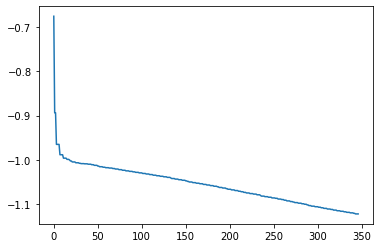

In [19]:
plt.plot(States_track['x-x-x-x-x-x-x-x-x'][(0,1)], label="States")
plt.show()

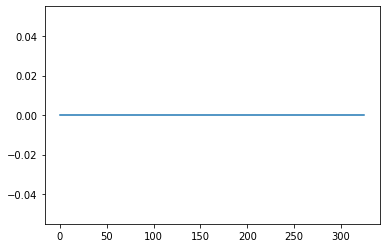

In [20]:
plt.plot(States_track['1-5-6-7-3-2-8-x-4'][(7,9)], label="States")
plt.show()

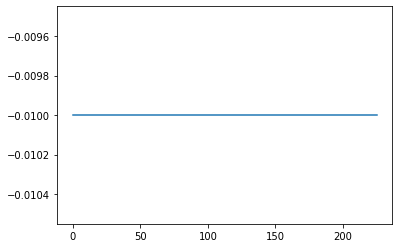

In [21]:
plt.plot(States_track['1-8-4-3-x-x-2-9-x'][(4,5)])
plt.show()

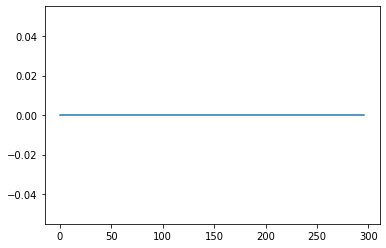

In [22]:
plt.plot(States_track['1-3-5-6-x-4-2-7-8'][(4,9)])
plt.show()

### Epsilon - decay check

In [23]:
# max_epsilon = 1.0
# min_epsilon = 0.001
# time = np.arange(0,5000000)
# epsilon = []
# for i in range(0,5000000):
#     epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))